In this project I have trained some model for uci-secom-processed dataset.<br>
first train model with dropping Na(missing values), and then train models with handelling with missing values

## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler, SMOTEN
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.impute import SimpleImputer


pd.set_option('display.max_columns', None)

%config Completer.use_jedi=False  # for AutoCompleter

## Read dataset  

read dataset mit pandas read_csv function

In [2]:
data = pd.read_csv('uci-secom-processed.csv')

### Exploratory Data Analysis (EDA)

In [3]:
# Identifying number of features and number of samples

data.shape

(1567, 448)

In [4]:
# an overview of data

data.head()

Time        0        1          2          3       4  \
0  2008-07-19 11:55:00  3030.93  2564.00  2187.7333  1411.1265  1.3602   
1  2008-07-19 12:32:00  3095.78  2465.14  2230.4222  1463.6606  0.8294   
2  2008-07-19 13:17:00  2932.61  2559.94  2186.4111  1698.0172  1.5102   
3  2008-07-19 14:43:00  2988.72  2479.90  2199.0333   909.7926  1.3204   
4  2008-07-19 15:22:00  3032.24  2502.87  2233.3667  1326.5200  1.5334   

          6       7       8       9      10      11        12       14  \
0   97.6133  0.1242  1.5005  0.0162 -0.0034  0.9455  202.4396   7.9558   
1  102.3433  0.1247  1.4966 -0.0005 -0.0148  0.9627  200.5470  10.1548   
2   95.4878  0.1241  1.4436  0.0041  0.0013  0.9615  202.0179   9.5157   
3  104.2367  0.1217  1.4882 -0.0124 -0.0033  0.9629  201.8482   9.6052   
4  100.3967  0.1235  1.5031 -0.0031 -0.0072  0.9569  201.9424  10.5661   

         15       16      17        18       19      20       21       22  \
0  414.8710  10.0433  0.9680  192.3963  12.5190  1.4026 -5419.00  2916.50   
1  414.7347   9.2599  0.9701  191.2872  12.4608  1.3825 -5441.50  2604.25   
2  416.7075   9.3144  0.9674  192.7035  12.5404  1.4123 -5447.75  2701.75   
3  422.2894   9.6924  0.9687  192.1557  12.4782  1.4011 -5468.25  2648.25   
4  420.5925  10.3387  0.9735  191.6037  12.4735  1.3888 -5476.25  2635.25   

        23       24      25      26      27       28      29      30      31  \
0 -4043.75   751.00  0.8955  1.7730  3.0490  64.2333  2.0222  0.1632  3.5191   
1 -3498.75 -1640.25  1.2973  2.0143  7.3900  68.4222  2.2667  0.2102  3.4171   
2 -4047.00 -1916.50  1.3122  2.0295  7.5788  67.1333  2.3333  0.1734  3.5986   
3 -4515.00 -1657.25  1.3137  2.0038  7.3145  62.9333  2.6444  0.2071  3.3813   
4 -3987.50   117.00  1.2887  1.9912  7.2748  62.8333  3.1556  0.2696  3.2728   

        32      33       34       35       36       37       38        39  \
0  83.3971  9.5126  50.6170  64.2588  49.3830  66.3141  86.9555  117.5132   
1  84.9052  9.7997  50.6596  64.2828  49.3404  64.9193  87.5241  118.1188   
2  84.7569  8.6590  50.1530  64.1114  49.8470  65.8389  84.7327  118.6128   
3  84.9105  8.6789  50.5100  64.1125  49.4900  65.1951  86.6867  117.0442   
4  86.3269  8.7677  50.2480  64.1511  49.7520  66.1542  86.1468  121.4364   

      40     41        43       44        45        46      47        48  \
0  61.29  4.515  352.7173  10.1841  130.3691  723.3092  1.3072  141.2282   
1  78.25  2.773  352.2445  10.0373  133.1727  724.8264  1.2887  145.8445   
2  14.37  5.434  364.3782   9.8783  131.8027  734.7924  1.2992  141.0845   
3  76.90  1.279  363.0273   9.9305  131.8027  733.8778  1.3027  142.5427   
4  76.39  2.209  353.3400  10.4091  176.3136  789.7523  1.0341  138.0882   

         50        51     53     54      55      56      57      58       59  \
0  624.3145  218.3174  4.592  4.841  2834.0  0.9317  0.9484  4.7057  -1.7264   
1  631.2618  205.1695  4.590  4.842  2853.0  0.9324  0.9479  4.6820   0.8073   
2  637.2655  185.7574  4.486  4.748  2936.0  0.9139  0.9447  4.5873  23.8245   
3  637.3727  189.9079  4.486  4.748  2936.0  0.9139  0.9447  4.5873  24.3791   
4  667.7418  233.5491  4.624  4.894  2865.0  0.9298  0.9449  4.6414 -12.2945   

         60       61        62       63       64       65        66      67  \
0  350.9264  10.6231  108.6427  16.1445  21.7264  29.5367  693.7724  0.9226   
1  352.0073  10.3092  113.9800  10.9036  19.1927  27.6301  697.1964  1.1598   
2  364.5364  10.1685  115.6273  11.3019  16.1755  24.2829  710.5095  0.8694   
3  361.4582  10.2112  116.1818  13.5597  15.6209  23.4736  710.4043  0.9761   
4  355.0809   9.7948  144.0191  21.9782  32.2945  44.1498  745.6025  0.9256   

         68        70       71   74      75      76      77      78      79  \
0  148.6009  608.1700  84.0793  0.0  0.0126 -0.0206  0.0141 -0.0307 -0.0083   
1  154.3709  620.3582  82.3494  0.0 -0.0039 -0.0198  0.0004 -0.0440 -0.0358   
2  145.8000  625.9636  84.7681  0.0 -0.0078 -0.0326 -0.0052  0.0213 -0.

In [5]:
# Identifying the data type of each feature

data.dtypes

Time          object
0            float64
1            float64
2            float64
3            float64
              ...   
586          float64
587          float64
588          float64
589          float64
Pass_Fail      int64
Length: 448, dtype: object

In [6]:
# drop first column "Time", because it is type Time and I dont need it   

data = data.drop(['Time'], axis=1)

In [7]:
# Identifying the data type of each feature after dropping Time column
data.dtypes

0            float64
1            float64
2            float64
3            float64
4            float64
              ...   
586          float64
587          float64
588          float64
589          float64
Pass_Fail      int64
Length: 447, dtype: object

<AxesSubplot:xlabel='Pass_Fail', ylabel='count'>

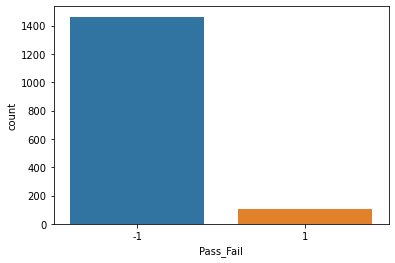

In [8]:
# Identifying ditribution of traget variable and its values

# data.Pass_Fail.value_counts()
sns.countplot(x=data.Pass_Fail)

## Dropping missing values
first I want to know the percentage of missing value in each feature

In [9]:
percent_missing = data.isna().sum() * 100 / len(data)
missing_value_df = pd.DataFrame({'column_name': data.columns, 
                                 #'number_missing':data.isnull().sum(),
                                 'percent_missing': percent_missing})

In [10]:
missing_value_df.sort_values('percent_missing', inplace=True)


In [11]:
missing_value_df.sort_values('percent_missing', inplace=False, ascending=False).head(20)

column_name  percent_missing
247         247        45.628590
519         519        45.628590
385         385        45.628590
112         112        45.628590
567         567        17.421825
562         562        17.421825
563         563        17.421825
569         569        17.421825
568         568        17.421825
566         566        17.421825
565         565        17.421825
564         564        17.421825
551         551        16.592214
550         550        16.592214
553         553        16.592214
546         546        16.592214
548         548        16.592214
549         549        16.592214
557         557        16.592214
552         552        16.592214

In [12]:
# dropping missing values
data = data.dropna()

In [13]:
data.shape

(461, 447)

In [14]:
data.head()

0        1          2          3       4         6       7       8  \
2  2932.61  2559.94  2186.4111  1698.0172  1.5102   95.4878  0.1241  1.4436   
3  2988.72  2479.90  2199.0333   909.7926  1.3204  104.2367  0.1217  1.4882   
5  2946.25  2432.84  2233.3667  1326.5200  1.5334  100.3967  0.1235  1.5287   
7  3058.88  2690.15  2248.9000  1004.4692  0.7884  106.2400  0.1185  1.5153   
8  2967.68  2600.47  2248.9000  1004.4692  0.7884  106.2400  0.1185  1.5358   

        9      10      11        12       14        15      16      17  \
2  0.0041  0.0013  0.9615  202.0179   9.5157  416.7075  9.3144  0.9674   
3 -0.0124 -0.0033  0.9629  201.8482   9.6052  422.2894  9.6924  0.9687   
5  0.0167  0.0055  0.9699  200.4720   8.6617  414.2426  9.2441  0.9747   
7  0.0157  0.0007  0.9481  202.4170  13.6872  408.4017  9.6836  0.9687   
8  0.0111 -0.0066  0.9494  202.4544  12.6837  417.6009  9.7046  0.9693   

         18       19      20       21       22       23       24      25  \
2  192.7035  12.5404  1.4123 -5447.75  2701.75 -4047.00 -1916.50  1.3122   
3  192.1557  12.4782  1.4011 -5468.25  2648.25 -4515.00 -1657.25  1.3137   
5  191.2280  12.4935  1.3836 -6058.00  2953.75 -3906.50   193.75  0.8930   
7  192.7334  12.5263  1.4092 -5395.50  2551.75 -3819.75  -737.00  1.3280   
8  192.7498  12.5263  1.4278 -4196.50  2059.50 -2948.00   622.75  0.6830   

       26      27       28      29      30      31       32      33       34  \
2  2.0295  7.5788  67.1333  2.3333  0.1734  3.5986  84.7569  8.6590  50.1530   
3  2.0038  7.3145  62.9333  2.6444  0.2071  3.3813  84.9105  8.6789  50.5100   
5  1.7775  3.0505  62.3778  1.6333  0.1394  3.5200  85.4233  9.6484  50.5795   
7  1.9893  7.3885  67.3000  2.7889  0.2239  3.4588  83.8887  8.7289  50.4685   
8  1.3230  2.2675  62.8000  2.1444  0.1844  3.5067  85.4274  9.6234  50.4893   

        35       36       37       38        39     40     41        43  \
2  64.1114  49.8470  65.8389  84.7327  118.6128  14.37  5.434  364.3782   
3  64.1125  49.4900  65.1951  86.6867  117.0442  76.90  1.279  363.0273   
5  64.0720  49.4205  66.2949  87.0273  117.4928  59.94  3.024  360.2873   
7  64.4021  49.5316  65.0665  86.7493  116.5628  78.09  2.671  358.6700   
8  63.9315  49.5107  66.3322  86.9476  117.4190  61.10  3.217  358.9564   

       44        45        46      47        48        50        51     53  \
2  9.8783  131.8027  734.7924  1.2992  141.0845  637.2655  185.7574  4.486   
3  9.9305  131.8027  733.8778  1.3027  142.5427  637.3727  189.9079  4.486   
5  9.7804  142.2591  746.8692  1.1880  137.6473  640.1936  192.7702  4.636   
7  9.9271  142.2945  745.6875  0.9025  136.6791  637.6436  133.6606  4.636   
8  9.7842  142.7009  745.4127  1.1722  138.3109  639.9682  216.9538  4.636   

      54      55      56      57      58       59        60       61  \
2  4.748  2936.0  0.9139  0.9447  4.5873  23.8245  364.5364  10.1685   
3  4.748  2936.0  0.9139  0.9447  4.5873  24.3791  361.4582  10.2112   
5  4.915  2865.0  0.9316  0.9433  4.6275  28.2955  360.2409   9.8344   
7  4.915  2865.0  0.9316  0.9433  4.6275  29.1309  360.1382   9.8389   
8  4.915  2865.0  0.9316  0.9433  4.6275  26.9791  358.3473   9.8398   

         62       63       64       65        66      67        68        70  \
2  115.6273  11.3019  16.1755  24.2829  710.5095  0.8694  145.8000  625.9636   
3  116.1818  13.5597  15.6209  23.4736  710.4043  0.9761  147.6545  625.2945   
5  130.5545   7.6180  11.7045  18.3685  728.5007  0.9227  144.6982  635.4936   
7  131.4255   5.5936  10.8691  15.3094  730.3781  0.9965  144.3255  635.8891   
8  129.6800   8.8612  13.0209  19.9475  725.4652  0.9079  144.5455  632.5727   

        71   74      75      76      77      78      79      80      81  \
2  84.7681  0.0 -0.0078 -0.0326 -0.0052  0.0213 -0.0054 -0.1134 -0.0182   
3  70.2289  0.0 -0.0555 -0.0461 -0.0400  0.0400  0.0676 -0.1051  0.0028   
5  70.3707  0.0  0.0198 -0.0550 -0.0010 -0.0074 -0.0026 -0.0853 -0.0111   
7  57.0841  0.0 -

In [16]:
# showing statistcs of features
data.describe()

0            1            2            3           4  \
count   461.000000   461.000000   461.000000   461.000000  461.000000   
mean   3009.782516  2492.564382  2198.348831  1384.855845    1.323305   
std      69.634845    77.069367    31.018106   388.162281    0.450070   
min    2792.240000  2162.870000  2060.660000   847.797600    0.681500   
25%    2960.580000  2453.450000  2180.377800  1072.805800    1.003200   
50%    3005.640000  2500.260000  2197.644400  1281.786200    1.310100   
75%    3055.870000  2533.040000  2218.633300  1602.842700    1.509900   
max    3299.400000  2728.280000  2280.822200  3085.378100    3.889400   

                6           7           8           9          10          11  \
count  461.000000  461.000000  461.000000  461.000000  461.000000  461.000000   
mean   100.919223    0.122438    1.471008   -0.000851    0.000096    0.964118   
std      5.233356    0.001909    0.069273    0.014819    0.008769    0.009665   
min     82.246700    0.117100    1.292100   -0.037600   -0.032400    0.934100   
25%     98.756700    0.121100    1.423400   -0.010800   -0.005100    0.956600   
50%    101.457800    0.122300    1.469800   -0.000900    0.000600    0.965500   
75%    104.236700    0.123800    1.524200    0.007300    0.005500    0.971500   
max    119.354400    0.127600    1.648600    0.074900    0.026300    0.984800   

               12          14          15          16          17          18  \
count  461.000000  461.000000  461.000000  461.000000  461.000000  461.000000   
mean   199.988736    8.657964  413.752243    9.846183    0.971844  190.142550   
std      2.607603    2.851825   28.497881    0.495702    0.006672    2.641749   
min    191.149500    2.249300  391.131000    8.071100    0.947900  181.217600   
25%    198.228900    6.616900  404.642400    9.515100    0.968100  188.386300   
50%    199.565300    8.485500  411.819900    9.818800    0.972800  189.634800   
75%    202.111700   10.598100  419.311600   10.154000    0.977100  192.323800   
max    210.618000   19.546500  824.927100   12.199800    0.983200  200.313400   

               19          20           21           22           23  \
count  461.000000  461.000000   461.000000   461.000000   461.000000   
mean    12.499726    1.406356 -5600.694143  2705.000542 -3807.868040   
std      0.112442    0.013674   632.465854   293.269298  1434.122631   
min     10.715100    1.357700 -7150.250000   609.500000 -9986.750000   
25%     12.470600    1.397600 -5789.750000  2587.500000 -4437.000000   
50%     12.504300    1.407100 -5519.000000  2676.750000 -3833.750000   
75%     12.547300    1.415300 -5358.500000  2860.500000 -3346.750000   
max     12.705100    1.450300 -1368.750000  3562.500000  1932.500000   

                 24          25          26          27          28  \
count    461.000000  461.000000  461.000000  461.000000  461.000000   
mean    -161.913231    1.198830    1.941038    6.621600   69.027284   
std     2830.665674    0.181297    0.182268    1.296088    3.420183   
min   -11532.250000    0.219000    0.438500    0.739800   60.922200   
25%    -1496.000000    1.221500    1.939800    6.997200   66.933300   
50%       40.000000    1.280000    1.987500    7.266200   68.588900   
75%     1432.750000    1.301500    2.001500    7.322200   71.366700   
max    10969.333300    1.355200    2.047500    7.658800   77.122200   

               29          30          31          32          33          34  \
count  461.000000  461.000000  461.000000  461.000000  461.000000  461.000000   
mean     2.396144    0.187081    3.665662   85.284424    8.915572   50.553161   
std      0.405443    0.033034    0.509467    1.640304    1.008149    1.154187   
min      0.766700    0.043400    3.181300   83.182900    8.078700   49.834800   
25%      2.122200    0.165400    3.372800   84.525000    8.585500   50.248800   
50%      2.433300    0.188600    3.435400   85.181700    8.764600   50.380800   
75%      2.677800    0.210600    3.521700  

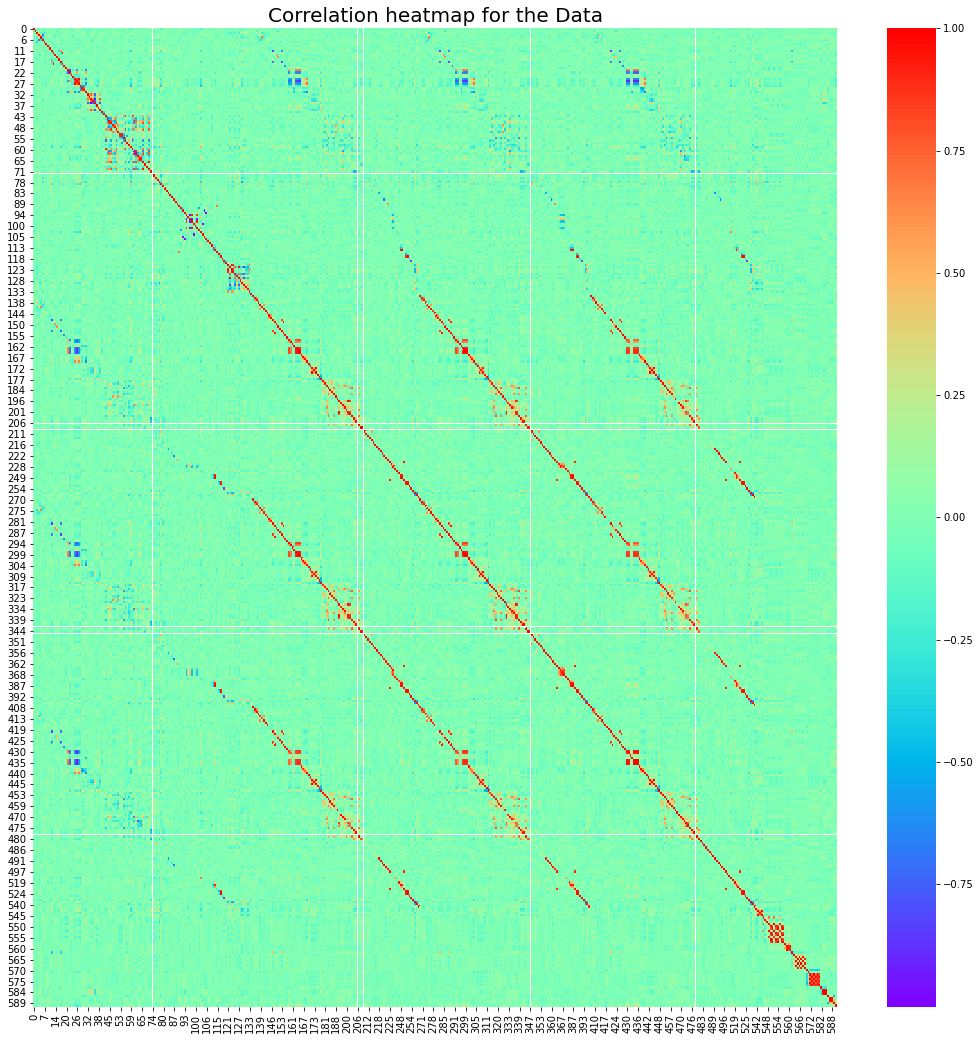

In [18]:
# showing Correlation of features

plt.rcParams['figure.figsize'] = (18, 18)
sns.heatmap(data.corr(), cmap = "rainbow")
plt.title('Correlation heatmap for the Data', fontsize = 20);

There are very features with high correlation, but for this stage it is Ok,

### Data Spliting

Splitting data as train and test data using **sklearn.model_selection.train_test_split()**

In [20]:
# Seperating features and target values

X = data.iloc[:,:-1]
y = data.Pass_Fail

In [21]:
X.shape, y.shape

((461, 446), (461,))

In [22]:
# and now splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

### Feature Scaling

because of features values are in different scale, I **standardized** data using **sklearn.preprocessing.StandardScaler()** <br>
then they have mean = 0 and Std = 1

In [23]:
sc = StandardScaler()
sc.fit(X_train)

X_train = pd.DataFrame(sc.transform(X_train), columns=data.columns[:-1])
X_test = pd.DataFrame(sc.transform(X_test), columns=data.columns[:-1])

In [24]:
X_train.describe()

0             1             2             3             4  \
count  3.220000e+02  3.220000e+02  3.220000e+02  3.220000e+02  3.220000e+02   
mean   1.257793e-15  1.299168e-15 -3.817512e-15  3.420314e-16  8.274954e-18   
std    1.001556e+00  1.001556e+00  1.001556e+00  1.001556e+00  1.001556e+00   
min   -3.058449e+00 -4.026465e+00 -4.390103e+00 -1.338969e+00 -1.471074e+00   
25%   -6.913757e-01 -5.276884e-01 -5.774739e-01 -7.848939e-01 -7.286057e-01   
50%   -5.624498e-02  8.188887e-02  1.823625e-02 -2.796192e-01 -7.061654e-03   
75%    6.612935e-01  5.268708e-01  6.837964e-01  5.425968e-01  3.793484e-01   
max    4.119554e+00  3.070797e+00  2.716335e+00  4.337895e+00  5.905093e+00   

                  6             7             8             9            10  \
count  3.220000e+02  3.220000e+02  3.220000e+02  3.220000e+02  3.220000e+02   
mean   1.103327e-17  5.671102e-15 -1.519833e-15  1.379159e-18  1.930823e-17   
std    1.001556e+00  1.001556e+00  1.001556e+00  1.001556e+00  1.001556e+00   
min   -3.518318e+00 -2.901703e+00 -2.518783e+00 -2.536498e+00 -3.265371e+00   
25%   -3.639682e-01 -6.779681e-01 -6.329110e-01 -7.135456e-01 -5.961768e-01   
50%    1.286263e-01 -1.355936e-01  4.458214e-02 -4.909742e-03  4.869166e-02   
75%    6.022909e-01  7.186461e-01  7.046939e-01  5.870710e-01  6.150544e-01   
max    3.506141e+00  2.793228e+00  2.660847e+00  5.298542e+00  2.925366e+00   

                 11            12            14            15            16  \
count  3.220000e+02  3.220000e+02  3.220000e+02  3.220000e+02  3.220000e+02   
mean   8.616986e-15  8.608711e-15  1.930823e-16  1.114361e-15  1.905998e-15   
std    1.001556e+00  1.001556e+00  1.001556e+00  1.001556e+00  1.001556e+00   
min   -3.137277e+00 -3.326988e+00 -2.236064e+00 -2.262374e+00 -3.638236e+00   
25%   -7.575714e-01 -6.746032e-01 -7.246714e-01 -7.945872e-01 -6.825022e-01   
50%    1.641087e-01 -1.371118e-01 -8.782624e-02 -2.295212e-02 -6.380363e-02   
75%    7.655440e-01  7.960994e-01  6.542996e-01  7.705076e-01  6.118550e-01   
max    2.142857e+00  3.998337e+00  3.676469e+00  3.878297e+00  4.738287e+00   

                 17            18            19            20            21  \
count  3.220000e+02  3.220000e+02  3.220000e+02  3.220000e+02  3.220000e+02   
mean  -8.495620e-16 -4.341593e-15  2.963813e-15 -1.685332e-14  6.730296e-16   
std    1.001556e+00  1.001556e+00  1.001556e+00  1.001556e+00  1.001556e+00   
min   -3.497788e+00 -3.018241e+00 -7.251467e+00 -3.426332e+00 -2.295021e+00   
25%   -5.543872e-01 -6.665533e-01 -4.331879e-01 -6.146816e-01 -2.849174e-01   
50%    1.439849e-01 -1.191534e-01  9.761409e-03  7.229607e-02  9.395943e-02   
75%    8.167622e-01  8.121511e-01  5.881472e-01  6.494989e-01  3.238449e-01   
max    1.665047e+00  3.780600e+00  2.653063e+00  2.876865e+00  6.160376e+00   

                 22            23            24            25            26  \
count  3.220000e+02  3.220000e+02  3.220000e+02  3.220000e+02  3.220000e+02   
mean  -4.964973e-16  4.413309e-17  1.103327e-17 -3.089316e-16 -6.619963e-16   
std    1.001556e+00  1.001556e+00  1.001556e+00  1.001556e+00  1.001556e+00   
min   -6.459731e+00 -4.491762e+00 -4.152005e+00 -5.026107e+00 -7.259221e+00   
25%   -3.584274e-01 -4.720490e-01 -4.826354e-01 -9.845030e-01 -1.144444e-01   
50%   -9.206396e-02 -2.614027e-02  9.949505e-02  4.508294e-01  2.651746e-01   
75%    4.969423e-01  3.278824e-01  6.099119e-01  5.598109e-01  3.280600e-01   
max    2.646738e+00  4.130381e+00  3.896037e+00  8.318135e-01  5.541076e-01   

                 27            28            29            30            31  \
count  3.220000e+02  3.220000e+02  3.220000e+02  3.220000e+02  3.220000e+02   
mean  -2.206654e-16 -4.964973e-17 -1.208143e-15  4.854640e-16 -1.668782e-16   
std    1.001556e+00  1.001556e+00  1.001556e+00  1.001556e+00  1.001556e+00   
min   -4.287675e+00 -2.373941e+00 -4.052390e+00 -4.395324e+00 -9.617788e-01   
25%   -9.935236e-01 -5.919426e-01 -6.619612e-01 -6.721048e-01 -

In [25]:
y_train.value_counts()

-1    295
 1     27
Name: Pass_Fail, dtype: int64

### Data Balancing
The target values in train dataset are not balanced, also I try to balance it using **imblearn.over_sampling.SMOTEN**. That means I used oversampling technique, and I have increased the number of positive (Fail) sample in my train dataset

In [26]:
smtn = SMOTEN(random_state=42)

In [27]:
X_train_oversampled, y_train_oversampled = smtn.fit_resample(X_train, y_train)

<AxesSubplot:xlabel='Pass_Fail', ylabel='count'>

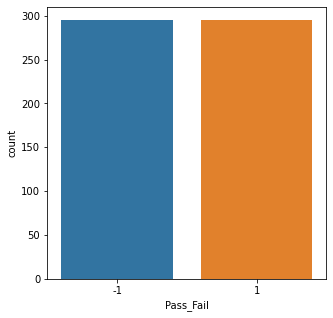

In [28]:
plt.rcParams['figure.figsize'] = (5, 5)

sns.countplot(x=y_train_oversampled)

In [29]:
# Now my train set is balanced
y_train_oversampled.value_counts()

-1    295
 1    295
Name: Pass_Fail, dtype: int64

### Dimension Reduction

Beacuas the number of features are very high for simlifing the model I tried to reducing the number of features using 2 methods:
1. Feature selection
2. PCA

after each method I have a new Dataset (test and train), and I will using both of them in Modelling phase

### Feature Selection
in this method i have used **RandomForestClassifier** to showing the **features_importance**

In [33]:
rand_f = RandomForestClassifier(n_estimators=50, max_depth=3, random_state=42)

In [34]:
rand_f.fit(X_train_oversampled, y_train_oversampled)

RandomForestClassifier(max_depth=3, n_estimators=50, random_state=42)

In [35]:
def display_feat_importance(rf, X):
    """
    This function will sort the features by RandomForesVlassifier feature_importances_
    
    Input:
    rf  -- RandomforestClassifier
    X   -- Dataset that will be sorted
    
    Output:
    Dataframe of features name and their importance
    
    """
    df = pd.concat([pd.Series(X.columns), pd.Series(rf.feature_importances_*100)], axis = 1)
    df.columns = ['Attributname', 'Importance']
    return df.sort_values('Importance', ascending = False)

In [36]:
display_feat_importance(rand_f, X_train_oversampled).head(40)

Attributname  Importance
195          222    6.525360
382          494    6.436023
310          408    5.015605
152          169    4.298126
50            55    4.103128
60            65    3.803202
59            64    3.689085
422          562    3.453450
245          304    3.064339
340          440    3.025702
107          120    2.993259
64            70    2.963062
263          332    2.849587
61            66    2.812101
394          523    2.437245
243          302    2.106739
215          270    2.066853
268          337    1.794293
14            16    1.621781
134          148    1.585742
56            61    1.508891
38            40    1.473410
318          417    1.459798
45            48    1.443191
426          566    1.430053
190          216    1.418635
25            27    1.414529
214          269    1.350773
266          335    1.321555
164          183    1.299686
26            28    0.958474
338          438    0.925842
213          268    0.690300
283          354    0.591376
330          430    0.539441
397          526    0.536353
175          201    0.508013
128          142    0.489553
352          455    0.455424
102          115    0.454697

In [37]:
# I selected top 40 important features to using them in model

features_rf = display_feat_importance(rand_f, X_train_oversampled).head(40)

In [38]:
columns_name = features_rf.Attributname

X_train_rfc = X_train_oversampled.loc[:, columns_name]
X_test_rfc = X_test.loc[:, columns_name]

In [41]:
# showing shape of train and test datasets
X_train_rfc.shape, X_test_rfc.shape

((590, 40), (139, 40))

## PCA

for this method (Principle Component Analysis) I have used **sklearn.decomposition.PCA** module. <br>
tofinding best value for number of components I defined a function to showing the percentage explained Variance for different number of components.

In [42]:
def check_PCA(n_comp, x):
    """
    This function check PCA performance for given dataset (x) and list of number of components (n_comp)
    
    Inputs:
    n_comp -- List of different number of components
    x      -- Dataset to decomposition
    
    Output:
    Plot of performance of PCA for different number of components
    """
    for n_com in n_comp:
        pca = PCA(n_components=n_com)
        pca.fit(x)
        
        per_var = np.round(pca.explained_variance_ratio_ * 100, 1)  
        labels = ['PC' + str(m) for m in range(1, len(per_var)+1)]
        X_pca = pca.transform(x)

        plt.rcParams['figure.figsize'] = (20, 15)
        plt.bar(x=range(len(per_var)), height=per_var, tick_label=labels) 
        plt.title(f'Gesamte erklärte Varianz {(np.round(sum(per_var), 2))},  num_comp:{n_com}', fontsize=20) 
        plt.ylabel('Erklärte Varianz in Prozent',fontsize=15)

        plt.tight_layout()
        plt.show()

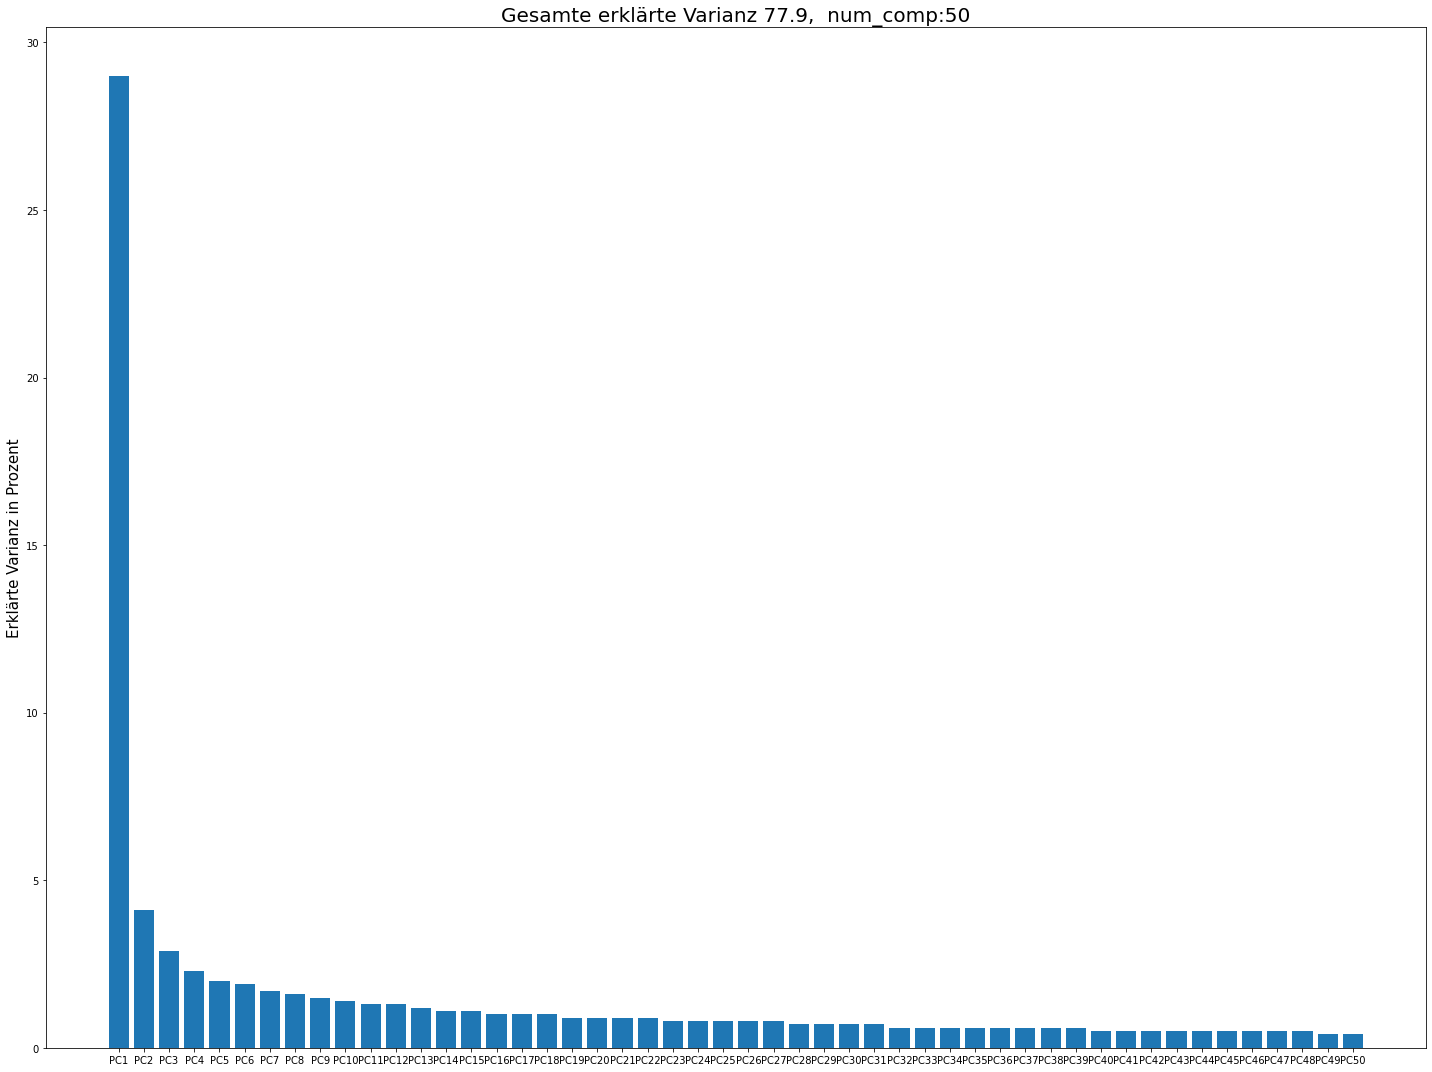

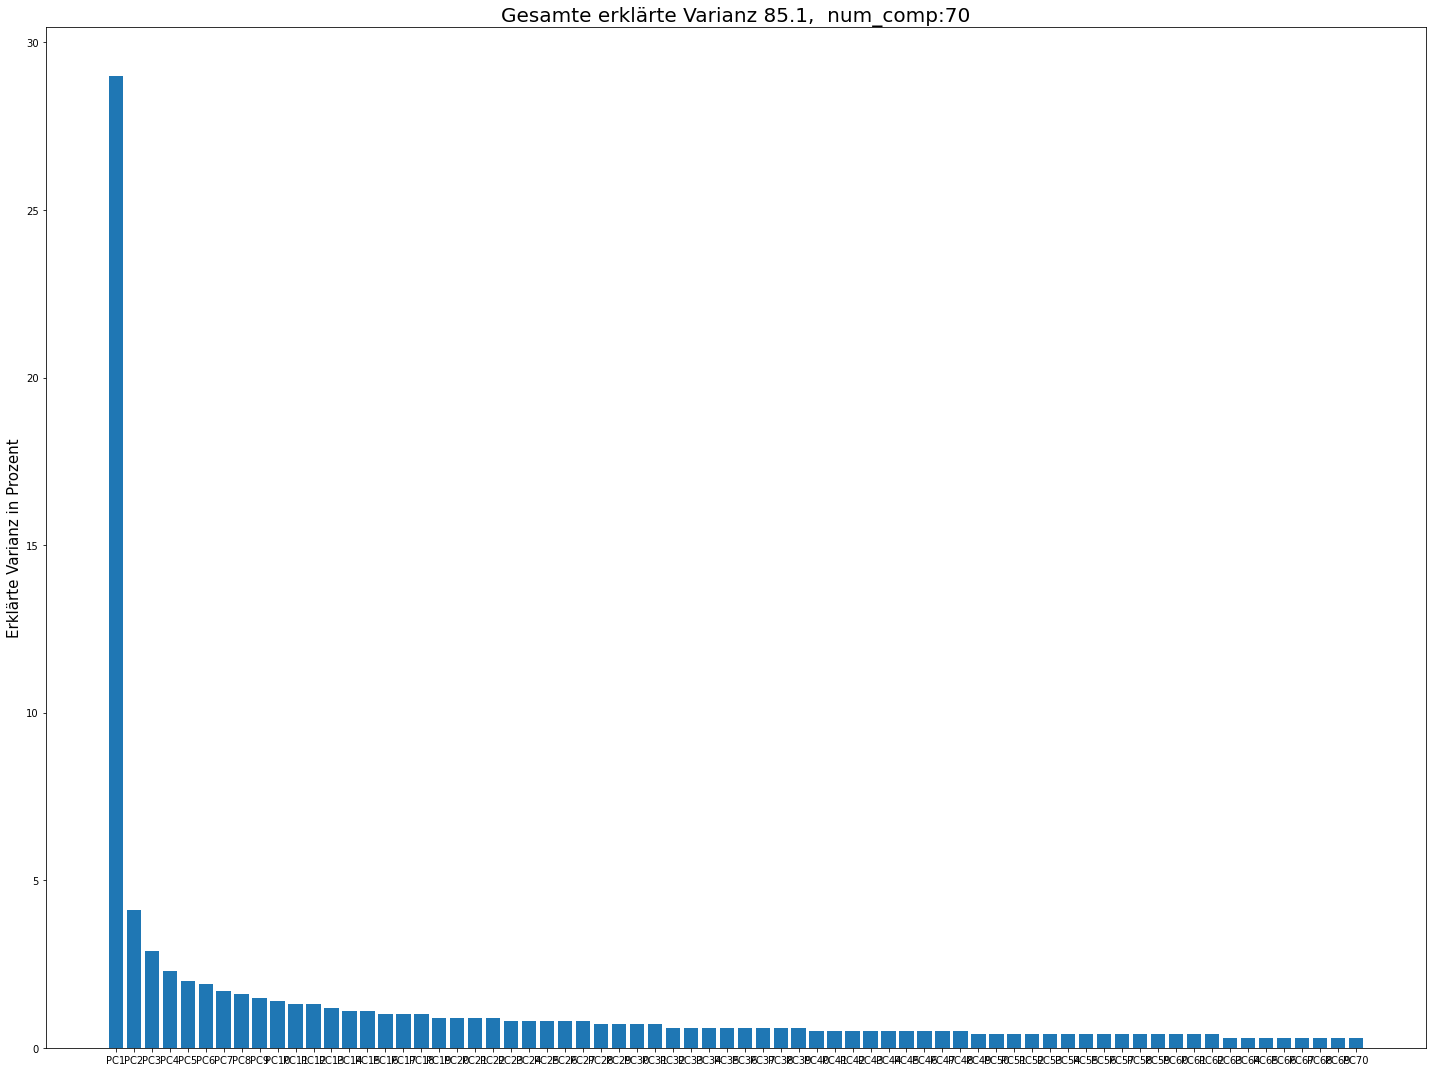

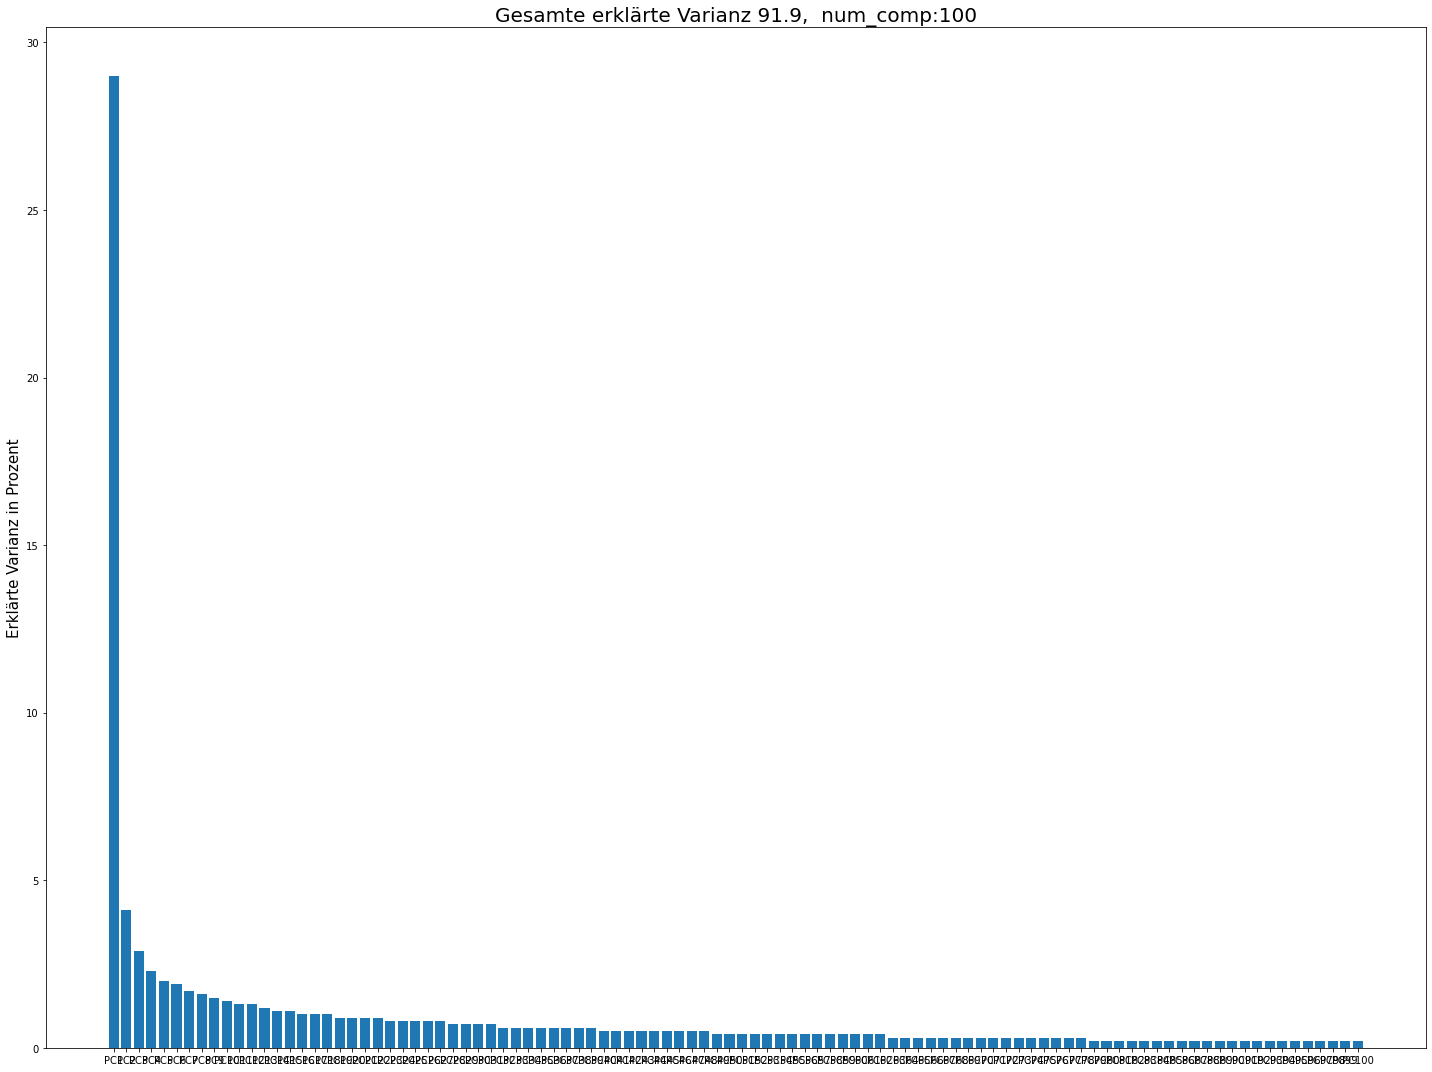

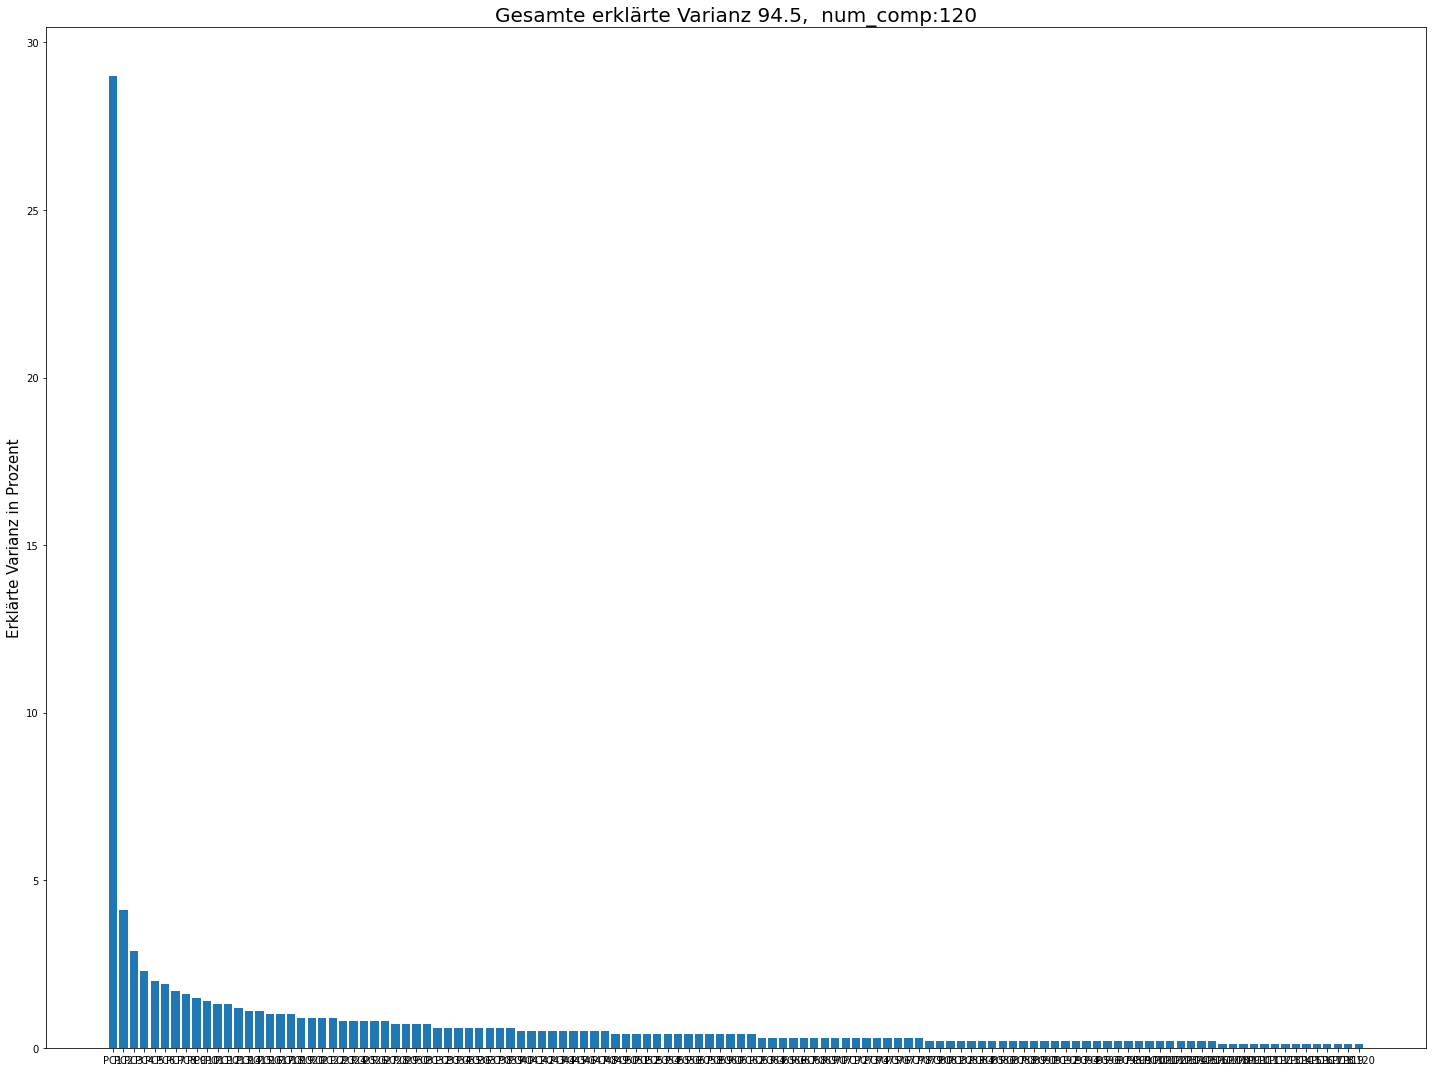

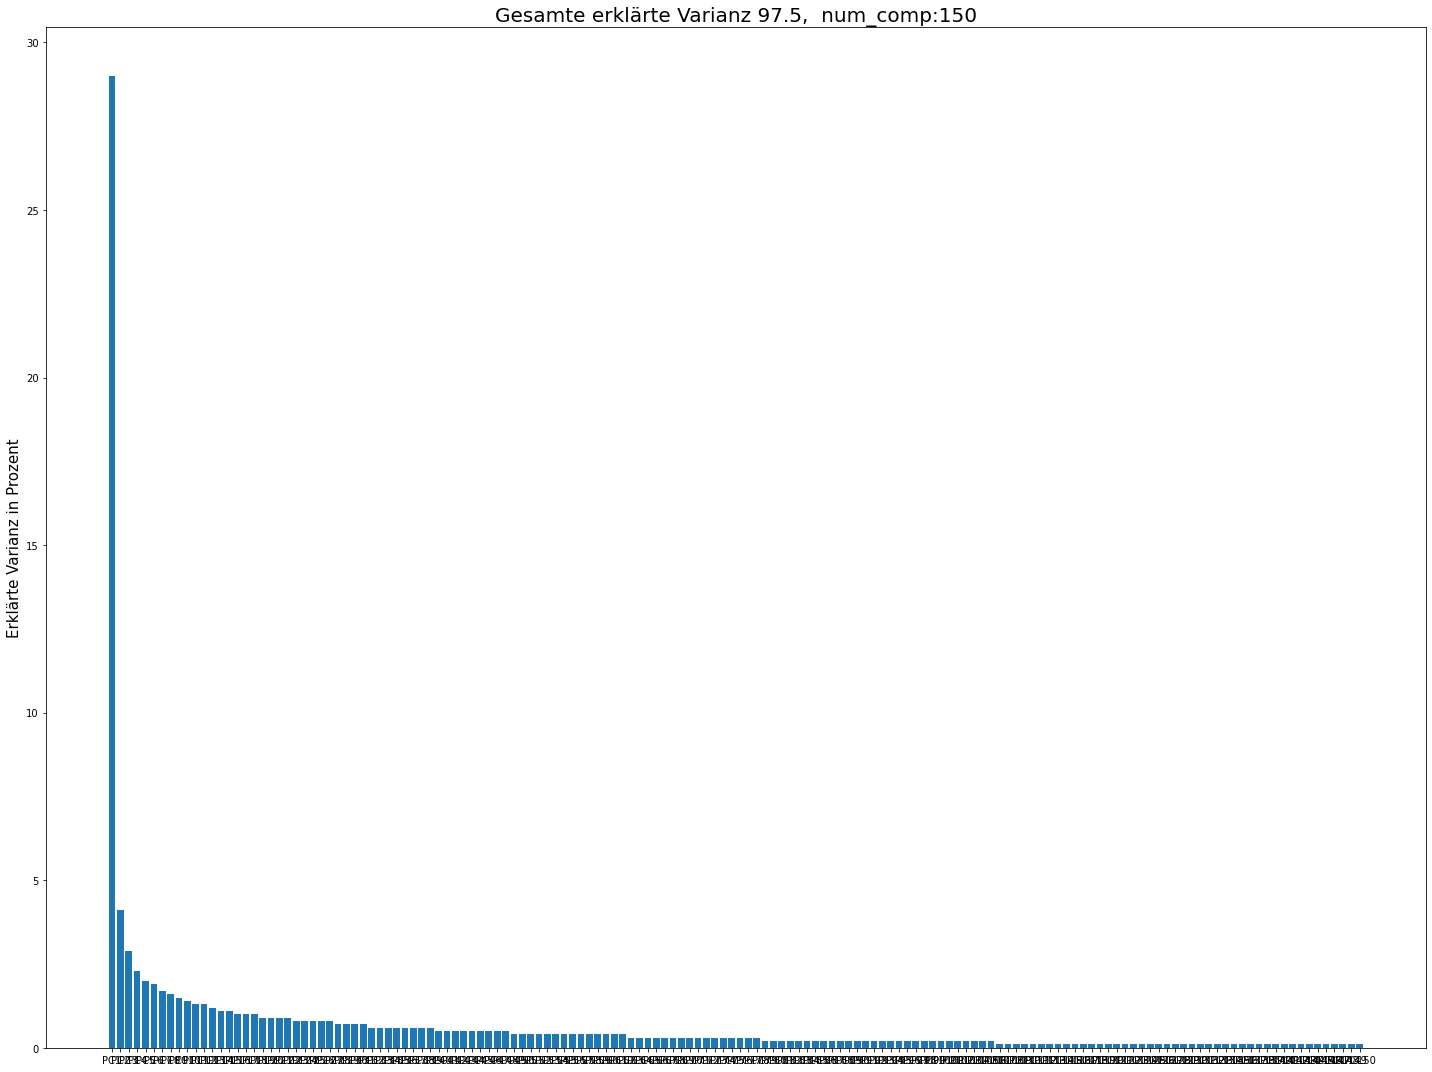

In [43]:
n_comp = [50, 70, 100, 120, 150]

check_PCA(n_comp, X_train_oversampled)

I have choosed the smallest value of n_component with explained variance is more than 90%, that means n_components = 100.

In [44]:
# Craeting an objekt with n_component=100 from PCA
pca = PCA(n_components=100)

In [45]:
# fit the PCA model to oversampled train data
pca.fit(X_train_oversampled)

# Creating new data in with PCA features
X_train_pca = pca.transform(X_train_oversampled)
X_test_pca = pca.transform(X_test)

# Converting them to pandas DataFrame, because the aoutput of transform method is nu.ndarray
X_train_pca = pd.DataFrame(X_train_pca)
X_test_pca = pd.DataFrame(X_test_pca)

In [46]:
# checking new train dataset 
X_train_pca

0         1         2         3         4         5         6   \
0   -10.964559  0.593893  1.301679  3.428976  6.584274 -5.992337 -1.187464   
1   -10.700199 -0.966520 -3.532527 -0.063267 -2.837794  0.372705 -0.100976   
2   -14.456729 -0.021895 -0.807495  1.189584  0.703370 -0.550393 -2.660609   
3    -9.677399  0.599537  1.516272  1.806926  1.493230  4.730532  2.501434   
4    -7.429600  0.436719  1.462064  4.971647 -2.843892  0.496085 -2.408233   
..         ...       ...       ...       ...       ...       ...       ...   
585  12.444083  6.152592 -4.095996  0.218433 -2.069662  0.211044 -0.927108   
586  10.282714 -4.751720  1.934214  2.613070  0.835293  0.090805 -0.802734   
587  13.175374  1.320710  1.078770 -0.216235 -0.486783 -0.737476 -4.378850   
588  13.175374  1.320710  1.078770 -0.216235 -0.486783 -0.737476 -4.378850   
589  13.754360  5.263984 -3.957308 -3.166030  2.967429 -2.007081  2.840698   

            7         8         9         10        11        12        13  \
0     0.137441 -2.823379 -2.851327  1.197409  1.569925  3.947524  1.019620   
1     1.317992  6.974846 -5.765570 -2.369095 -4.642392 -2.027322 -1.983812   
2     1.800496  0.587486 -3.683773 -1.428886 -0.553770 -4.000052 -1.401854   
3   -10.375439  1.696995  1.927272  1.009087  0.156495  1.401733  1.634124   
4     2.228780 -4.741215  0.093960  1.883006  2.695703 -1.893510  2.534590   
..         ...       ...       ...       ...       ...       ...       ...   
585   1.695865 -1.290598 -0.643559  0.994566  2.111155  2.621881 -0.649714   
586   2.306668  0.343416  1.206067 -0.937111 -1.279705  0.555896  0.191510   
587  -2.414651  0.294928 -1.582424 -1.849802 -1.214126 -0.535179  1.229161   
588  -2.414651  0.294928 -1.582424 -1.849802 -1.214126 -0.535179  1.229161   
589  -4.345924 -1.665781 -2.302325  4.060046 -0.825115 -1.499994 -1.199674   

            14         15        16        17         18        19        20  \
0     0.208171  -0.507679 -1.383953 -0.027096   2.046515 -3.123284  0.235229   
1    14.242146  17.309747  1.091505  3.812282 -14.568253 -2.187426  7.691980   
2    -4.514754   6.158685 -3.424473  0.483624   6.375508  0.620686 -6.270740   
3     1.407449   3.788493  5.305202 -0.749038   1.776186  2.611820 -2.649062   
4     0.332611   1.278294  0.049621  0.793557  -3.549350 -0.204633 -0.631972   
..         ...        ...       ...       ...        ...       ...       ...   
585  -0.856581   2.503038  0.029115 -0.899896  -0.882098  1.861556  0.422748   
586  -0.912357  -0.967787  1.551419  0.371992   1.103720  0.569343  0.015939   
587   0.409927  -1.272969 -0.567287 -0.819272  -1.296414 -0.201299 -0.231655   
588   0.409927  -1.272969 -0.567287 -0.819272  -1.296414 -0.201299 -0.231655   
589  -1.215219   0.472985  1.407835  1.205276  -1.163023  0.748618 -0.677752   

            21        22        23        24        25        26        27  \
0     0.344576 -0.920166  1.187060  2.086301  2.357331 -2.035220 -3.579723   
1    12.836194  2.195444  6.242327  1.812456 -0.383209  3.299278  1.607071   
2    -2.159125 -0.186361  3.778981  3.180648  1.104249 -1.301415  2.813185   
3     1.701135 -1.507219  3.041735 -2.893834 -2.280992 -0.920526 -0.606928   
4     0.982478 -4.243328  4.576146  2.362261  0.699357 -0.151214  0.953093   
..         ...       ...       ...       ...       ...       ...       ...   
585   0.158693 -1.304387 -1.540760  0.447818 -0.006030  1.083524  0.508472   
586   1.066737 -0.163283  0.906520  0.084877 -1.255391 -1.789044 -0.195152   
587  -1.219815 -0.180822 -1.606074  0.411533  1.380546  0.048041 -0.191217   
588  -1.219815 -0.180822 -1.606074  0.411533  1.380546  0.048041 -0.191217   
589   0.835240 -1.563273  1.136435  0.904455  0.310137 -0.885188 -0.776510   

           28        29        30        31        32        33        34  \
0   -0.219012 -1.432559  0.638855 -0.538496 -1.936238  1.307643 -0.048601   
1    0.516277  2.328541 -1.303976 -1.450048  0.313492  3.666568 -1.990824   
2   -1.96

So far, I have 3 train dataset:<br>
  1. The oversampled dataset with 446 features **(X_train_oversampled, y_train_oversampled)**<br>
  2. The train dataset created using feature selection **(X_train_rfc, y_train_rfc)**<br>
  3. and the train dataset created by PCA **(X_train_pca, y_train_pca)**<br>

### Modeling
At this step I create different models and train them with both X_ and y_train_rfc and X_ and y_train_pca. <br>
And then I evaluate them using show_metrics function. This function show me metrics such as:
1. True Positive rate
2. False Positive rate
3. Balanced accuracy of model for train and test sets
4. Overal performance or Accuracy of model

In [47]:
def show_mertics(clf, X_train, y_train, X_test, y_test):
    """
    This function returns the evaluation metrics of model. First will train model with train data (X_train, y_train)
    and then will evaluate 
    
    Inputs:
    clf     -- Classifier/model (most be fit-able)
    X_train -- Feature set for training the model
    y_train -- True labels of input featurs for training the model
    X_test  -- Feature set for evaluation of the model
    y_test  -- True labels of test featurs for evaluation of the model
    
    Outputs:
    Balanced Accuracy (for train Data)
    True Positive Rate (Recall/Sensitivity) -- Coverage of actual positive samples
    False Positive Rate (1 - Specificity) -- not Coverage of actual negative samples
    Accuracy -- Overal performance of model
    Confusion Matrix for test Data
    """
    
    clf.fit(X_train, y_train)
    scores_train = cross_val_score(clf, X_train, y_train, cv=10, scoring='balanced_accuracy')
    print(f'Average Balanced Accuracy of model for "train data":-- {scores_train.mean()*100:.1f}%')
    
    y_pred = clf.predict(X_test)
    
    tn, fp, fn, tp = confusion_matrix(y_true=y_test, y_pred=y_pred).ravel()
    plot_confusion_matrix
    
    TPR = tp/(tp + fn)
    FPR = fp/(fp + tn)
    Accuracy = (tp + tn)/(tp + tn + fn + fp)
    Specificity = tn/(fp + tn)
    Bal_Acc = (TPR + Specificity)/2
    
    print(f'Balaned Accuracy of model for "test data":----------- {Bal_Acc*100:.1f}%')
    print(f'True Positive Rate of model for test data:----------- {TPR*100:.1f}%')
    print(f'False Positive Rate of model for test data:---------- {FPR*100:.1f}%')
    print(f'Accuracy (Overal performance) of model:-------------- {Accuracy*100:.1f}%')
   
      
    
    plt.rcParams['figure.figsize'] = (5, 4)
    plot_confusion_matrix(clf, X_test, y_test)
    
    

### Decision Tree
I create DT model using **sklearn.tree.DecisionTreeClassifier** and the plot it using **plot_tree**

In [52]:
dt = DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5, random_state=42)

Train model with rfc data

In [53]:
# Train the model with X_train_rfc

dt.fit(X_train_rfc, y_train_oversampled)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5,
                       random_state=42)

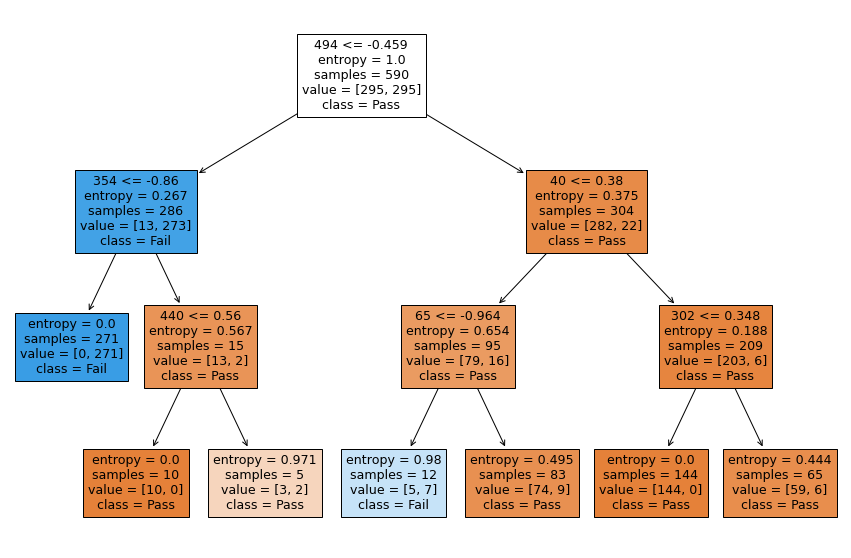

In [54]:
# Plotting model

fig, ax = plt.subplots(figsize=(15, 10))
plot_tree(dt, filled = True, class_names=["Pass", "Fail"], feature_names=X_train_rfc.columns, ax = ax);

Average Balanced Accuracy of model for "train data":-- 94.5%
Balaned Accuracy of model for "test data":----------- 50.6%
True Positive Rate of model for test data:----------- 8.3%
False Positive Rate of model for test data:---------- 7.1%
Accuracy (Overal performance) of model:-------------- 85.6%


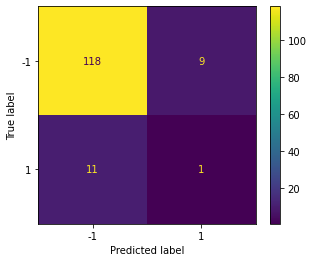

In [55]:
show_mertics(dt, X_train_rfc, y_train_oversampled, X_test_rfc, y_test)

Train the model with X_train_pca


In [56]:
dt.fit(X_train_pca, y_train_oversampled)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5,
                       random_state=42)

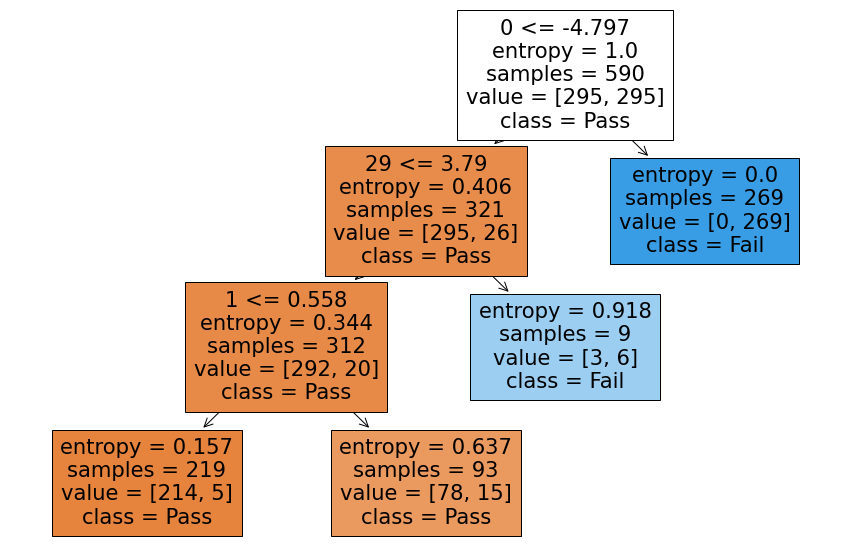

In [57]:
fig, ax = plt.subplots(figsize=(15, 10))
plot_tree(dt, filled = True, class_names=["Pass", "Fail"], feature_names=X_train_pca.columns, ax = ax);

Average Balanced Accuracy of model for "train data":-- 94.3%
Balaned Accuracy of model for "test data":----------- 50.6%
True Positive Rate of model for test data:----------- 8.3%
False Positive Rate of model for test data:---------- 7.1%
Accuracy (Overal performance) of model:-------------- 85.6%


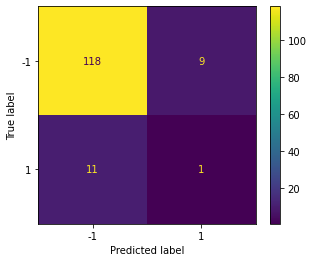

In [58]:
show_mertics(dt, X_train_pca, y_train_oversampled, X_test_pca, y_test)

with same model, the performance of model is also same, but balanced accuracy ist too low

### SVC

I create SVC model using **sklearn.svm.SVC** 

In [111]:
svc = SVC(random_state=42, probability=True)

Train model with rfc data

In [112]:
svc.fit(X_train_rfc, y_train_oversampled)

SVC(probability=True, random_state=42)

Average Balanced Accuracy of model for "train data":-- 95.3%
Balaned Accuracy of model for "test data":----------- 50.0%
True Positive Rate of model for test data:----------- 0.0%
False Positive Rate of model for test data:---------- 0.0%
Accuracy (Overal performance) of model:-------------- 91.4%


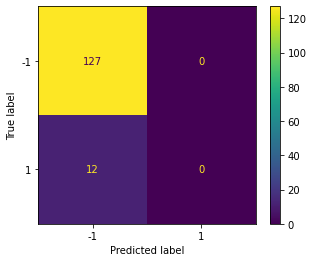

In [113]:
show_mertics(svc, X_train_rfc, y_train_oversampled, X_test_rfc, y_test)

Train model with pca data

In [62]:
svc.fit(X_train_pca, y_train_oversampled)

SVC(probability=True, random_state=42)

Average Balanced Accuracy of model for "train data":-- 95.3%
Balaned Accuracy of model for "test data":----------- 50.0%
True Positive Rate of model for test data:----------- 0.0%
False Positive Rate of model for test data:---------- 0.0%
Accuracy (Overal performance) of model:-------------- 91.4%


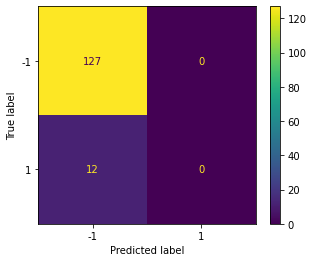

In [63]:
show_mertics(svc, X_train_pca, y_train_oversampled, X_test_pca, y_test)

with same model, the performance of model is also same, but balanced accuracy ist too low

### KNN
I create KNN model using **sklearn.neighbors.KNeighborsClassifier** 

In [64]:
knn = KNeighborsClassifier()

Train model with rfc data

In [65]:
knn.fit(X_train_rfc, y_train_oversampled)

KNeighborsClassifier()

Average Balanced Accuracy of model for "train data":-- 95.0%
Balaned Accuracy of model for "test data":----------- 50.0%
True Positive Rate of model for test data:----------- 0.0%
False Positive Rate of model for test data:---------- 0.0%
Accuracy (Overal performance) of model:-------------- 91.4%


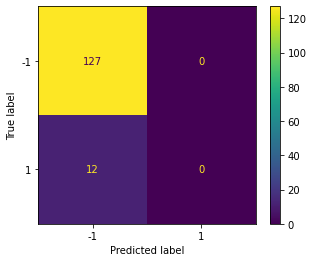

In [66]:
show_mertics(knn, X_train_rfc, y_train_oversampled, X_test_rfc, y_test)

Train model with pca data

Average Balanced Accuracy of model for "train data":-- 95.0%
Balaned Accuracy of model for "test data":----------- 50.0%
True Positive Rate of model for test data:----------- 0.0%
False Positive Rate of model for test data:---------- 0.0%
Accuracy (Overal performance) of model:-------------- 91.4%


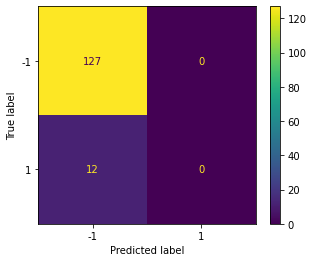

In [67]:
knn.fit(X_train_pca, y_train_oversampled)

show_mertics(knn, X_train_pca, y_train_oversampled, X_test_pca, y_test)

### Logistic Regression
I create Logistic Regression model using **sklearn.linear_model.LogisticRegression**

In [68]:
lr = LogisticRegression(max_iter=300, random_state=42)

train model with rfc  data

In [69]:
lr.fit(X_train_rfc, y_train_oversampled)

LogisticRegression(max_iter=300, random_state=42)

Average Balanced Accuracy of model for "train data":-- 94.0%
Balaned Accuracy of model for "test data":----------- 48.0%
True Positive Rate of model for test data:----------- 0.0%
False Positive Rate of model for test data:---------- 3.9%
Accuracy (Overal performance) of model:-------------- 87.8%


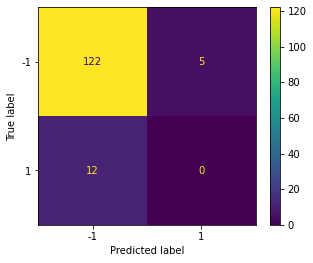

In [70]:
show_mertics(lr, X_train_rfc, y_train_oversampled, X_test_rfc, y_test)

Average Balanced Accuracy of model for "train data":-- 92.5%
Balaned Accuracy of model for "test data":----------- 51.4%
True Positive Rate of model for test data:----------- 8.3%
False Positive Rate of model for test data:---------- 5.5%
Accuracy (Overal performance) of model:-------------- 87.1%


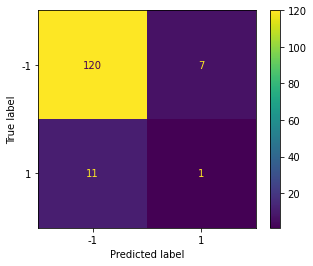

In [71]:
show_mertics(lr, X_train_pca, y_train_oversampled, X_test_pca, y_test)

**To this point *LR model* trained with *pca* data had best performance**

### Naive Bayes
I creat Naive Bayes model using **sklearn.naive_bayes.GaussianNB**

In [305]:
gb = GaussianNB()

Average Balanced Accuracy of model for "train data":-- 95.2%
Balaned Accuracy of model for "test data":----------- 50.0%
True Positive Rate of model for test data:----------- 0.0%
False Positive Rate of model for test data:---------- 0.0%
Accuracy (Overal performance) of model:-------------- 91.4%


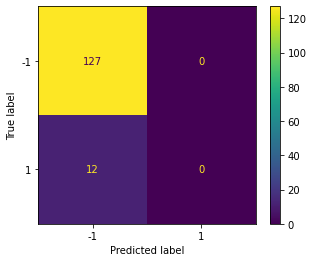

In [73]:
show_mertics(gb, X_train_rfc, y_train_oversampled, X_test_rfc, y_test)

Average Balanced Accuracy of model for "train data":-- 95.3%
Balaned Accuracy of model for "test data":----------- 50.0%
True Positive Rate of model for test data:----------- 0.0%
False Positive Rate of model for test data:---------- 0.0%
Accuracy (Overal performance) of model:-------------- 91.4%


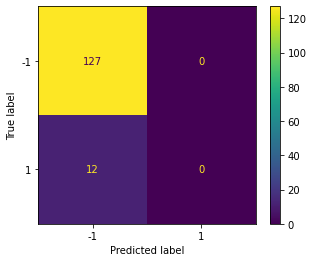

In [306]:
show_mertics(gb, X_train_pca, y_train_oversampled, X_test_pca, y_test)

Naive bayes trained with pca is the second best

### Random Forest
I creat Random forest model using **sklearn.ensemble.RandomForestClassifier**

In [75]:
rf = RandomForestClassifier(n_estimators=50, max_depth=3, min_samples_leaf=50, random_state=42)

Average Balanced Accuracy of model for "train data":-- 95.2%
Balaned Accuracy of model for "test data":----------- 50.0%
True Positive Rate of model for test data:----------- 0.0%
False Positive Rate of model for test data:---------- 0.0%
Accuracy (Overal performance) of model:-------------- 91.4%


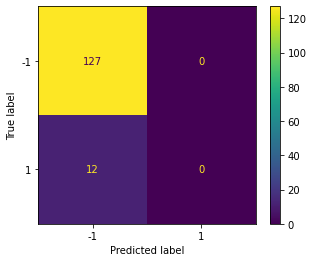

In [76]:
show_mertics(rf, X_train_rfc, y_train_oversampled, X_test_rfc, y_test)

Average Balanced Accuracy of model for "train data":-- 95.3%
Balaned Accuracy of model for "test data":----------- 49.2%
True Positive Rate of model for test data:----------- 0.0%
False Positive Rate of model for test data:---------- 1.6%
Accuracy (Overal performance) of model:-------------- 89.9%


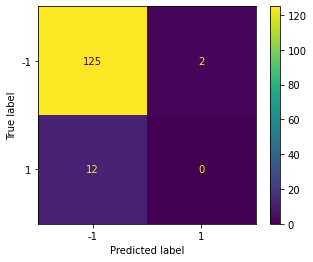

In [77]:
show_mertics(rf, X_train_pca, y_train_oversampled, X_test_pca, y_test)

### Gradient Boosting
I creat Gradient Boosting model using **sklearn.ensemble.GradientBoostingClassifier**

In [310]:
gbc = GradientBoostingClassifier(learning_rate=0.01, n_estimators=10, random_state=42)

Average Balanced Accuracy of model for "train data":-- 93.3%
Balaned Accuracy of model for "test data":----------- 48.4%
True Positive Rate of model for test data:----------- 0.0%
False Positive Rate of model for test data:---------- 3.1%
Accuracy (Overal performance) of model:-------------- 88.5%


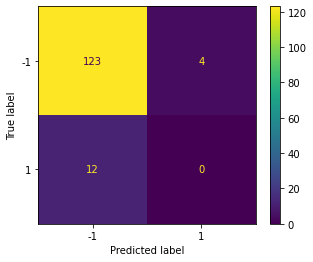

In [311]:
show_mertics(gbc, X_train_rfc, y_train_oversampled, X_test_rfc, y_test)

Average Balanced Accuracy of model for "train data":-- 94.3%
Balaned Accuracy of model for "test data":----------- 47.2%
True Positive Rate of model for test data:----------- 0.0%
False Positive Rate of model for test data:---------- 5.5%
Accuracy (Overal performance) of model:-------------- 86.3%


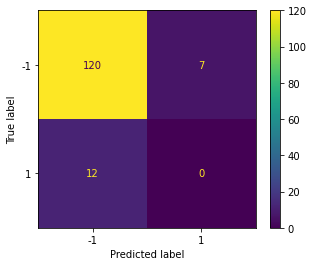

In [312]:
show_mertics(gbc, X_train_pca, y_train_oversampled, X_test_pca, y_test)

The 3 best models in this step are:
1. LR -- with pca data
2. NB -- with pca data

and peformance of PCA data is better than rfc Data 

### Hyperparameter Optimization

In this section I tried to Optimizing the Hyperparameters of models using **GrideSearchCV**

### Decision Tree

In [81]:
params = {'criterion':['entropy', 'gini'],
          'max_depth':[2, 3, 4, 5],
          'min_samples_leaf':[1, 2, 3, 5, 10, 50]
         }


In [82]:
dt = DecisionTreeClassifier( max_depth=3, random_state=42)

In [83]:
dt_gSearcher = GridSearchCV(dt, params, scoring='recall',cv=10, n_jobs=-1)

dt_gSearcher.fit(X_train_rfc, y_train_oversampled);

Showing the optimized parameters with rfc data:

In [87]:
opt_hyParam = pd.DataFrame(dt_gSearcher.cv_results_).sort_values('mean_test_score', ascending=False)[['params', 'mean_test_score', 'rank_test_score']].head()

In [88]:
opt_hyParam

params  mean_test_score  \
0   {'criterion': 'entropy', 'max_depth': 2, 'min_...         0.917241   
1   {'criterion': 'entropy', 'max_depth': 2, 'min_...         0.917241   
22  {'criterion': 'gini', 'max_depth': 2, 'min_sam...         0.917241   
23  {'criterion': 'gini', 'max_depth': 2, 'min_sam...         0.917241   
24  {'criterion': 'gini', 'max_depth': 2, 'min_sam...         0.917241   

    rank_test_score  
0                 1  
1                 1  
22                1  
23                1  
24                1

In [89]:
# Showing the first best parameters
opt_hyParam.iloc[0,0]

{'criterion': 'entropy', 'max_depth': 2, 'min_samples_leaf': 1}

train and test model with best parameters with rfc data

Average Balanced Accuracy of model for "train data":-- 95.2%
Balaned Accuracy of model for "test data":----------- 48.8%
True Positive Rate of model for test data:----------- 0.0%
False Positive Rate of model for test data:---------- 2.4%
Accuracy (Overal performance) of model:-------------- 89.2%


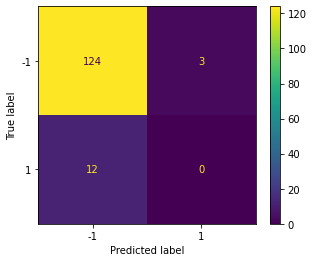

In [90]:
dt1 = DecisionTreeClassifier(criterion='entropy', max_depth=2, min_samples_leaf=1)

show_mertics(dt1, X_train_rfc, y_train_oversampled, X_test_rfc, y_test)

In [91]:
# Showing the second best parameters

opt_hyParam.iloc[1,0]

{'criterion': 'entropy', 'max_depth': 2, 'min_samples_leaf': 2}

Average Balanced Accuracy of model for "train data":-- 95.2%
Balaned Accuracy of model for "test data":----------- 48.8%
True Positive Rate of model for test data:----------- 0.0%
False Positive Rate of model for test data:---------- 2.4%
Accuracy (Overal performance) of model:-------------- 89.2%


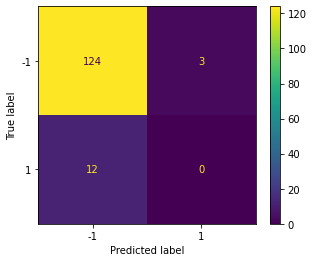

In [92]:
dt2 = DecisionTreeClassifier(criterion='entropy', max_depth=2, min_samples_leaf=2)

show_mertics(dt2, X_train_rfc, y_train_oversampled, X_test_rfc, y_test)

In [94]:
# Showing the 3th best parameters

opt_hyParam.iloc[4,0]

{'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 10}

Average Balanced Accuracy of model for "train data":-- 94.7%
Balaned Accuracy of model for "test data":----------- 48.8%
True Positive Rate of model for test data:----------- 0.0%
False Positive Rate of model for test data:---------- 2.4%
Accuracy (Overal performance) of model:-------------- 89.2%


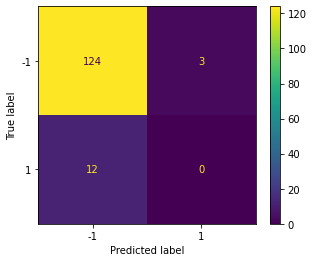

In [95]:
dt3 = DecisionTreeClassifier(criterion='gini', max_depth=2, min_samples_leaf=10)

show_mertics(dt3, X_train_rfc, y_train_oversampled, X_test_rfc, y_test)

DT model trained with rfc data has very low **TPR** also is not a good model

Optimizing parameters with pca train data

In [96]:
dt_gSearcher.fit(X_train_pca, y_train_oversampled);

In [97]:
opt_hyParam = pd.DataFrame(dt_gSearcher.cv_results_).sort_values('mean_test_score', ascending=False)[['params', 'mean_test_score', 'rank_test_score']].head()
opt_hyParam

params  mean_test_score  \
0   {'criterion': 'entropy', 'max_depth': 2, 'min_...         0.906897   
1   {'criterion': 'entropy', 'max_depth': 2, 'min_...         0.906897   
22  {'criterion': 'gini', 'max_depth': 2, 'min_sam...         0.906897   
23  {'criterion': 'gini', 'max_depth': 2, 'min_sam...         0.906897   
24  {'criterion': 'gini', 'max_depth': 2, 'min_sam...         0.906897   

    rank_test_score  
0                 1  
1                 1  
22                1  
23                1  
24                1

In [98]:
opt_hyParam.iloc[0,0]

{'criterion': 'entropy', 'max_depth': 2, 'min_samples_leaf': 1}

Average Balanced Accuracy of model for "train data":-- 94.5%
Balaned Accuracy of model for "test data":----------- 50.6%
True Positive Rate of model for test data:----------- 8.3%
False Positive Rate of model for test data:---------- 7.1%
Accuracy (Overal performance) of model:-------------- 85.6%


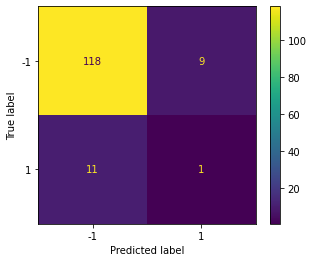

In [99]:
dt4 = DecisionTreeClassifier(criterion='entropy', max_depth=2, min_samples_leaf=1)
show_mertics(dt4, X_train_pca, y_train_oversampled, X_test_pca, y_test)

In [100]:
opt_hyParam.iloc[1,0]

{'criterion': 'entropy', 'max_depth': 2, 'min_samples_leaf': 2}

Average Balanced Accuracy of model for "train data":-- 94.5%
Balaned Accuracy of model for "test data":----------- 50.6%
True Positive Rate of model for test data:----------- 8.3%
False Positive Rate of model for test data:---------- 7.1%
Accuracy (Overal performance) of model:-------------- 85.6%


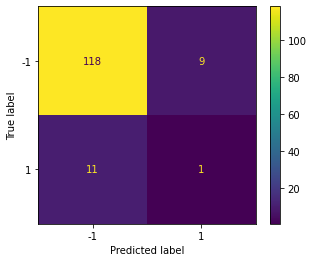

In [101]:
dt5 = DecisionTreeClassifier(criterion='entropy', max_depth=2, min_samples_leaf=2)
show_mertics(dt5, X_train_pca, y_train_oversampled, X_test_pca, y_test)


**SVM**

In [104]:
params = {
#           'C': [0.001, 0.01, 0.1, 1, 10],    
          'C':[0.00001, 0.0001, 0.001, 0.01, 0.1],
          'kernel':['linear', 'rbf'],
#           'gamma': [0.001, 0.01, 0.1, 1],    
          'gamma': [1, 50, 100, 150, 1000]
         }

In [105]:
svc_gSearcher = GridSearchCV(svc, params, scoring='recall', cv=10, n_jobs=-1)

In [106]:
svc_gSearcher.fit(X_train_rfc, y_train_oversampled);

In [107]:
pd.DataFrame(svc_gSearcher.cv_results_).sort_values('mean_test_score', ascending=False)[['params', 'mean_test_score', 'rank_test_score']].head()


params  mean_test_score  \
10     {'C': 0.0001, 'gamma': 1, 'kernel': 'linear'}         0.910345   
18  {'C': 0.0001, 'gamma': 1000, 'kernel': 'linear'}         0.910345   
16   {'C': 0.0001, 'gamma': 150, 'kernel': 'linear'}         0.910345   
14   {'C': 0.0001, 'gamma': 100, 'kernel': 'linear'}         0.910345   
12    {'C': 0.0001, 'gamma': 50, 'kernel': 'linear'}         0.910345   

    rank_test_score  
10                1  
18                1  
16                1  
14                1  
12                1

Average Balanced Accuracy of model for "train data":-- 95.5%
Balaned Accuracy of model for "test data":----------- 50.0%
True Positive Rate of model for test data:----------- 0.0%
False Positive Rate of model for test data:---------- 0.0%
Accuracy (Overal performance) of model:-------------- 91.4%


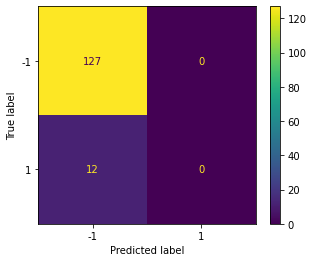

In [108]:
svc1 = SVC(C=0.0001, gamma=1, kernel='linear')

show_mertics(svc1, X_train_rfc, y_train_oversampled, X_test_rfc, y_test)

Average Balanced Accuracy of model for "train data":-- 95.5%
Balaned Accuracy of model for "test data":----------- 50.0%
True Positive Rate of model for test data:----------- 0.0%
False Positive Rate of model for test data:---------- 0.0%
Accuracy (Overal performance) of model:-------------- 91.4%


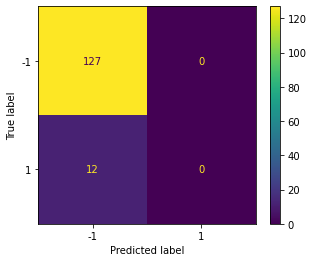

In [109]:
svc2 = SVC(C=0.0001, gamma=1000, kernel='linear')

show_mertics(svc2, X_train_rfc, y_train_oversampled, X_test_rfc, y_test)

Average Balanced Accuracy of model for "train data":-- 95.5%
Balaned Accuracy of model for "test data":----------- 50.0%
True Positive Rate of model for test data:----------- 0.0%
False Positive Rate of model for test data:---------- 0.0%
Accuracy (Overal performance) of model:-------------- 91.4%


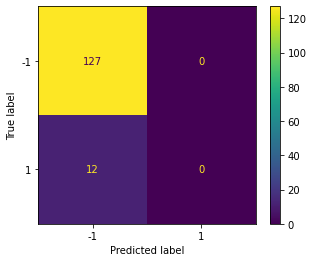

In [110]:
svc3 = SVC(C=0.0001, gamma=150, kernel='linear')

show_mertics(svc3, X_train_rfc, y_train_oversampled, X_test_rfc, y_test)

In [114]:
svc_gSearcher.fit(X_train_pca, y_train_oversampled);

In [115]:
pd.DataFrame(svc_gSearcher.cv_results_).sort_values('mean_test_score', ascending=False)[['params', 'mean_test_score', 'rank_test_score']].head(10)

params  mean_test_score  \
0     {'C': 1e-05, 'gamma': 1, 'kernel': 'linear'}         0.906897   
30     {'C': 0.01, 'gamma': 1, 'kernel': 'linear'}         0.906897   
32    {'C': 0.01, 'gamma': 50, 'kernel': 'linear'}         0.906897   
26  {'C': 0.001, 'gamma': 150, 'kernel': 'linear'}         0.906897   
34   {'C': 0.01, 'gamma': 100, 'kernel': 'linear'}         0.906897   
24  {'C': 0.001, 'gamma': 100, 'kernel': 'linear'}         0.906897   
36   {'C': 0.01, 'gamma': 150, 'kernel': 'linear'}         0.906897   
22   {'C': 0.001, 'gamma': 50, 'kernel': 'linear'}         0.906897   
38  {'C': 0.01, 'gamma': 1000, 'kernel': 'linear'}         0.906897   
20    {'C': 0.001, 'gamma': 1, 'kernel': 'linear'}         0.906897   

    rank_test_score  
0                 1  
30                1  
32                1  
26                1  
34                1  
24                1  
36                1  
22                1  
38                1  
20                1

Average Balanced Accuracy of model for "train data":-- 95.3%
Balaned Accuracy of model for "test data":----------- 50.0%
True Positive Rate of model for test data:----------- 0.0%
False Positive Rate of model for test data:---------- 0.0%
Accuracy (Overal performance) of model:-------------- 91.4%


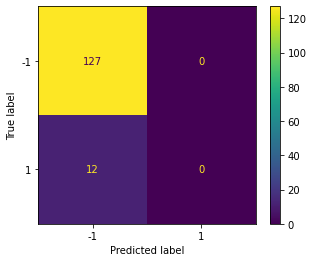

In [116]:
svc4 = SVC(C=0.00001, gamma=1, kernel='linear')

show_mertics(svc4, X_train_pca, y_train_oversampled, X_test_pca, y_test)

Average Balanced Accuracy of model for "train data":-- 94.0%
Balaned Accuracy of model for "test data":----------- 49.2%
True Positive Rate of model for test data:----------- 0.0%
False Positive Rate of model for test data:---------- 1.6%
Accuracy (Overal performance) of model:-------------- 89.9%


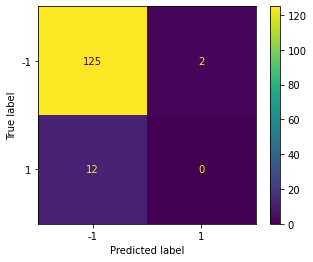

In [117]:
svc5 = SVC(C=0.01, gamma=1, kernel='linear')

show_mertics(svc5, X_train_pca, y_train_oversampled, X_test_pca, y_test)

***KNN***

In [119]:
params = {'n_neighbors':[1, 2, 3, 4, 5, 7, 10, 30]}
# params = {'n_neighbors':[15, 20, 25, 30, 40, 50]}


In [120]:
knn_gSearcher = GridSearchCV(knn, params, scoring='recall',cv=10)

In [121]:
knn_gSearcher.fit(X_train_rfc, y_train_oversampled);

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 7, 10, 30]},
             scoring='recall')

In [122]:
pd.DataFrame(knn_gSearcher.cv_results_).sort_values('mean_test_score', ascending=False)[['params', 'mean_test_score', 'rank_test_score']].head()

params  mean_test_score  rank_test_score
6  {'n_neighbors': 10}         0.910345                1
7  {'n_neighbors': 30}         0.910345                1
0   {'n_neighbors': 1}         0.906897                3
1   {'n_neighbors': 2}         0.906897                3
2   {'n_neighbors': 3}         0.906897                3

Average Balanced Accuracy of model for "train data":-- 95.5%
Balaned Accuracy of model for "test data":----------- 50.0%
True Positive Rate of model for test data:----------- 0.0%
False Positive Rate of model for test data:---------- 0.0%
Accuracy (Overal performance) of model:-------------- 91.4%


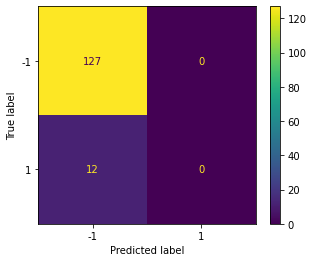

In [123]:
knn1 = KNeighborsClassifier(n_neighbors=10)

show_mertics(knn1, X_train_rfc, y_train_oversampled, X_test_rfc, y_test)

Average Balanced Accuracy of model for "train data":-- 95.5%
Balaned Accuracy of model for "test data":----------- 50.0%
True Positive Rate of model for test data:----------- 0.0%
False Positive Rate of model for test data:---------- 0.0%
Accuracy (Overal performance) of model:-------------- 91.4%


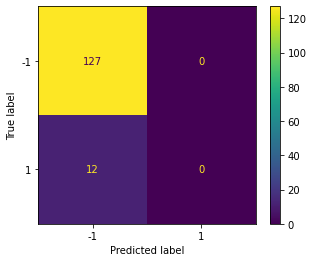

In [124]:
knn2 = KNeighborsClassifier(n_neighbors=30)

show_mertics(knn2, X_train_rfc, y_train_oversampled, X_test_rfc, y_test)

In [125]:
knn_gSearcher.fit(X_train_pca, y_train_oversampled)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 7, 10, 30]},
             scoring='recall')

In [126]:
pd.DataFrame(knn_gSearcher.cv_results_).sort_values('mean_test_score', ascending=False)[['params', 'mean_test_score', 'rank_test_score']].head()

params  mean_test_score  rank_test_score
0  {'n_neighbors': 1}         0.906897                1
1  {'n_neighbors': 2}         0.906897                1
2  {'n_neighbors': 3}         0.906897                1
3  {'n_neighbors': 4}         0.906897                1
4  {'n_neighbors': 5}         0.906897                1

Average Balanced Accuracy of model for "train data":-- 93.8%
Balaned Accuracy of model for "test data":----------- 51.8%
True Positive Rate of model for test data:----------- 8.3%
False Positive Rate of model for test data:---------- 4.7%
Accuracy (Overal performance) of model:-------------- 87.8%


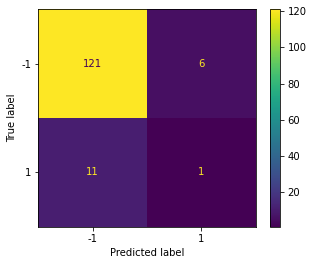

In [127]:
knn3 = KNeighborsClassifier(n_neighbors=1)

show_mertics(knn3, X_train_pca, y_train_oversampled, X_test_pca, y_test)

***Logistic Regression***

In [152]:
params = {'C':[0.05, 0.1, 0.5, 1, 10, 50, 100, 500]}


In [153]:
lr_gSearcher = GridSearchCV(lr, params, scoring='recall', cv=10, n_jobs=-1)

In [154]:
lr_gSearcher.fit(X_train_rfc, y_train_oversampled);

In [155]:
pd.DataFrame(lr_gSearcher.cv_results_).sort_values('mean_test_score', ascending=False)[['params', 'mean_test_score', 'rank_test_score']].head()

params  mean_test_score  rank_test_score
0  {'C': 0.05}         0.906897                1
1   {'C': 0.1}         0.906897                1
2   {'C': 0.5}         0.906897                1
3     {'C': 1}         0.906897                1
4    {'C': 10}         0.906897                1

Average Balanced Accuracy of model for "train data":-- 94.8%
Balaned Accuracy of model for "test data":----------- 50.0%
True Positive Rate of model for test data:----------- 0.0%
False Positive Rate of model for test data:---------- 0.0%
Accuracy (Overal performance) of model:-------------- 91.4%


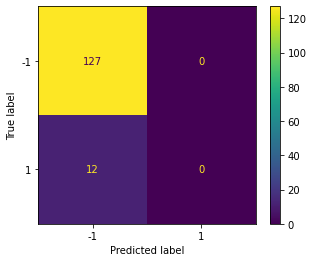

In [156]:
lr1 = LogisticRegression(C=0.05, random_state=42, max_iter=400)

show_mertics(lr1, X_train_rfc, y_train_oversampled, X_test_rfc, y_test)

Average Balanced Accuracy of model for "train data":-- 93.7%
Balaned Accuracy of model for "test data":----------- 48.0%
True Positive Rate of model for test data:----------- 0.0%
False Positive Rate of model for test data:---------- 3.9%
Accuracy (Overal performance) of model:-------------- 87.8%


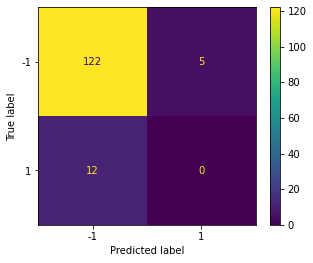

In [160]:
lr2 = LogisticRegression(C=10, max_iter=400, random_state=42)

show_mertics(lr2, X_train_rfc, y_train_oversampled, X_test_rfc, y_test)

In [162]:
lr_gSearcher.fit(X_train_pca, y_train_oversampled);

In [163]:
pd.DataFrame(lr_gSearcher.cv_results_).sort_values('mean_test_score', ascending=False)[['params', 'mean_test_score', 'rank_test_score']].head()

params  mean_test_score  rank_test_score
0  {'C': 0.05}         0.906897                1
1   {'C': 0.1}         0.906897                1
2   {'C': 0.5}         0.906897                1
3     {'C': 1}         0.906897                1
4    {'C': 10}         0.906897                1

Average Balanced Accuracy of model for "train data":-- 93.6%
Balaned Accuracy of model for "test data":----------- 52.6%
True Positive Rate of model for test data:----------- 8.3%
False Positive Rate of model for test data:---------- 3.1%
Accuracy (Overal performance) of model:-------------- 89.2%


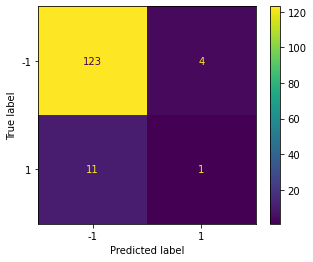

In [164]:
lr3 = LogisticRegression(C=0.05, max_iter=400, random_state=42)

show_mertics(lr3, X_train_pca, y_train_oversampled, X_test_pca, y_test)

Average Balanced Accuracy of model for "train data":-- 93.1%
Balaned Accuracy of model for "test data":----------- 52.2%
True Positive Rate of model for test data:----------- 8.3%
False Positive Rate of model for test data:---------- 3.9%
Accuracy (Overal performance) of model:-------------- 88.5%


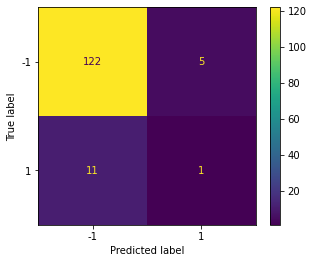

In [165]:
lr4 = LogisticRegression(C=0.1, max_iter=400, random_state=42)

show_mertics(lr4, X_train_pca, y_train_oversampled, X_test_pca, y_test)

Average Balanced Accuracy of model for "train data":-- 92.5%
Balaned Accuracy of model for "test data":----------- 51.4%
True Positive Rate of model for test data:----------- 8.3%
False Positive Rate of model for test data:---------- 5.5%
Accuracy (Overal performance) of model:-------------- 87.1%


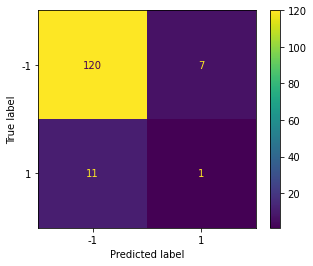

In [166]:
lr5 = LogisticRegression(C=1, max_iter=400, random_state=42)

show_mertics(lr5, X_train_pca, y_train_oversampled, X_test_pca, y_test)

Average Balanced Accuracy of model for "train data":-- 91.4%
Balaned Accuracy of model for "test data":----------- 50.6%
True Positive Rate of model for test data:----------- 8.3%
False Positive Rate of model for test data:---------- 7.1%
Accuracy (Overal performance) of model:-------------- 85.6%


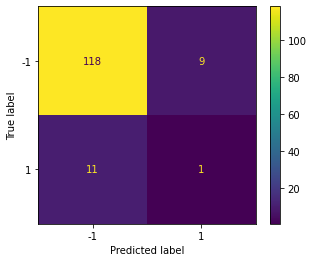

In [167]:
lr6 = LogisticRegression(C=10, max_iter=400, random_state=42)

show_mertics(lr6, X_train_pca, y_train_oversampled, X_test_pca, y_test)

### Iteration 2

wiht out dropping Null Values and by using eliminating high correlated features

in this iteration I tried to handelling missing value and then have trained all models again

In [168]:
df = pd.read_csv('uci-secom-processed.csv')

In [169]:
df.head()

Time        0        1          2          3       4  \
0  2008-07-19 11:55:00  3030.93  2564.00  2187.7333  1411.1265  1.3602   
1  2008-07-19 12:32:00  3095.78  2465.14  2230.4222  1463.6606  0.8294   
2  2008-07-19 13:17:00  2932.61  2559.94  2186.4111  1698.0172  1.5102   
3  2008-07-19 14:43:00  2988.72  2479.90  2199.0333   909.7926  1.3204   
4  2008-07-19 15:22:00  3032.24  2502.87  2233.3667  1326.5200  1.5334   

          6       7       8       9      10      11        12       14  \
0   97.6133  0.1242  1.5005  0.0162 -0.0034  0.9455  202.4396   7.9558   
1  102.3433  0.1247  1.4966 -0.0005 -0.0148  0.9627  200.5470  10.1548   
2   95.4878  0.1241  1.4436  0.0041  0.0013  0.9615  202.0179   9.5157   
3  104.2367  0.1217  1.4882 -0.0124 -0.0033  0.9629  201.8482   9.6052   
4  100.3967  0.1235  1.5031 -0.0031 -0.0072  0.9569  201.9424  10.5661   

         15       16      17        18       19      20       21       22  \
0  414.8710  10.0433  0.9680  192.3963  12.5190  1.4026 -5419.00  2916.50   
1  414.7347   9.2599  0.9701  191.2872  12.4608  1.3825 -5441.50  2604.25   
2  416.7075   9.3144  0.9674  192.7035  12.5404  1.4123 -5447.75  2701.75   
3  422.2894   9.6924  0.9687  192.1557  12.4782  1.4011 -5468.25  2648.25   
4  420.5925  10.3387  0.9735  191.6037  12.4735  1.3888 -5476.25  2635.25   

        23       24      25      26      27       28      29      30      31  \
0 -4043.75   751.00  0.8955  1.7730  3.0490  64.2333  2.0222  0.1632  3.5191   
1 -3498.75 -1640.25  1.2973  2.0143  7.3900  68.4222  2.2667  0.2102  3.4171   
2 -4047.00 -1916.50  1.3122  2.0295  7.5788  67.1333  2.3333  0.1734  3.5986   
3 -4515.00 -1657.25  1.3137  2.0038  7.3145  62.9333  2.6444  0.2071  3.3813   
4 -3987.50   117.00  1.2887  1.9912  7.2748  62.8333  3.1556  0.2696  3.2728   

        32      33       34       35       36       37       38        39  \
0  83.3971  9.5126  50.6170  64.2588  49.3830  66.3141  86.9555  117.5132   
1  84.9052  9.7997  50.6596  64.2828  49.3404  64.9193  87.5241  118.1188   
2  84.7569  8.6590  50.1530  64.1114  49.8470  65.8389  84.7327  118.6128   
3  84.9105  8.6789  50.5100  64.1125  49.4900  65.1951  86.6867  117.0442   
4  86.3269  8.7677  50.2480  64.1511  49.7520  66.1542  86.1468  121.4364   

      40     41        43       44        45        46      47        48  \
0  61.29  4.515  352.7173  10.1841  130.3691  723.3092  1.3072  141.2282   
1  78.25  2.773  352.2445  10.0373  133.1727  724.8264  1.2887  145.8445   
2  14.37  5.434  364.3782   9.8783  131.8027  734.7924  1.2992  141.0845   
3  76.90  1.279  363.0273   9.9305  131.8027  733.8778  1.3027  142.5427   
4  76.39  2.209  353.3400  10.4091  176.3136  789.7523  1.0341  138.0882   

         50        51     53     54      55      56      57      58       59  \
0  624.3145  218.3174  4.592  4.841  2834.0  0.9317  0.9484  4.7057  -1.7264   
1  631.2618  205.1695  4.590  4.842  2853.0  0.9324  0.9479  4.6820   0.8073   
2  637.2655  185.7574  4.486  4.748  2936.0  0.9139  0.9447  4.5873  23.8245   
3  637.3727  189.9079  4.486  4.748  2936.0  0.9139  0.9447  4.5873  24.3791   
4  667.7418  233.5491  4.624  4.894  2865.0  0.9298  0.9449  4.6414 -12.2945   

         60       61        62       63       64       65        66      67  \
0  350.9264  10.6231  108.6427  16.1445  21.7264  29.5367  693.7724  0.9226   
1  352.0073  10.3092  113.9800  10.9036  19.1927  27.6301  697.1964  1.1598   
2  364.5364  10.1685  115.6273  11.3019  16.1755  24.2829  710.5095  0.8694   
3  361.4582  10.2112  116.1818  13.5597  15.6209  23.4736  710.4043  0.9761   
4  355.0809   9.7948  144.0191  21.9782  32.2945  44.1498  745.6025  0.9256   

         68        70       71   74      75      76      77      78      79  \
0  148.6009  608.1700  84.0793  0.0  0.0126 -0.0206  0.0141 -0.0307 -0.0083   
1  154.3709  620.3582  82.3494  0.0 -0.0039 -0.0198  0.0004 -0.0440 -0.0358   
2  145.8000  625.9636  84.7681  0.0 -0.0078 -0.0326 -0.0052  0.0213 -0.

In [170]:
df.shape

(1567, 448)

In [171]:
df = df.drop(['Time'], axis=1)

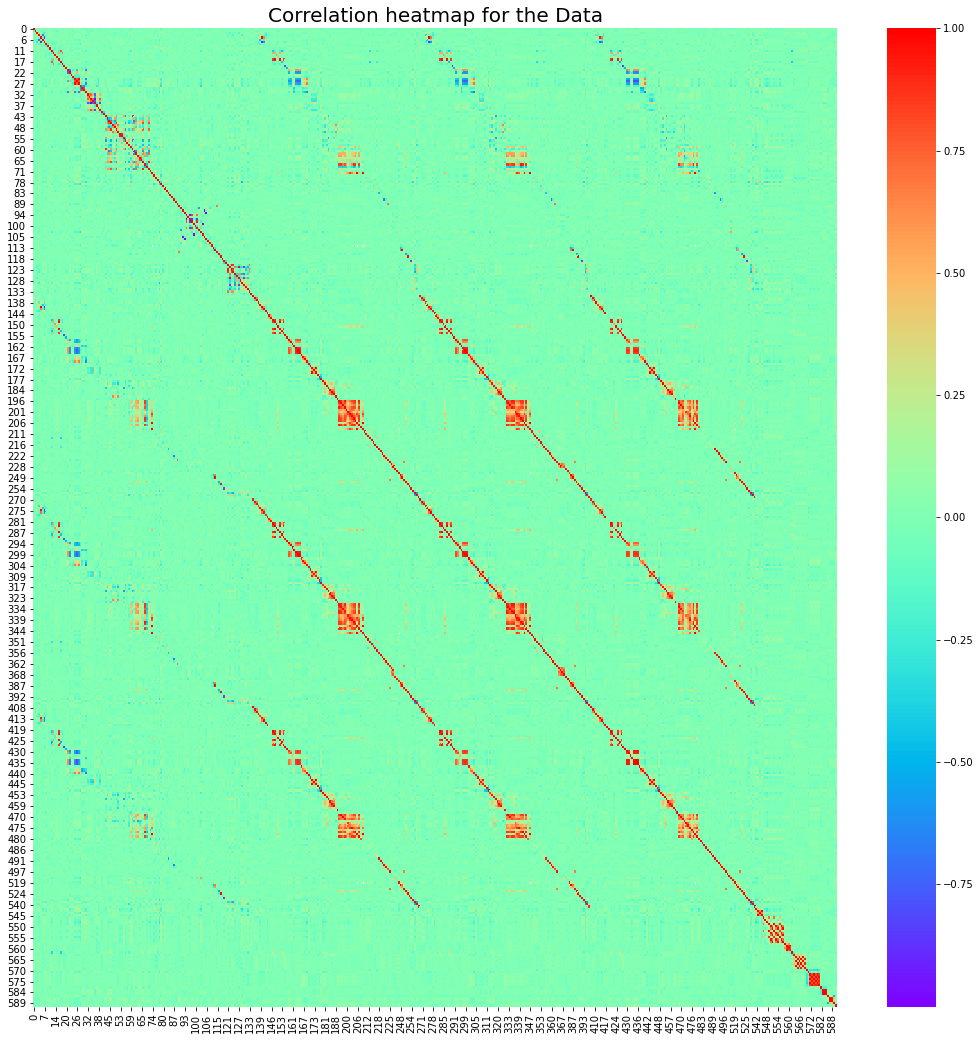

In [172]:
plt.rcParams['figure.figsize'] = (18, 18)
sns.heatmap(df.corr(), cmap = "rainbow")
plt.title('Correlation heatmap for the Data', fontsize = 20);

There are some hight correlated features regarding to Correlation heatmap, and I tried to removing them.

### Drop high correlated features
I want to remove high correlated feature these features prone to make the model inifficient. I do it in 3 steps:<br>
 1. Create correlations matrix 
 2. Selesting Upper or lower trigular matrix (note that Correlation matrix will be mirror image about the diagonal and all the diagonal elements will be 1)
 3. finding and droping the column with high correlation

***Note: I consider the correlation > 0.7 to be high!***

[Reference](https://www.dezyre.com/recipes/drop-out-highly-correlated-features-in-python)

In [173]:
# Step 1: create correlation matrix 

cor_matrix = df.corr().abs()

In [174]:
# Step 2: Selecting upper trigular matrix

upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape), k=1).astype(np.bool))
upper_tri

0         1         2         3         4         6         7  \
0         NaN  0.145071  0.004775  0.007655  0.011047  0.002281  0.031510   
1         NaN       NaN  0.005802  0.007603  0.001641  0.025702  0.012084   
2         NaN       NaN       NaN  0.298935  0.095891  0.136225  0.273970   
3         NaN       NaN       NaN       NaN  0.058483  0.685835  0.138290   
4         NaN       NaN       NaN       NaN       NaN  0.074368  0.916410   
...        ..       ...       ...       ...       ...       ...       ...   
586       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
587       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
588       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
589       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
Pass_Fail NaN       NaN       NaN       NaN       NaN       NaN       NaN   

                  8         9        10        11        12        14  \
0          0.052731  0.009052  0.006515  0.043577  0.010386  0.007089   
1          0.031321  0.024015  0.009662  0.026941  0.034120  0.037842   
2          0.023609  0.016291  0.069989  0.036389  0.018356  0.006507   
3          0.103656  0.068998  0.050137  0.040687  0.028384  0.020006   
4          0.026035  0.054619  0.006478  0.000987  0.002711  0.017607   
...             ...       ...       ...       ...       ...       ...   
586             NaN       NaN       NaN       NaN       NaN       NaN   
587             NaN       NaN       NaN       NaN       NaN       NaN   
588             NaN       NaN       NaN       NaN       NaN       NaN   
589             NaN       NaN       NaN       NaN       NaN       NaN   
Pass_Fail       NaN       NaN       NaN       NaN       NaN       NaN   

                 15        16        17        18        19        20  \
0          0.030712  0.005753  0.012637  0.017732  0.009056  0.025855   
1          0.087535  0.001882  0.009839  0.043082  0.003228  0.032798   
2          0.006126  0.000788  0.004921  0.021933  0.029347  0.015507   
3          0.013236  0.004614  0.042889  0.028810  0.040405  0.038042   
4          0.011456  0.001763  0.000285  0.001613  0.007163  0.012855   
...             ...       ...       ...       ...       ...       ...   
586             NaN       NaN       NaN       NaN       NaN       NaN   
587             NaN       NaN       NaN       NaN       NaN       NaN   
588             NaN       NaN       NaN       NaN       NaN       NaN   
589             NaN       NaN       NaN       NaN       NaN       NaN   
Pass_Fail       NaN       NaN       NaN       NaN       NaN       NaN   

                 21        22        23        24        25        26  \
0          0.011095  0.032250  0.046777  0.014996  0.108831  0.093141   
1          0.058194  0.052703  0.016082  0.060557  0.004642  0.024070   
2          0.044606  0.029901  0.009320  0.021233  0.026546  0.027613   
3          0.021166  0.033202  0.008007  0.049772  0.079853  0.036201   
4          0.008371  0.007784  0.004985  0.013676  0.028321  0.011105   
...             ...       ...       ...       ...       ...       ...   
586             NaN       NaN       NaN       NaN       NaN       NaN   
587             NaN       NaN       NaN       NaN       NaN       NaN   
588             NaN       NaN       NaN       NaN       NaN       NaN   
589             NaN       NaN       NaN       NaN       NaN       NaN   
Pass_Fail       NaN       NaN       NaN       NaN       NaN       NaN   

                 27        28        29        30        31        32  \
0          0.107867  0.054726  0.030968  0.039721  0.056917  0.004651   
1          0.003654  0.022929  0.001674  0.052150  0.051473  0.044646   
2          0.025827  0.061986  0.050220  0.062641  0.007433  0.023376   
3          0.085477  0.097231  0.013400  0.001726  0.109033  0.020663   
4          0.028700  0.007778  0.012957  0.001948  0.035355  0.005512   
...             ..

In [175]:
# Columns that most be removed
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.7)]
len(to_drop)

245

In [176]:
df_drop_correlated = df.drop(df.loc[:, to_drop], axis=1)
df_drop_correlated.head()

0        1          2          3       4         6       8       9  \
0  3030.93  2564.00  2187.7333  1411.1265  1.3602   97.6133  1.5005  0.0162   
1  3095.78  2465.14  2230.4222  1463.6606  0.8294  102.3433  1.4966 -0.0005   
2  2932.61  2559.94  2186.4111  1698.0172  1.5102   95.4878  1.4436  0.0041   
3  2988.72  2479.90  2199.0333   909.7926  1.3204  104.2367  1.4882 -0.0124   
4  3032.24  2502.87  2233.3667  1326.5200  1.5334  100.3967  1.5031 -0.0031   

       10      11        12       14        15       16        18       19  \
0 -0.0034  0.9455  202.4396   7.9558  414.8710  10.0433  192.3963  12.5190   
1 -0.0148  0.9627  200.5470  10.1548  414.7347   9.2599  191.2872  12.4608   
2  0.0013  0.9615  202.0179   9.5157  416.7075   9.3144  192.7035  12.5404   
3 -0.0033  0.9629  201.8482   9.6052  422.2894   9.6924  192.1557  12.4782   
4 -0.0072  0.9569  201.9424  10.5661  420.5925  10.3387  191.6037  12.4735   

       20       21       23       24      25       28      29      31  \
0  1.4026 -5419.00 -4043.75   751.00  0.8955  64.2333  2.0222  3.5191   
1  1.3825 -5441.50 -3498.75 -1640.25  1.2973  68.4222  2.2667  3.4171   
2  1.4123 -5447.75 -4047.00 -1916.50  1.3122  67.1333  2.3333  3.5986   
3  1.4011 -5468.25 -4515.00 -1657.25  1.3137  62.9333  2.6444  3.3813   
4  1.3888 -5476.25 -3987.50   117.00  1.2887  62.8333  3.1556  3.2728   

        32      33       37       38     40     41        43       44  \
0  83.3971  9.5126  66.3141  86.9555  61.29  4.515  352.7173  10.1841   
1  84.9052  9.7997  64.9193  87.5241  78.25  2.773  352.2445  10.0373   
2  84.7569  8.6590  65.8389  84.7327  14.37  5.434  364.3782   9.8783   
3  84.9105  8.6789  65.1951  86.6867  76.90  1.279  363.0273   9.9305   
4  86.3269  8.7677  66.1542  86.1468  76.39  2.209  353.3400  10.4091   

         45      47        48     53      55      56      57      58       59  \
0  130.3691  1.3072  141.2282  4.592  2834.0  0.9317  0.9484  4.7057  -1.7264   
1  133.1727  1.2887  145.8445  4.590  2853.0  0.9324  0.9479  4.6820   0.8073   
2  131.8027  1.2992  141.0845  4.486  2936.0  0.9139  0.9447  4.5873  23.8245   
3  131.8027  1.3027  142.5427  4.486  2936.0  0.9139  0.9447  4.5873  24.3791   
4  176.3136  1.0341  138.0882  4.624  2865.0  0.9298  0.9449  4.6414 -12.2945   

        61        62       63       64      67        68       71   74  \
0  10.6231  108.6427  16.1445  21.7264  0.9226  148.6009  84.0793  0.0   
1  10.3092  113.9800  10.9036  19.1927  1.1598  154.3709  82.3494  0.0   
2  10.1685  115.6273  11.3019  16.1755  0.8694  145.8000  84.7681  0.0   
3  10.2112  116.1818  13.5597  15.6209  0.9761  147.6545  70.2289  0.0   
4   9.7948  144.0191  21.9782  32.2945  0.9256  146.6636  65.8417  0.0   

       75      76      77      78      79      80      81      82      83  \
0  0.0126 -0.0206  0.0141 -0.0307 -0.0083 -0.0026 -0.0567 -0.0044  7.2163   
1 -0.0039 -0.0198  0.0004 -0.0440 -0.0358 -0.0120 -0.0377  0.0017  6.8043   
2 -0.0078 -0.0326 -0.0052  0.0213 -0.0054 -0.1134 -0.0182  0.0287  7.1041   
3 -0.0555 -0.0461 -0.0400  0.0400  0.0676 -0.1051  0.0028  0.0277  7.5925   
4 -0.0534  0.0183 -0.0167 -0.0449  0.0034 -0.0178 -0.0123 -0.0048  7.5017   

       84      86      87         88      89         90      91      92  \
0  0.1320  2.3895  0.9690  1747.6049  0.1841  8671.9301 -0.3274 -0.0055   
1  0.1358  2.3754  0.9894  1931.6464  0.1874  8407.0299  0.1455 -0.0015   
2  0.1362  2.4532  0.9880  1685.8514  0.1497  9317.1698  0.0553  0.0006   
3  0.1302  2.4004  0.9904  1752.0968  0.1958  8205.7000  0.0697 -0.0003   
4  0.1342  2.4530  0.9902  1828.3846  0.1829  9014.4600  0.0448 -0.0077   

       93      94      95      99     100     102     103     107     108  \
0 -0.0001  0.0001  0.0003 -0.0251  0.0002  0.1350 -0.0042 -0.2468  0.3196   
1  0.0000 -0.0005  0.0001 -0.0158 -0.0004 -0.0752 -0.0045  0.0772 -0.0903   
2 -0.0013  0.0000  0.0002  0.1218  0.0006  0.0134 -0.0026 -0.0301 -0.0728   
3 -0.0021 -0.0001  0.0002 -0.0195

In [177]:
df_drop_correlated.shape

(1567, 202)

In [178]:
df_new = df_drop_correlated.copy()

Checking the features with hight percentage of missing values

In [179]:
percent_missing = df_new.isna().sum() * 100 / len(df_new)
missing_value_df = pd.DataFrame({'column_name': df_new.columns, 
                                 #'number_missing':data.isnull().sum(),
                                 'percent_missing': percent_missing})

In [180]:
missing_value_df.sort_values('percent_missing', inplace=True)
missing_value_df.sort_values('percent_missing', inplace=False, ascending=False).head()

column_name  percent_missing
112         112        45.628590
247         247        45.628590
565         565        17.421825
562         562        17.421825
563         563        17.421825

Drop column 112 and 247, because they have ***more than 45% missing value***!

In [181]:
df_new = df_new.drop(['112', '247'], axis=1)

In [182]:
df_new.head()

0        1          2          3       4         6       8       9  \
0  3030.93  2564.00  2187.7333  1411.1265  1.3602   97.6133  1.5005  0.0162   
1  3095.78  2465.14  2230.4222  1463.6606  0.8294  102.3433  1.4966 -0.0005   
2  2932.61  2559.94  2186.4111  1698.0172  1.5102   95.4878  1.4436  0.0041   
3  2988.72  2479.90  2199.0333   909.7926  1.3204  104.2367  1.4882 -0.0124   
4  3032.24  2502.87  2233.3667  1326.5200  1.5334  100.3967  1.5031 -0.0031   

       10      11        12       14        15       16        18       19  \
0 -0.0034  0.9455  202.4396   7.9558  414.8710  10.0433  192.3963  12.5190   
1 -0.0148  0.9627  200.5470  10.1548  414.7347   9.2599  191.2872  12.4608   
2  0.0013  0.9615  202.0179   9.5157  416.7075   9.3144  192.7035  12.5404   
3 -0.0033  0.9629  201.8482   9.6052  422.2894   9.6924  192.1557  12.4782   
4 -0.0072  0.9569  201.9424  10.5661  420.5925  10.3387  191.6037  12.4735   

       20       21       23       24      25       28      29      31  \
0  1.4026 -5419.00 -4043.75   751.00  0.8955  64.2333  2.0222  3.5191   
1  1.3825 -5441.50 -3498.75 -1640.25  1.2973  68.4222  2.2667  3.4171   
2  1.4123 -5447.75 -4047.00 -1916.50  1.3122  67.1333  2.3333  3.5986   
3  1.4011 -5468.25 -4515.00 -1657.25  1.3137  62.9333  2.6444  3.3813   
4  1.3888 -5476.25 -3987.50   117.00  1.2887  62.8333  3.1556  3.2728   

        32      33       37       38     40     41        43       44  \
0  83.3971  9.5126  66.3141  86.9555  61.29  4.515  352.7173  10.1841   
1  84.9052  9.7997  64.9193  87.5241  78.25  2.773  352.2445  10.0373   
2  84.7569  8.6590  65.8389  84.7327  14.37  5.434  364.3782   9.8783   
3  84.9105  8.6789  65.1951  86.6867  76.90  1.279  363.0273   9.9305   
4  86.3269  8.7677  66.1542  86.1468  76.39  2.209  353.3400  10.4091   

         45      47        48     53      55      56      57      58       59  \
0  130.3691  1.3072  141.2282  4.592  2834.0  0.9317  0.9484  4.7057  -1.7264   
1  133.1727  1.2887  145.8445  4.590  2853.0  0.9324  0.9479  4.6820   0.8073   
2  131.8027  1.2992  141.0845  4.486  2936.0  0.9139  0.9447  4.5873  23.8245   
3  131.8027  1.3027  142.5427  4.486  2936.0  0.9139  0.9447  4.5873  24.3791   
4  176.3136  1.0341  138.0882  4.624  2865.0  0.9298  0.9449  4.6414 -12.2945   

        61        62       63       64      67        68       71   74  \
0  10.6231  108.6427  16.1445  21.7264  0.9226  148.6009  84.0793  0.0   
1  10.3092  113.9800  10.9036  19.1927  1.1598  154.3709  82.3494  0.0   
2  10.1685  115.6273  11.3019  16.1755  0.8694  145.8000  84.7681  0.0   
3  10.2112  116.1818  13.5597  15.6209  0.9761  147.6545  70.2289  0.0   
4   9.7948  144.0191  21.9782  32.2945  0.9256  146.6636  65.8417  0.0   

       75      76      77      78      79      80      81      82      83  \
0  0.0126 -0.0206  0.0141 -0.0307 -0.0083 -0.0026 -0.0567 -0.0044  7.2163   
1 -0.0039 -0.0198  0.0004 -0.0440 -0.0358 -0.0120 -0.0377  0.0017  6.8043   
2 -0.0078 -0.0326 -0.0052  0.0213 -0.0054 -0.1134 -0.0182  0.0287  7.1041   
3 -0.0555 -0.0461 -0.0400  0.0400  0.0676 -0.1051  0.0028  0.0277  7.5925   
4 -0.0534  0.0183 -0.0167 -0.0449  0.0034 -0.0178 -0.0123 -0.0048  7.5017   

       84      86      87         88      89         90      91      92  \
0  0.1320  2.3895  0.9690  1747.6049  0.1841  8671.9301 -0.3274 -0.0055   
1  0.1358  2.3754  0.9894  1931.6464  0.1874  8407.0299  0.1455 -0.0015   
2  0.1362  2.4532  0.9880  1685.8514  0.1497  9317.1698  0.0553  0.0006   
3  0.1302  2.4004  0.9904  1752.0968  0.1958  8205.7000  0.0697 -0.0003   
4  0.1342  2.4530  0.9902  1828.3846  0.1829  9014.4600  0.0448 -0.0077   

       93      94      95      99     100     102     103     107     108  \
0 -0.0001  0.0001  0.0003 -0.0251  0.0002  0.1350 -0.0042 -0.2468  0.3196   
1  0.0000 -0.0005  0.0001 -0.0158 -0.0004 -0.0752 -0.0045  0.0772 -0.0903   
2 -0.0013  0.0000  0.0002  0.1218  0.0006  0.0134 -0.0026 -0.0301 -0.0728   
3 -0.0021 -0.0001  0.0002 -0.0195

In [183]:
df_new.isna().sum()

0             6
1             7
2            14
3            14
4            14
             ..
583           1
586           1
587           1
589           1
Pass_Fail     0
Length: 200, dtype: int64

# Handling missing values
I use Imputation method for handling with missing values, and replacing them with **Median** because I think that it make more sense  <br>
I used **sklearn.impute.SimpleImputer** to replacing missing values with Median.

In [184]:
from sklearn.impute import SimpleImputer, KNNImputer

imputer_knn = KNNImputer(n_neighbors=5)
imputer_simple = SimpleImputer(missing_values =np.nan, strategy = 'median')    

df_SImpute = imputer_simple.fit_transform(df_new)
df_knnImpute = imputer_knn.fit_transform(df_new)

df_SImpute = pd.DataFrame(df_SImpute, columns=df_new.columns)
df_knnImpute = pd.DataFrame(df_knnImpute, columns=df_new.columns)

In [185]:
df_SImpute.isna().sum()

0            0
1            0
2            0
3            0
4            0
            ..
583          0
586          0
587          0
589          0
Pass_Fail    0
Length: 200, dtype: int64

In [186]:
df_knnImpute.isna().sum()

0            0
1            0
2            0
3            0
4            0
            ..
583          0
586          0
587          0
589          0
Pass_Fail    0
Length: 200, dtype: int64

In [187]:
df_SImpute.head()

0        1          2          3       4         6       8       9  \
0  3030.93  2564.00  2187.7333  1411.1265  1.3602   97.6133  1.5005  0.0162   
1  3095.78  2465.14  2230.4222  1463.6606  0.8294  102.3433  1.4966 -0.0005   
2  2932.61  2559.94  2186.4111  1698.0172  1.5102   95.4878  1.4436  0.0041   
3  2988.72  2479.90  2199.0333   909.7926  1.3204  104.2367  1.4882 -0.0124   
4  3032.24  2502.87  2233.3667  1326.5200  1.5334  100.3967  1.5031 -0.0031   

       10      11        12       14        15       16        18       19  \
0 -0.0034  0.9455  202.4396   7.9558  414.8710  10.0433  192.3963  12.5190   
1 -0.0148  0.9627  200.5470  10.1548  414.7347   9.2599  191.2872  12.4608   
2  0.0013  0.9615  202.0179   9.5157  416.7075   9.3144  192.7035  12.5404   
3 -0.0033  0.9629  201.8482   9.6052  422.2894   9.6924  192.1557  12.4782   
4 -0.0072  0.9569  201.9424  10.5661  420.5925  10.3387  191.6037  12.4735   

       20       21       23       24      25       28      29      31  \
0  1.4026 -5419.00 -4043.75   751.00  0.8955  64.2333  2.0222  3.5191   
1  1.3825 -5441.50 -3498.75 -1640.25  1.2973  68.4222  2.2667  3.4171   
2  1.4123 -5447.75 -4047.00 -1916.50  1.3122  67.1333  2.3333  3.5986   
3  1.4011 -5468.25 -4515.00 -1657.25  1.3137  62.9333  2.6444  3.3813   
4  1.3888 -5476.25 -3987.50   117.00  1.2887  62.8333  3.1556  3.2728   

        32      33       37       38     40     41        43       44  \
0  83.3971  9.5126  66.3141  86.9555  61.29  4.515  352.7173  10.1841   
1  84.9052  9.7997  64.9193  87.5241  78.25  2.773  352.2445  10.0373   
2  84.7569  8.6590  65.8389  84.7327  14.37  5.434  364.3782   9.8783   
3  84.9105  8.6789  65.1951  86.6867  76.90  1.279  363.0273   9.9305   
4  86.3269  8.7677  66.1542  86.1468  76.39  2.209  353.3400  10.4091   

         45      47        48     53      55      56      57      58       59  \
0  130.3691  1.3072  141.2282  4.592  2834.0  0.9317  0.9484  4.7057  -1.7264   
1  133.1727  1.2887  145.8445  4.590  2853.0  0.9324  0.9479  4.6820   0.8073   
2  131.8027  1.2992  141.0845  4.486  2936.0  0.9139  0.9447  4.5873  23.8245   
3  131.8027  1.3027  142.5427  4.486  2936.0  0.9139  0.9447  4.5873  24.3791   
4  176.3136  1.0341  138.0882  4.624  2865.0  0.9298  0.9449  4.6414 -12.2945   

        61        62       63       64      67        68       71   74  \
0  10.6231  108.6427  16.1445  21.7264  0.9226  148.6009  84.0793  0.0   
1  10.3092  113.9800  10.9036  19.1927  1.1598  154.3709  82.3494  0.0   
2  10.1685  115.6273  11.3019  16.1755  0.8694  145.8000  84.7681  0.0   
3  10.2112  116.1818  13.5597  15.6209  0.9761  147.6545  70.2289  0.0   
4   9.7948  144.0191  21.9782  32.2945  0.9256  146.6636  65.8417  0.0   

       75      76      77      78      79      80      81      82      83  \
0  0.0126 -0.0206  0.0141 -0.0307 -0.0083 -0.0026 -0.0567 -0.0044  7.2163   
1 -0.0039 -0.0198  0.0004 -0.0440 -0.0358 -0.0120 -0.0377  0.0017  6.8043   
2 -0.0078 -0.0326 -0.0052  0.0213 -0.0054 -0.1134 -0.0182  0.0287  7.1041   
3 -0.0555 -0.0461 -0.0400  0.0400  0.0676 -0.1051  0.0028  0.0277  7.5925   
4 -0.0534  0.0183 -0.0167 -0.0449  0.0034 -0.0178 -0.0123 -0.0048  7.5017   

       84      86      87         88      89         90      91      92  \
0  0.1320  2.3895  0.9690  1747.6049  0.1841  8671.9301 -0.3274 -0.0055   
1  0.1358  2.3754  0.9894  1931.6464  0.1874  8407.0299  0.1455 -0.0015   
2  0.1362  2.4532  0.9880  1685.8514  0.1497  9317.1698  0.0553  0.0006   
3  0.1302  2.4004  0.9904  1752.0968  0.1958  8205.7000  0.0697 -0.0003   
4  0.1342  2.4530  0.9902  1828.3846  0.1829  9014.4600  0.0448 -0.0077   

       93      94      95      99     100     102     103     107     108  \
0 -0.0001  0.0001  0.0003 -0.0251  0.0002  0.1350 -0.0042 -0.2468  0.3196   
1  0.0000 -0.0005  0.0001 -0.0158 -0.0004 -0.0752 -0.0045  0.0772 -0.0903   
2 -0.0013  0.0000  0.0002  0.1218  0.0006  0.0134 -0.0026 -0.0301 -0.0728   
3 -0.0021 -0.0001  0.0002 -0.0195

In [188]:
df_knnImpute.head()

0        1          2          3       4         6       8       9  \
0  3030.93  2564.00  2187.7333  1411.1265  1.3602   97.6133  1.5005  0.0162   
1  3095.78  2465.14  2230.4222  1463.6606  0.8294  102.3433  1.4966 -0.0005   
2  2932.61  2559.94  2186.4111  1698.0172  1.5102   95.4878  1.4436  0.0041   
3  2988.72  2479.90  2199.0333   909.7926  1.3204  104.2367  1.4882 -0.0124   
4  3032.24  2502.87  2233.3667  1326.5200  1.5334  100.3967  1.5031 -0.0031   

       10      11        12       14        15       16        18       19  \
0 -0.0034  0.9455  202.4396   7.9558  414.8710  10.0433  192.3963  12.5190   
1 -0.0148  0.9627  200.5470  10.1548  414.7347   9.2599  191.2872  12.4608   
2  0.0013  0.9615  202.0179   9.5157  416.7075   9.3144  192.7035  12.5404   
3 -0.0033  0.9629  201.8482   9.6052  422.2894   9.6924  192.1557  12.4782   
4 -0.0072  0.9569  201.9424  10.5661  420.5925  10.3387  191.6037  12.4735   

       20       21       23       24      25       28      29      31  \
0  1.4026 -5419.00 -4043.75   751.00  0.8955  64.2333  2.0222  3.5191   
1  1.3825 -5441.50 -3498.75 -1640.25  1.2973  68.4222  2.2667  3.4171   
2  1.4123 -5447.75 -4047.00 -1916.50  1.3122  67.1333  2.3333  3.5986   
3  1.4011 -5468.25 -4515.00 -1657.25  1.3137  62.9333  2.6444  3.3813   
4  1.3888 -5476.25 -3987.50   117.00  1.2887  62.8333  3.1556  3.2728   

        32      33       37       38     40     41        43       44  \
0  83.3971  9.5126  66.3141  86.9555  61.29  4.515  352.7173  10.1841   
1  84.9052  9.7997  64.9193  87.5241  78.25  2.773  352.2445  10.0373   
2  84.7569  8.6590  65.8389  84.7327  14.37  5.434  364.3782   9.8783   
3  84.9105  8.6789  65.1951  86.6867  76.90  1.279  363.0273   9.9305   
4  86.3269  8.7677  66.1542  86.1468  76.39  2.209  353.3400  10.4091   

         45      47        48     53      55      56      57      58       59  \
0  130.3691  1.3072  141.2282  4.592  2834.0  0.9317  0.9484  4.7057  -1.7264   
1  133.1727  1.2887  145.8445  4.590  2853.0  0.9324  0.9479  4.6820   0.8073   
2  131.8027  1.2992  141.0845  4.486  2936.0  0.9139  0.9447  4.5873  23.8245   
3  131.8027  1.3027  142.5427  4.486  2936.0  0.9139  0.9447  4.5873  24.3791   
4  176.3136  1.0341  138.0882  4.624  2865.0  0.9298  0.9449  4.6414 -12.2945   

        61        62       63       64      67        68       71   74  \
0  10.6231  108.6427  16.1445  21.7264  0.9226  148.6009  84.0793  0.0   
1  10.3092  113.9800  10.9036  19.1927  1.1598  154.3709  82.3494  0.0   
2  10.1685  115.6273  11.3019  16.1755  0.8694  145.8000  84.7681  0.0   
3  10.2112  116.1818  13.5597  15.6209  0.9761  147.6545  70.2289  0.0   
4   9.7948  144.0191  21.9782  32.2945  0.9256  146.6636  65.8417  0.0   

       75      76      77      78      79      80      81      82      83  \
0  0.0126 -0.0206  0.0141 -0.0307 -0.0083 -0.0026 -0.0567 -0.0044  7.2163   
1 -0.0039 -0.0198  0.0004 -0.0440 -0.0358 -0.0120 -0.0377  0.0017  6.8043   
2 -0.0078 -0.0326 -0.0052  0.0213 -0.0054 -0.1134 -0.0182  0.0287  7.1041   
3 -0.0555 -0.0461 -0.0400  0.0400  0.0676 -0.1051  0.0028  0.0277  7.5925   
4 -0.0534  0.0183 -0.0167 -0.0449  0.0034 -0.0178 -0.0123 -0.0048  7.5017   

       84      86      87         88      89         90      91      92  \
0  0.1320  2.3895  0.9690  1747.6049  0.1841  8671.9301 -0.3274 -0.0055   
1  0.1358  2.3754  0.9894  1931.6464  0.1874  8407.0299  0.1455 -0.0015   
2  0.1362  2.4532  0.9880  1685.8514  0.1497  9317.1698  0.0553  0.0006   
3  0.1302  2.4004  0.9904  1752.0968  0.1958  8205.7000  0.0697 -0.0003   
4  0.1342  2.4530  0.9902  1828.3846  0.1829  9014.4600  0.0448 -0.0077   

       93      94      95      99     100     102     103     107     108  \
0 -0.0001  0.0001  0.0003 -0.0251  0.0002  0.1350 -0.0042 -0.2468  0.3196   
1  0.0000 -0.0005  0.0001 -0.0158 -0.0004 -0.0752 -0.0045  0.0772 -0.0903   
2 -0.0013  0.0000  0.0002  0.1218  0.0006  0.0134 -0.0026 -0.0301 -0.0728   
3 -0.0021 -0.0001  0.0002 -0.0195

In [189]:
df_cleaned = df_SImpute.copy()

In [190]:
df_cleaned.describe()

0            1            2            3            4  \
count  1567.000000  1567.000000  1567.000000  1567.000000  1567.000000   
mean   3014.441551  2495.866110  2200.551958  1395.383474     4.171281   
std      73.480841    80.228143    29.380973   439.837330    56.103721   
min    2743.240000  2158.750000  2060.660000     0.000000     0.681500   
25%    2966.665000  2452.885000  2181.099950  1083.885800     1.017700   
50%    3011.490000  2499.405000  2201.066700  1285.214400     1.316800   
75%    3056.540000  2538.745000  2218.055500  1590.169900     1.518800   
max    3356.350000  2846.440000  2315.266700  3715.041700  1114.536600   

                 6            8            9           10           11  \
count  1567.000000  1567.000000  1567.000000  1567.000000  1567.000000   
mean    101.116476     1.462860    -0.000842     0.000146     0.964355   
std       6.209385     0.073849     0.015107     0.009296     0.012444   
min      82.131100     1.191000    -0.053400    -0.034900     0.655400   
25%      97.937800     1.411250    -0.010800    -0.005600     0.958100   
50%     101.512200     1.461600    -0.001300     0.000400     0.965800   
75%     104.530000     1.516850     0.008400     0.005900     0.971300   
max     129.252200     1.656400     0.074900     0.053000     0.984800   

                12           14           15           16           18  \
count  1567.000000  1567.000000  1567.000000  1567.000000  1567.000000   
mean    199.956272     9.005297   413.084376     9.907496   190.046620   
std       3.255230     2.793916    17.204633     2.401564     2.778426   
min     182.094000     2.249300   333.448600     4.469600   169.177400   
25%     198.130950     7.096750   406.131000     9.568550   188.300650   
50%     199.535600     8.967000   412.219100     9.851750   189.664200   
75%     202.006750    10.858700   419.082800    10.127750   192.178900   
max     272.045100    19.546500   824.927100   102.867700   215.597700   

                19           20           21           23            24  \
count  1567.000000  1567.000000  1567.000000  1567.000000   1567.000000   
mean     12.481152     1.405054 -5618.272176 -3806.318177   -298.317538   
std       0.217273     0.016737   626.430997  1379.280633   2900.846582   
min       9.877300     1.179700 -7150.250000 -9986.750000 -14804.500000   
25%      12.460000     1.396500 -5932.625000 -4370.625000  -1474.375000   
50%      12.499600     1.406000 -5523.250000 -3820.750000    -78.750000   
75%      12.547100     1.415000 -5356.625000 -3356.375000   1376.250000   
max      12.989800     1.453400     0.000000  2363.000000  14106.000000   

                25           28           29          31           32  \
count  1567.000000  1567.000000  1567.000000  1567.00000  1567.000000   
mean      1.203946    69.499093     2.366212     3.67288    85.337340   
std       0.177510     3.458992     0.408433     0.53505     2.025908   
min       0.000000    59.400000     0.666700     2.06980    83.182900   
25%       1.094900    67.383350     2.088900     3.36270    84.490500   
50%       1.283000    69.155600     2.377800     3.43100    85.135450   
75%       1.304300    72.255550     2.655600     3.53125    85.741900   
max       1.382800    77.900000     3.511100     4.80440   105.603800   

                33           37           38           40           41  \
count  1567.000000  1567.000000  1567.000000  1567.000000  1567.000000   
mean      8.960157    66.221280    86.836566    68.063966     3.348792   
std       1.344036     0.304044     0.446613    23.911897     2.342518   
min       7.603200    64.919300    84.732700     1.434000    -0.075900   
25%       8.580000    66.040800    86.578300    74.840000     2.699000   
50%       8.769800    66.231800    86.820700    78.290000     3.074000   
75%       9.060600    66.343050    87.002400    80.180000     3.515000   
max      23.345300    67.958600    88.418800    86.120000    37.880000   

               

### Data Splitting

In [191]:
Xx = df_cleaned.iloc[:,:-1]
yy = df_cleaned.Pass_Fail

In [192]:
Xx_train, Xx_test, yy_train, yy_test = train_test_split(Xx, yy, test_size=0.3, random_state=42, stratify=yy)

In [193]:
Xx_train.shape, Xx_test.shape

((1096, 199), (471, 199))

In [194]:
yy_train.shape, yy_test.shape

((1096,), (471,))

### Feature Scaling
 To have all features in same value-range, I doing Feature Scaling on all feature using Standardization method --> (mean=0, std=1)

In [195]:
sc = StandardScaler()
sc.fit(Xx_train)

Xx_train = pd.DataFrame(sc.transform(Xx_train), columns=df_cleaned.columns[:-1])
Xx_test = pd.DataFrame(sc.transform(Xx_test), columns=df_cleaned.columns[:-1])

In [196]:
Xx_train.describe()

0             1             2             3            4  \
count  1.096000e+03  1.096000e+03  1.096000e+03  1.096000e+03  1096.000000   
mean   1.426272e-16  2.301484e-16  3.222078e-15 -2.447353e-16     0.000000   
std    1.000457e+00  1.000457e+00  1.000457e+00  1.000457e+00     1.000457   
min   -3.713865e+00 -4.148705e+00 -4.703843e+00 -1.575352e+00    -0.056609   
25%   -6.522952e-01 -5.438374e-01 -6.358851e-01 -7.196058e-01    -0.049518   
50%   -2.926438e-02  2.815506e-02  2.319384e-02 -2.483335e-01    -0.043199   
75%    5.687308e-01  5.322541e-01  6.020233e-01  4.526166e-01    -0.038730   
max    4.731556e+00  4.331870e+00  3.889360e+00  5.367288e+00    23.388010   

                  6             8             9            10            11  \
count  1.096000e+03  1.096000e+03  1.096000e+03  1.096000e+03  1.096000e+03   
mean   1.059979e-15  2.081060e-15 -3.241527e-17  1.620764e-18 -4.312852e-15   
std    1.000457e+00  1.000457e+00  1.000457e+00  1.000457e+00  1.000457e+00   
min   -3.032837e+00 -3.562031e+00 -2.612313e+00 -3.709270e+00 -2.287583e+01   
25%   -5.030613e-01 -7.093590e-01 -6.395017e-01 -5.828615e-01 -4.479754e-01   
50%    5.923075e-02 -1.402226e-02 -1.477809e-02  2.969181e-02  1.229155e-01   
75%    5.392718e-01  7.391184e-01  6.247416e-01  5.971654e-01  5.158665e-01   
max    4.484881e+00  2.602364e+00  4.088670e+00  5.614268e+00  1.546436e+00   

                 12            14            15            16            18  \
count  1.096000e+03  1.096000e+03  1.096000e+03  1.096000e+03  1.096000e+03   
mean  -1.491102e-16 -1.231780e-16  3.467624e-15  3.436019e-16 -7.568966e-16   
std    1.000457e+00  1.000457e+00  1.000457e+00  1.000457e+00  1.000457e+00   
min   -5.103059e+00 -2.362810e+00 -1.454321e+00 -1.538147e+00 -7.345595e+00   
25%   -5.284011e-01 -6.732214e-01 -4.594012e-01 -1.251145e-01 -6.186979e-01   
50%   -1.292506e-01 -2.433147e-02 -5.000754e-02 -2.990801e-02 -1.336493e-01   
75%    5.762591e-01  6.419720e-01  3.920356e-01  6.651869e-02  7.643812e-01   
max    2.051203e+01  3.719081e+00  2.657712e+01  3.262795e+01  8.983139e+00   

                 19            20            21            23            24  \
count  1.096000e+03  1.096000e+03  1.096000e+03  1.096000e+03  1.096000e+03   
mean   6.981439e-15  3.941697e-15  4.477359e-16 -9.400429e-17  1.620764e-17   
std    1.000457e+00  1.000457e+00  1.000457e+00  1.000457e+00  1.000457e+00   
min   -1.137398e+01 -9.820004e+00 -2.399411e+00 -4.480225e+00 -5.046760e+00   
25%   -7.754624e-02 -5.247978e-01 -4.931153e-01 -4.143770e-01 -3.878920e-01   
50%    9.011108e-02  7.434636e-02  1.417961e-01 -4.425872e-03  7.285698e-02   
75%    2.907752e-01  6.180427e-01  4.097027e-01  3.257218e-01  5.871582e-01   
max    1.891280e+00  2.834414e+00  8.766749e+00  4.484440e+00  3.942270e+00   

                 25            28            29            31            32  \
count  1.096000e+03  1.096000e+03  1.096000e+03  1.096000e+03  1.096000e+03   
mean  -2.301484e-16  2.893063e-16  7.293436e-17 -3.565680e-17  2.628878e-15   
std    1.000457e+00  1.000457e+00  1.000457e+00  1.000457e+00  1.000457e+00   
min   -6.676879e+00 -2.910770e+00 -4.174099e+00 -2.980423e+00 -1.070701e+00   
25%   -6.659953e-02 -5.833290e-01 -6.714156e-01 -5.688107e-01 -4.100185e-01   
50%    4.422462e-01 -6.884499e-02  5.138814e-02 -4.429501e-01 -9.010226e-02   
75%    5.558316e-01  7.459214e-01  6.908781e-01 -2.570070e-01  2.073939e-01   
max    9.942239e-01  2.493934e+00  2.831268e+00  2.126081e+00  9.928855e+00   

                 33            37            38            40            41  \
count  1.096000e+03  1.096000e+03  1.096000e+03  1.096000e+03  1.096000e+03   
mean  -8.557631e-16 -1.525138e-14 -5.795850e-15  4.213985e-17 -2.739090e-16   
std    1.000457e+00  1.000457e+00  1.000457e+00  1.000457e+00  1.000457e+00   
min   -9.960879e-01 -4.378996e+00 -4.598707e+00 -2.756405e+00 -1.496417e+00   
25%   -2.840312e-01 -5.629176e-01 -5.598219e-01  2.869639e-01 -2.802577e

In [197]:
yy_train.value_counts()

-1.0    1023
 1.0      73
Name: Pass_Fail, dtype: int64

### Balancing
the dataset is imbalanced and most be balanced for better modeling

In [198]:
smothen = SMOTEN(random_state=42)
Xx_train_oversampled, yy_train_oversampled = smothen.fit_resample(Xx_train, yy_train)

In [199]:
yy_train_oversampled.value_counts()

-1.0    1023
 1.0    1023
Name: Pass_Fail, dtype: int64

### Feature selection
To simplifying the modeling and reducing number of features:
1. Using ***RandForestClassifier*** and select the features with feature importance 
2. Using ***PCA*** and select number of Components with explained Variance

In [200]:
# RandomForestClassifier

r_forest = RandomForestClassifier(n_estimators=50, max_depth=3, random_state=42)
r_forest.fit(Xx_train_oversampled, yy_train_oversampled)

display_feat_importance(r_forest, Xx_train_oversampled).head(40)

Attributname  Importance
44            64    7.568223
120          180    6.508389
34            48    6.255053
45            67    5.012202
11            14    4.029280
124          184    3.770394
57            83    3.663657
21            28    3.662728
0              0    3.351351
135          215    3.205873
18            23    2.938876
23            31    2.634593
71           102    2.420647
56            82    2.280316
112          169    2.194784
14            18    2.138940
19            24    1.957375
121          181    1.801011
98           144    1.792992
167          484    1.511588
63            90    1.484188
33            47    1.363981
99           145    1.320980
51            77    1.233511
162          468    1.182224
141          222    1.122498
46            68    1.056042
145          228    1.053365
92           136    1.047037
54            80    1.021552
42            62    1.008954
131          211    0.987408
101          150    0.890383
129          208    0.841309
164          476    0.716034
158          432    0.634429
138          218    0.593158
69            99    0.584861
100          146    0.575682
55            81    0.533821

In [201]:
features_rf = display_feat_importance(r_forest, Xx_train_oversampled).head(5)
columns_name = features_rf.Attributname

Xx_train_rfc = Xx_train_oversampled.loc[:, columns_name]
Xx_test_rfc = Xx_test.loc[:, columns_name]

In [202]:
Xx_train_rfc.shape, Xx_test_rfc.shape

((2046, 5), (471, 5))

### PCA

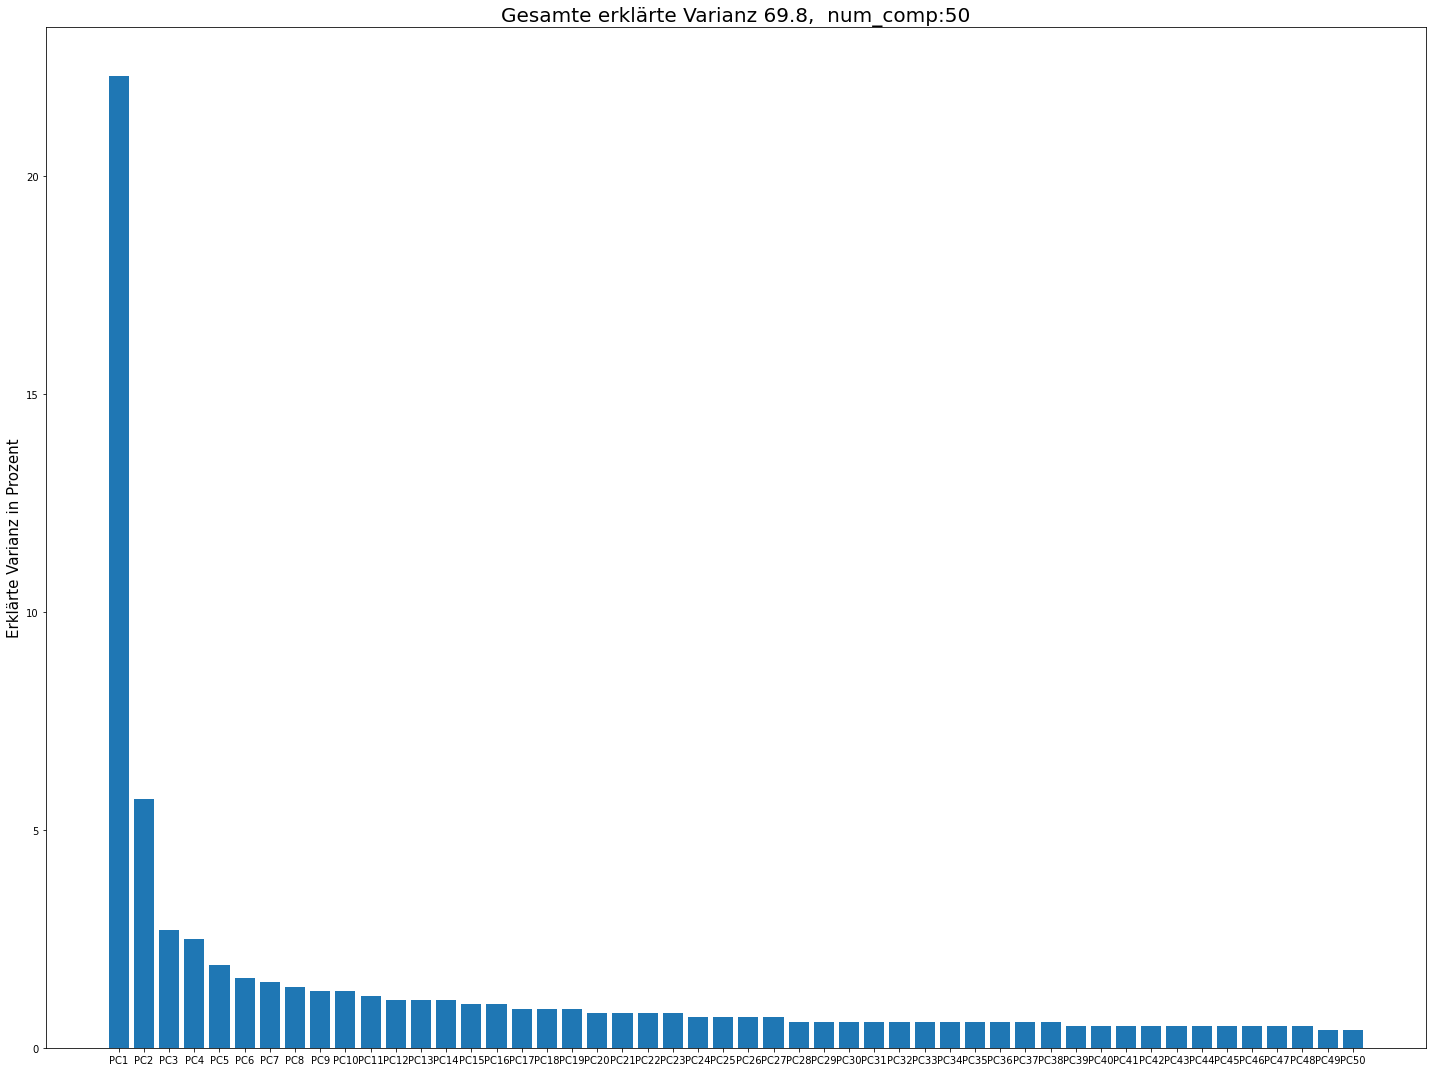

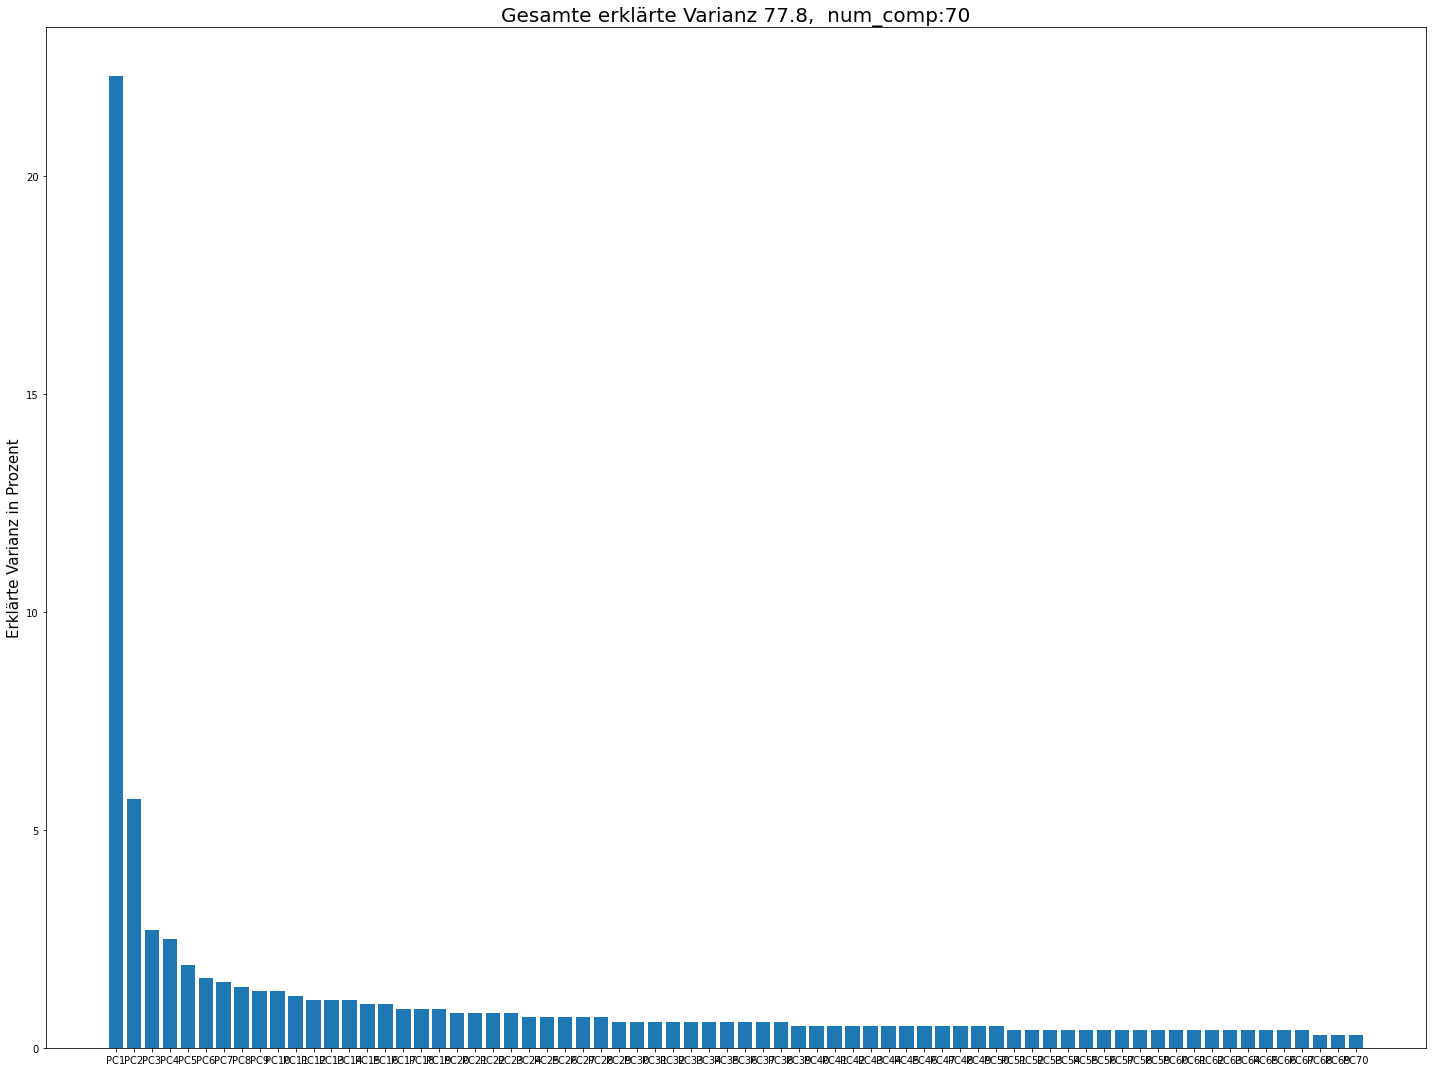

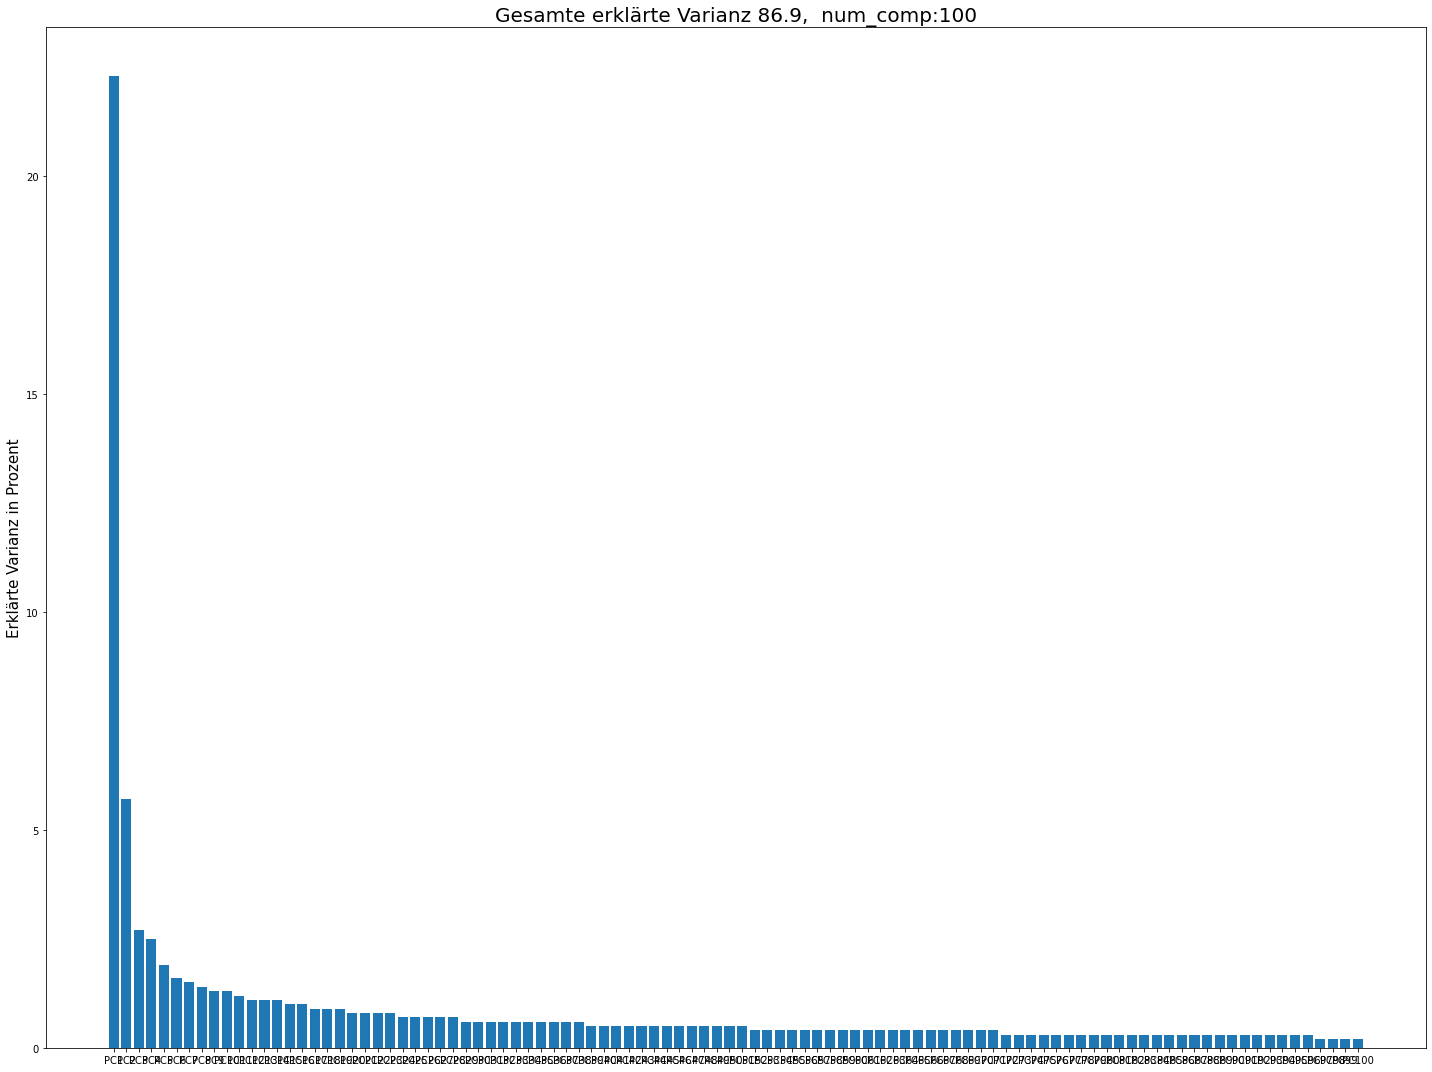

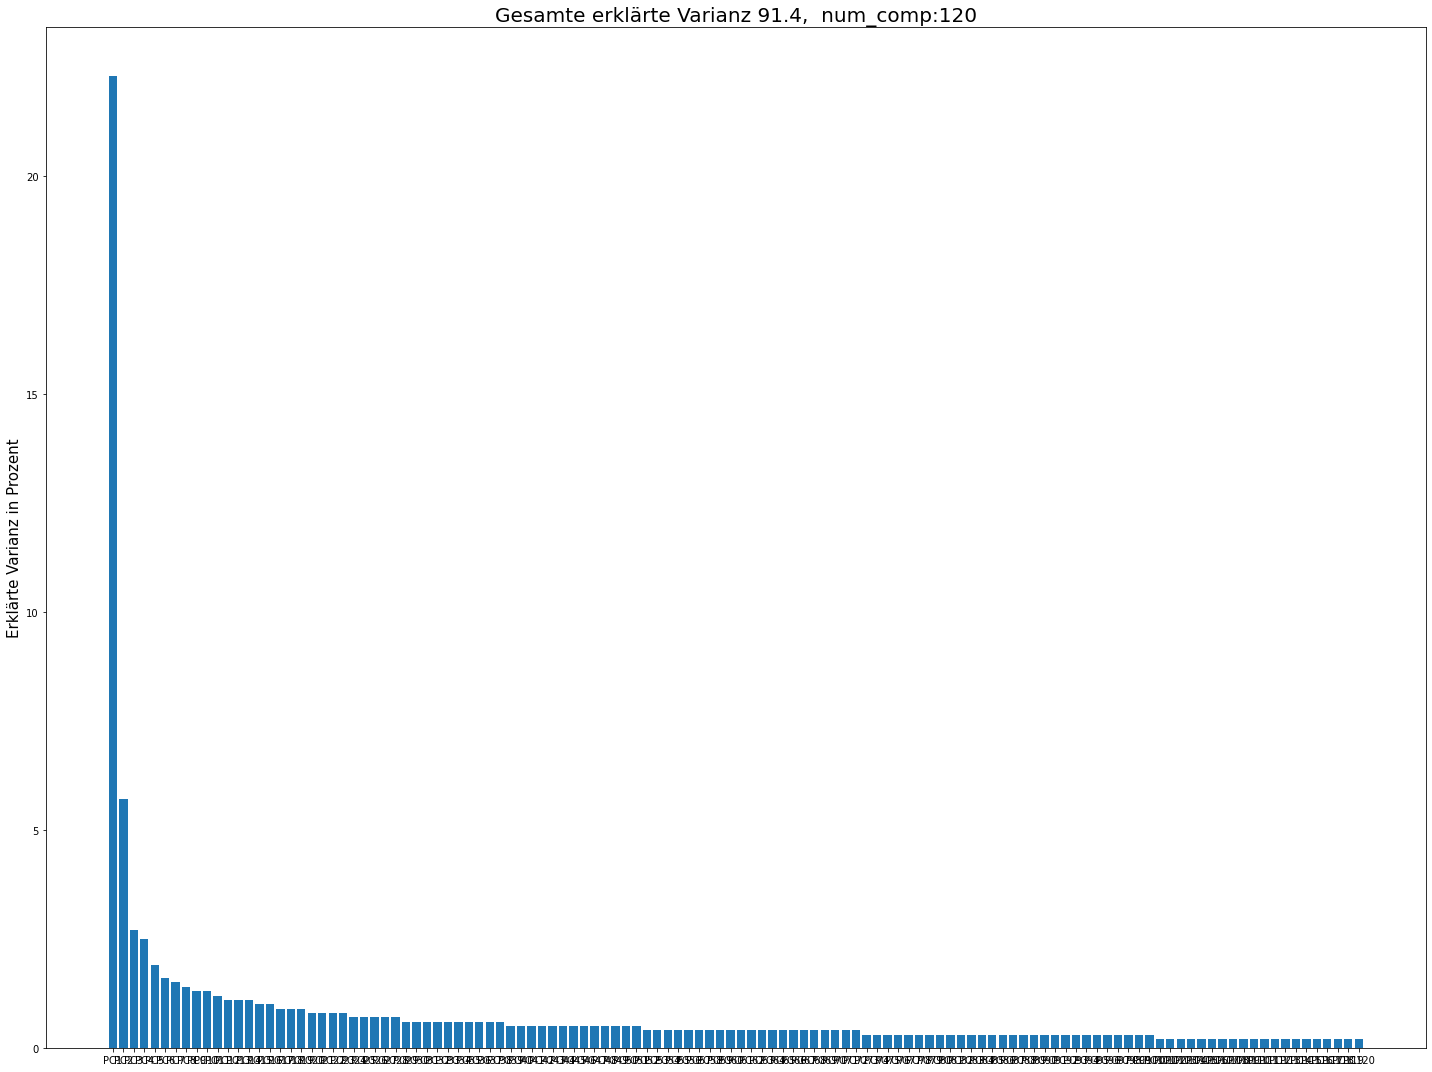

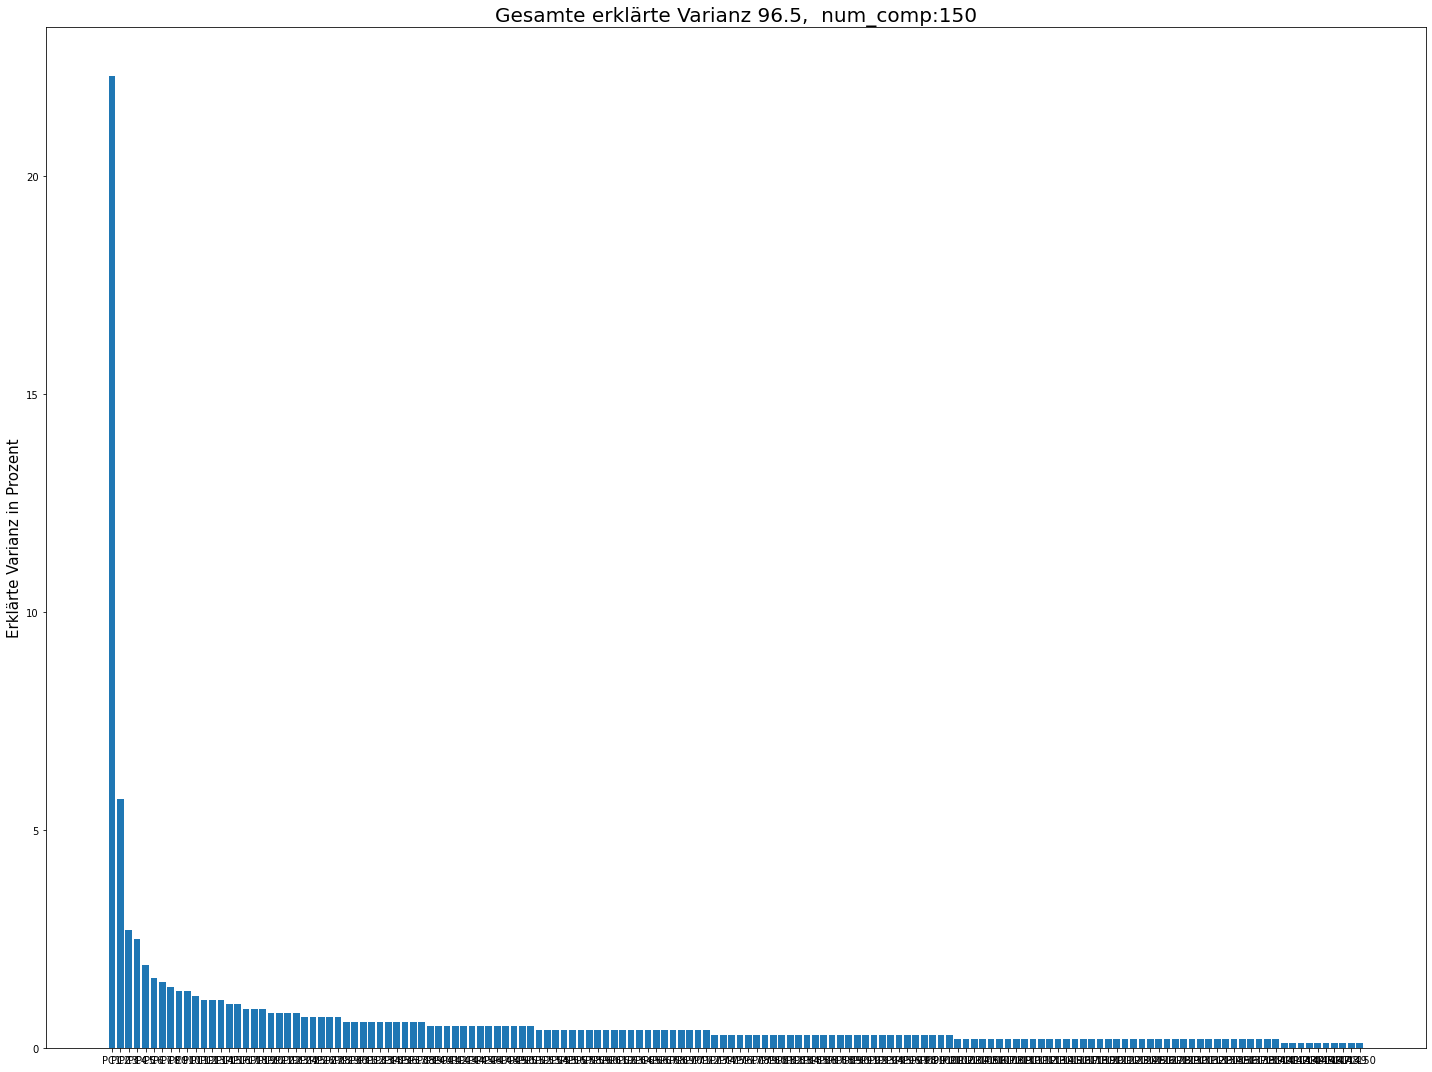

In [203]:
n_comp = [50, 70, 100, 120, 150]

check_PCA(n_comp, Xx_train_oversampled)

The performance of PCA in cleaned dataset decreased! But I will choose n_components = 100 again.

In [204]:
pca = PCA(n_components=100)

pca.fit(Xx_train_oversampled)

Xx_train_pca = pca.transform(Xx_train_oversampled)
Xx_test_pca = pca.transform(Xx_test)

Xx_train_pca = pd.DataFrame(Xx_train_pca)
Xx_test_pca = pd.DataFrame(Xx_test_pca)

In [205]:
Xx_train_pca

0         1         2         3         4         5         6  \
0     3.858117  1.865065  0.031223 -0.452497  3.691382 -2.821355  1.213306   
1     5.327431 -1.904079 -2.528632  0.329676  0.791834 -2.258370 -1.408586   
2     4.918267  0.490385 -2.780562  1.069115 -3.459997 -1.861057 -0.870019   
3     6.800969  1.525294 -1.787192  0.494178 -0.636235 -0.315674  0.114836   
4     5.005761  1.172540 -1.034348 -0.540466 -1.250794  1.246329  0.988650   
...        ...       ...       ...       ...       ...       ...       ...   
2041 -5.863765 -3.219994 -2.715001 -0.447957  0.184247  0.601681  1.866385   
2042 -7.471757 -3.032773  1.477952 -2.203382 -0.049094  0.314458 -0.892664   
2043 -8.290459 -4.807108 -0.742422 -1.565888  7.675196 -2.596653  5.410732   
2044 -6.304369 -0.418945  1.383664 -1.267564  0.055076  0.268722 -0.025042   
2045 -6.637364 -3.233891 -3.284922 -0.594448  0.991982  0.347190  0.558660   

             7         8         9  
0    -0.269019 -0.690640 -2.731989  
1     0.402602 -0.264738  0.755681  
2     2.226024 -0.993464 -0.145461  
3    -1.064142 -1.408331 -0.961964  
4     0.873774  0.163569  0.919341  
...        ...       ...       ...  
2041 -3.641548  0.756137  0.610399  
2042  2.046784 -0.128345  0.125866  
2043 -1.072186 -4.843016  1.904510  
2044  0.673058 -0.069770 -0.455301  
2045 -2.222314  1.976904  2.630233  

[2046 rows x 10 columns]

### Modeling

**Decision Tree**

In [206]:
dt = DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=90, random_state=42)

Average Balanced Accuracy of model for "train data":-- 92.8%
Balaned Accuracy of model for "test data":----------- 49.8%
True Positive Rate of model for test data:----------- 0.0%
False Positive Rate of model for test data:---------- 0.5%
Accuracy (Overal performance) of model:-------------- 93.0%


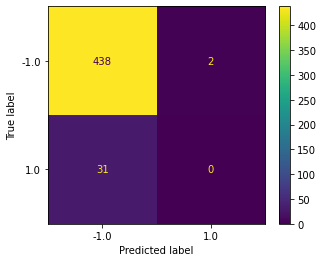

In [207]:
show_mertics(dt, Xx_train_rfc, yy_train_oversampled, Xx_test_rfc, yy_test)

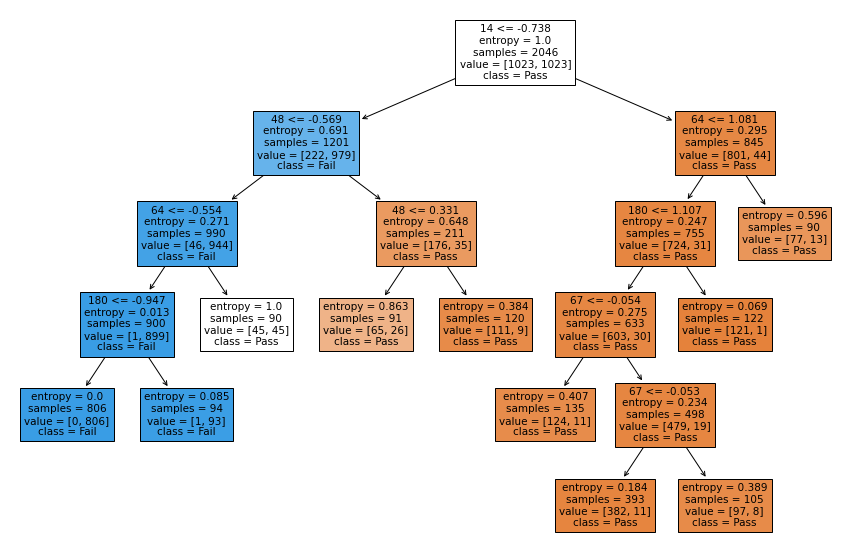

In [208]:
fig, ax = plt.subplots(figsize=(15, 10))
plot_tree(dt, filled = True, class_names=["Pass", "Fail"], feature_names=Xx_train_rfc.columns, ax = ax);

Average Balanced Accuracy of model for "train data":-- 96.4%
Balaned Accuracy of model for "test data":----------- 50.0%
True Positive Rate of model for test data:----------- 0.0%
False Positive Rate of model for test data:---------- 0.0%
Accuracy (Overal performance) of model:-------------- 93.4%


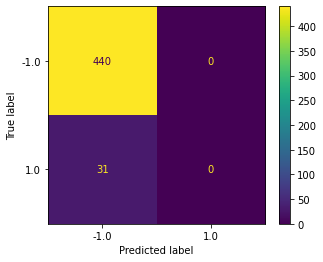

In [209]:
show_mertics(dt, Xx_train_pca, yy_train_oversampled, Xx_test_pca, yy_test)

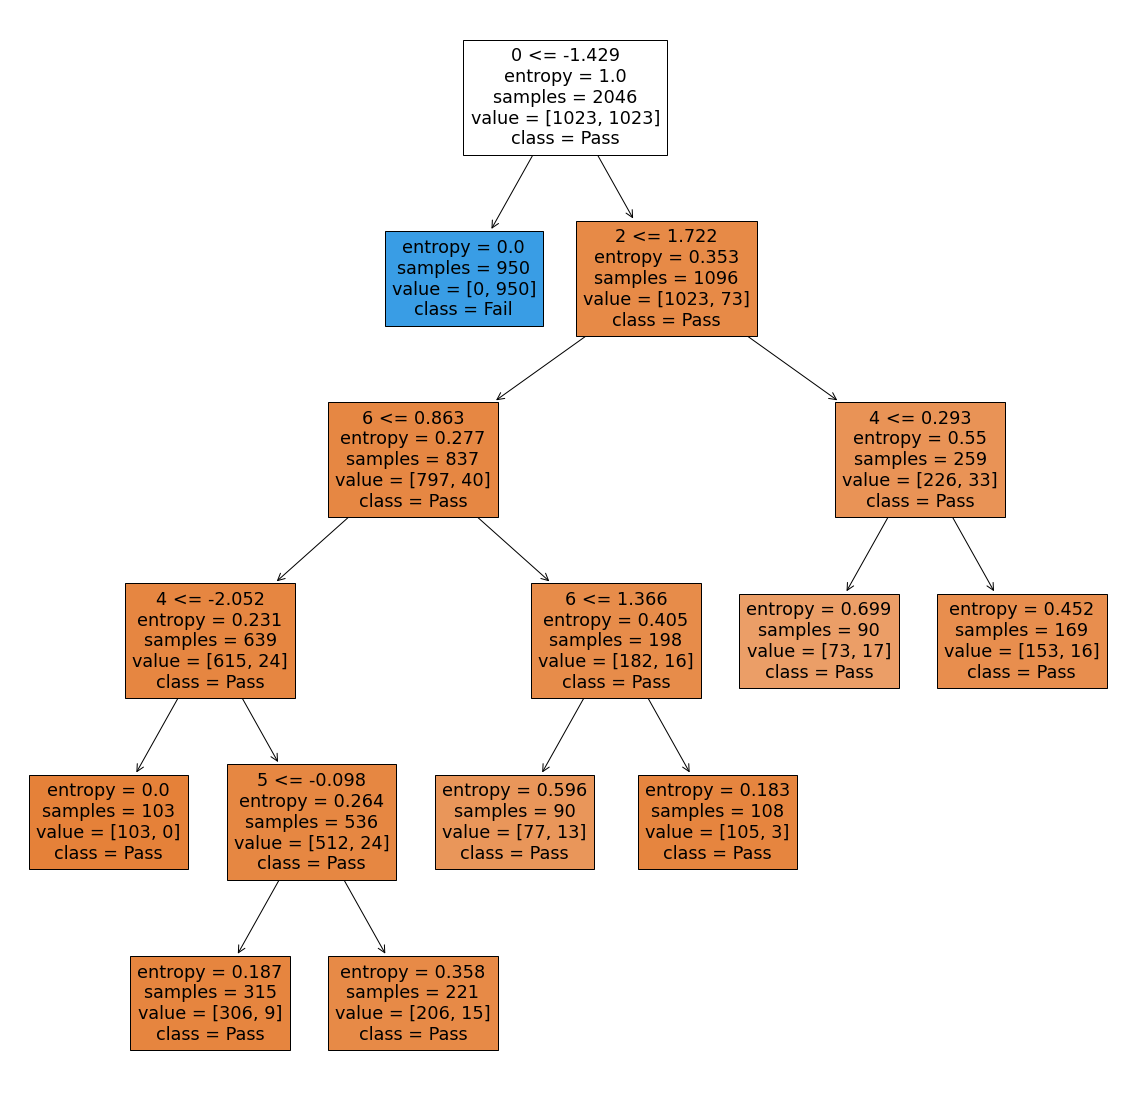

In [210]:
fig, ax = plt.subplots(figsize=(20, 20))
plot_tree(dt, filled = True, class_names=["Pass", "Fail"], feature_names=Xx_train_pca.columns, ax = ax);

**SVM**

In [211]:
svc = SVC(random_state=42, probability=True)

Average Balanced Accuracy of model for "train data":-- 96.0%
Balaned Accuracy of model for "test data":----------- 51.0%
True Positive Rate of model for test data:----------- 3.2%
False Positive Rate of model for test data:---------- 1.1%
Accuracy (Overal performance) of model:-------------- 92.6%


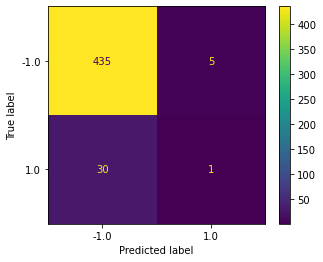

In [212]:
show_mertics(svc, Xx_train_rfc, yy_train_oversampled, Xx_test_rfc, yy_test)

Average Balanced Accuracy of model for "train data":-- 96.4%
Balaned Accuracy of model for "test data":----------- 50.0%
True Positive Rate of model for test data:----------- 0.0%
False Positive Rate of model for test data:---------- 0.0%
Accuracy (Overal performance) of model:-------------- 93.4%


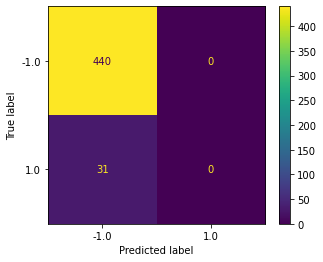

In [213]:
show_mertics(svc, Xx_train_pca, yy_train_oversampled, Xx_test_pca, yy_test)

**KNN**

In [214]:
knn = KNeighborsClassifier(n_neighbors=50)


Average Balanced Accuracy of model for "train data":-- 95.3%
Balaned Accuracy of model for "test data":----------- 53.7%
True Positive Rate of model for test data:----------- 9.7%
False Positive Rate of model for test data:---------- 2.3%
Accuracy (Overal performance) of model:-------------- 91.9%


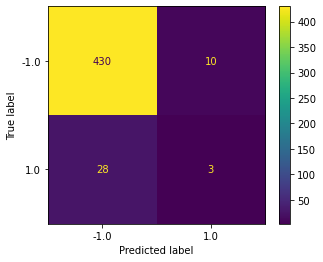

In [215]:
show_mertics(knn, Xx_train_rfc, yy_train_oversampled, Xx_test_rfc, yy_test)

Average Balanced Accuracy of model for "train data":-- 96.4%
Balaned Accuracy of model for "test data":----------- 50.0%
True Positive Rate of model for test data:----------- 0.0%
False Positive Rate of model for test data:---------- 0.0%
Accuracy (Overal performance) of model:-------------- 93.4%


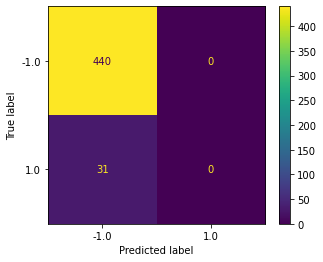

In [216]:
show_mertics(svc, Xx_train_pca, yy_train_oversampled, Xx_test_pca, yy_test)

**Logistic Regression**

In [217]:
lr = LogisticRegression(max_iter=400, random_state=42)

Average Balanced Accuracy of model for "train data":-- 94.0%
Balaned Accuracy of model for "test data":----------- 51.0%
True Positive Rate of model for test data:----------- 6.5%
False Positive Rate of model for test data:---------- 4.5%
Accuracy (Overal performance) of model:-------------- 89.6%


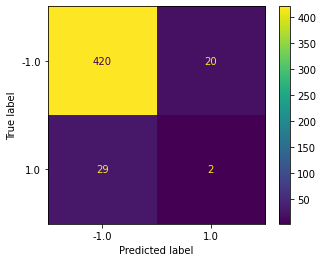

In [218]:
show_mertics(lr, Xx_train_rfc, yy_train_oversampled, Xx_test_rfc, yy_test)

Average Balanced Accuracy of model for "train data":-- 96.4%
Balaned Accuracy of model for "test data":----------- 50.0%
True Positive Rate of model for test data:----------- 0.0%
False Positive Rate of model for test data:---------- 0.0%
Accuracy (Overal performance) of model:-------------- 93.4%


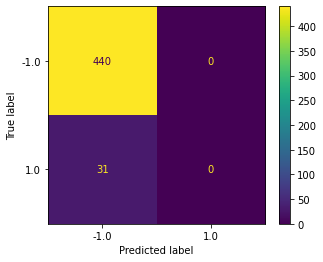

In [219]:
show_mertics(lr, Xx_train_pca, yy_train_oversampled, Xx_test_pca, yy_test)

**Naive Bayes**

In [220]:
gb = GaussianNB()

Average Balanced Accuracy of model for "train data":-- 94.8%
Balaned Accuracy of model for "test data":----------- 51.9%
True Positive Rate of model for test data:----------- 6.5%
False Positive Rate of model for test data:---------- 2.7%
Accuracy (Overal performance) of model:-------------- 91.3%


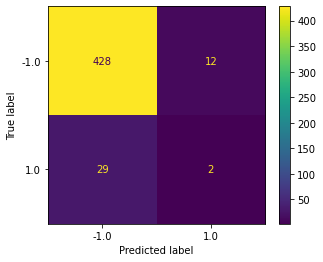

In [221]:
show_mertics(gb, Xx_train_rfc, yy_train_oversampled, Xx_test_rfc, yy_test)

Average Balanced Accuracy of model for "train data":-- 95.8%
Balaned Accuracy of model for "test data":----------- 49.8%
True Positive Rate of model for test data:----------- 0.0%
False Positive Rate of model for test data:---------- 0.5%
Accuracy (Overal performance) of model:-------------- 93.0%


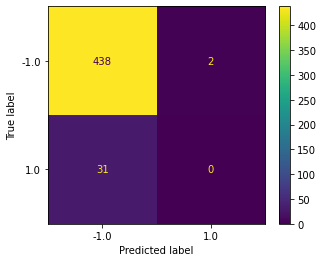

In [222]:
show_mertics(gb, Xx_train_pca, yy_train_oversampled, Xx_test_pca, yy_test)

**Random Forest**

In [223]:
rf = RandomForestClassifier(n_estimators=50, max_depth=3, min_samples_leaf=50, random_state=42)

Average Balanced Accuracy of model for "train data":-- 96.0%
Balaned Accuracy of model for "test data":----------- 49.3%
True Positive Rate of model for test data:----------- 0.0%
False Positive Rate of model for test data:---------- 1.4%
Accuracy (Overal performance) of model:-------------- 92.1%


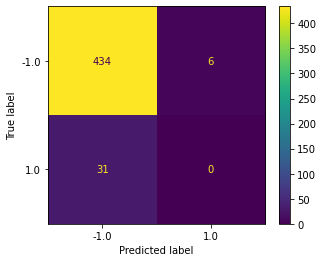

In [224]:
show_mertics(rf, Xx_train_rfc, yy_train_oversampled, Xx_test_rfc, yy_test)

Average Balanced Accuracy of model for "train data":-- 96.4%
Balaned Accuracy of model for "test data":----------- 50.0%
True Positive Rate of model for test data:----------- 0.0%
False Positive Rate of model for test data:---------- 0.0%
Accuracy (Overal performance) of model:-------------- 93.4%


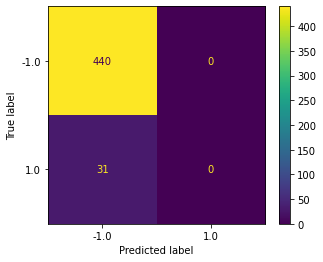

In [225]:
show_mertics(rf, Xx_train_pca, yy_train_oversampled, Xx_test_pca, yy_test)

**Gradient Boosting**

In [226]:
gbc = GradientBoostingClassifier(learning_rate=0.01, n_estimators=10, random_state=42)


Average Balanced Accuracy of model for "train data":-- 95.1%
Balaned Accuracy of model for "test data":----------- 53.8%
True Positive Rate of model for test data:----------- 9.7%
False Positive Rate of model for test data:---------- 2.0%
Accuracy (Overal performance) of model:-------------- 92.1%


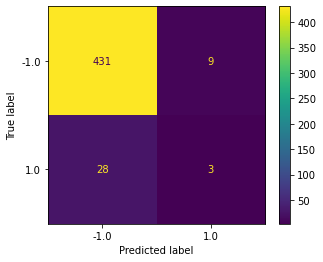

In [227]:
show_mertics(gbc, Xx_train_rfc, yy_train_oversampled, Xx_test_rfc, yy_test)

Average Balanced Accuracy of model for "train data":-- 96.4%
Balaned Accuracy of model for "test data":----------- 50.0%
True Positive Rate of model for test data:----------- 0.0%
False Positive Rate of model for test data:---------- 0.0%
Accuracy (Overal performance) of model:-------------- 93.4%


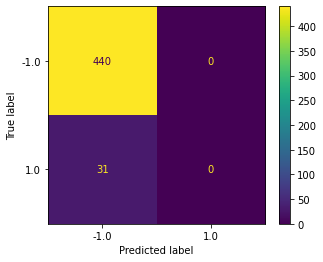

In [228]:
show_mertics(rf, Xx_train_pca, yy_train_oversampled, Xx_test_pca, yy_test)

### Hyperparameter Optimization
In this section I tried to Optimizing the Hyperparameters of models using **GrideSearchCV** and then I have tested again each model with top 2 Optimized Pramaters.

**Decision Tree**

In [251]:
params = {'criterion':['entropy', 'gini'],
          'max_depth':[2, 3, 4, 5],
          'min_samples_leaf':[1, 2, 3, 5, 10] 
         }


In [253]:
dt = DecisionTreeClassifier(random_state=42)


In [254]:
dt_gSearcher = GridSearchCV(dt, params, scoring='recall',cv=10)

dt_gSearcher.fit(Xx_train_rfc, yy_train_oversampled);

In [255]:
opt_hyParam = pd.DataFrame(dt_gSearcher.cv_results_).sort_values('mean_test_score', ascending=False)[['params', 'mean_test_score', 'rank_test_score']].head()

opt_hyParam

params  mean_test_score  \
39  {'criterion': 'gini', 'max_depth': 5, 'min_sam...         0.935294   
34  {'criterion': 'gini', 'max_depth': 4, 'min_sam...         0.935294   
31  {'criterion': 'gini', 'max_depth': 4, 'min_sam...         0.933333   
32  {'criterion': 'gini', 'max_depth': 4, 'min_sam...         0.933333   
33  {'criterion': 'gini', 'max_depth': 4, 'min_sam...         0.933333   

    rank_test_score  
39                1  
34                1  
31                3  
32                3  
33                3

In [231]:
# the best parameters:
opt_hyParam.iloc[0,0]

{'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 10}

Average Balanced Accuracy of model for "train data":-- 95.6%
Balaned Accuracy of model for "test data":----------- 52.5%
True Positive Rate of model for test data:----------- 6.5%
False Positive Rate of model for test data:---------- 1.4%
Accuracy (Overal performance) of model:-------------- 92.6%


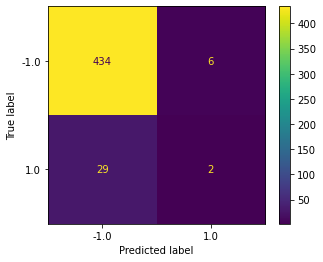

In [256]:
dt1 = DecisionTreeClassifier(criterion='gini', max_depth=5, min_samples_leaf=10, random_state=42)

show_mertics(dt1, Xx_train_rfc, yy_train_oversampled, Xx_test_rfc, yy_test)

In [257]:
opt_hyParam.iloc[1,0]

{'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 10}

Average Balanced Accuracy of model for "train data":-- 95.7%
Balaned Accuracy of model for "test data":----------- 52.5%
True Positive Rate of model for test data:----------- 6.5%
False Positive Rate of model for test data:---------- 1.4%
Accuracy (Overal performance) of model:-------------- 92.6%


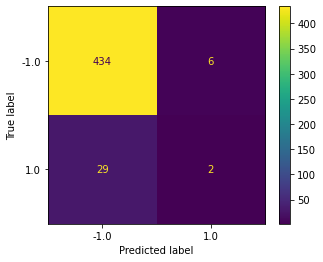

In [258]:
dt2 = DecisionTreeClassifier(criterion='gini', max_depth=4, min_samples_leaf=10, random_state=42)

show_mertics(dt2, Xx_train_rfc, yy_train_oversampled, Xx_test_rfc, yy_test)

In [259]:
dt_gSearcher.fit(Xx_train_pca, yy_train_oversampled);

In [260]:
opt_hyParam = pd.DataFrame(dt_gSearcher.cv_results_).sort_values('mean_test_score', ascending=False)[['params', 'mean_test_score', 'rank_test_score']].head()

opt_hyParam

params  mean_test_score  \
0   {'criterion': 'entropy', 'max_depth': 2, 'min_...         0.928431   
1   {'criterion': 'entropy', 'max_depth': 2, 'min_...         0.928431   
22  {'criterion': 'gini', 'max_depth': 2, 'min_sam...         0.928431   
23  {'criterion': 'gini', 'max_depth': 2, 'min_sam...         0.928431   
24  {'criterion': 'gini', 'max_depth': 2, 'min_sam...         0.928431   

    rank_test_score  
0                 1  
1                 1  
22                1  
23                1  
24                1

In [261]:
opt_hyParam.iloc[0,0]

{'criterion': 'entropy', 'max_depth': 2, 'min_samples_leaf': 1}

Average Balanced Accuracy of model for "train data":-- 96.4%
Balaned Accuracy of model for "test data":----------- 50.0%
True Positive Rate of model for test data:----------- 0.0%
False Positive Rate of model for test data:---------- 0.0%
Accuracy (Overal performance) of model:-------------- 93.4%


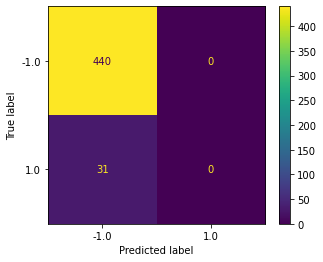

In [262]:
dt3 = DecisionTreeClassifier(criterion='entropy', max_depth=2, min_samples_leaf=1, random_state=42)

show_mertics(dt3, Xx_train_pca, yy_train_oversampled, Xx_test_pca, yy_test)

In [263]:
# pd.DataFrame(dt_gSearcher.cv_results_)

In [264]:
opt_hyParam.iloc[1,0]

{'criterion': 'entropy', 'max_depth': 2, 'min_samples_leaf': 2}

Average Balanced Accuracy of model for "train data":-- 96.4%
Balaned Accuracy of model for "test data":----------- 50.0%
True Positive Rate of model for test data:----------- 0.0%
False Positive Rate of model for test data:---------- 0.0%
Accuracy (Overal performance) of model:-------------- 93.4%


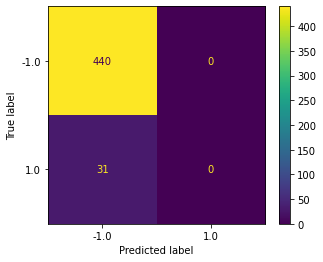

In [265]:
dt4 = DecisionTreeClassifier(criterion='entropy', max_depth=2, min_samples_leaf=2, random_state=42)

show_mertics(dt4, Xx_train_pca, yy_train_oversampled, Xx_test_pca, yy_test)

### SVM

In [242]:
params = {
          'C': [0.001, 0.01, 0.1, 1, 10],    
#           'C':[0.00001, 0.0001, 0.001, 0.01, 0.1],
          'kernel':['linear', 'rbf'],
#           'gamma': [0.001, 0.01, 0.1, 1],    
          'gamma': [1, 50, 100, 150]
         }

In [243]:
svc_gSearcher = GridSearchCV(svc, params, cv=10, scoring='recall',n_jobs=-1)

svc_gSearcher.fit(Xx_train_rfc, yy_train_oversampled);

In [244]:
opt_hyParam = pd.DataFrame(svc_gSearcher.cv_results_).sort_values('mean_test_score', ascending=False)[['params', 'mean_test_score', 'rank_test_score']].head()
opt_hyParam

params  mean_test_score  \
0     {'C': 0.001, 'gamma': 1, 'kernel': 'linear'}         0.935294   
2    {'C': 0.001, 'gamma': 50, 'kernel': 'linear'}         0.935294   
4   {'C': 0.001, 'gamma': 100, 'kernel': 'linear'}         0.935294   
6   {'C': 0.001, 'gamma': 150, 'kernel': 'linear'}         0.935294   
12   {'C': 0.01, 'gamma': 100, 'kernel': 'linear'}         0.934314   

    rank_test_score  
0                 1  
2                 1  
4                 1  
6                 1  
12                5

Average Balanced Accuracy of model for "train data":-- 94.4%
Balaned Accuracy of model for "test data":----------- 51.4%
True Positive Rate of model for test data:----------- 6.5%
False Positive Rate of model for test data:---------- 3.6%
Accuracy (Overal performance) of model:-------------- 90.4%


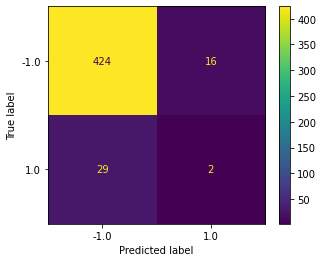

In [266]:
svc1 = SVC(C=.001, gamma=1, kernel='linear', random_state=42, probability=True)

show_mertics(svc1, Xx_train_rfc, yy_train_oversampled, Xx_test_rfc, yy_test)

Average Balanced Accuracy of model for "train data":-- 94.4%
Balaned Accuracy of model for "test data":----------- 51.4%
True Positive Rate of model for test data:----------- 6.5%
False Positive Rate of model for test data:---------- 3.6%
Accuracy (Overal performance) of model:-------------- 90.4%


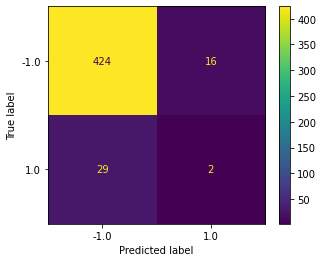

In [267]:
svc2 = SVC(C=0.001, gamma=50, kernel='linear', random_state=42, probability=True)

show_mertics(svc2, Xx_train_rfc, yy_train_oversampled, Xx_test_rfc, yy_test)

In [247]:
svc_gSearcher.fit(Xx_train_pca, yy_train_oversampled);

In [248]:
opt_hyParam = pd.DataFrame(svc_gSearcher.cv_results_).sort_values('mean_test_score', ascending=False)[['params', 'mean_test_score', 'rank_test_score']].head()
opt_hyParam

params  mean_test_score  \
0   {'C': 0.001, 'gamma': 1, 'kernel': 'linear'}         0.928431   
18   {'C': 0.1, 'gamma': 50, 'kernel': 'linear'}         0.928431   
24      {'C': 1, 'gamma': 1, 'kernel': 'linear'}         0.928431   
25         {'C': 1, 'gamma': 1, 'kernel': 'rbf'}         0.928431   
26     {'C': 1, 'gamma': 50, 'kernel': 'linear'}         0.928431   

    rank_test_score  
0                 1  
18                1  
24                1  
25                1  
26                1

Average Balanced Accuracy of model for "train data":-- 96.4%
Balaned Accuracy of model for "test data":----------- 50.0%
True Positive Rate of model for test data:----------- 0.0%
False Positive Rate of model for test data:---------- 0.0%
Accuracy (Overal performance) of model:-------------- 93.4%


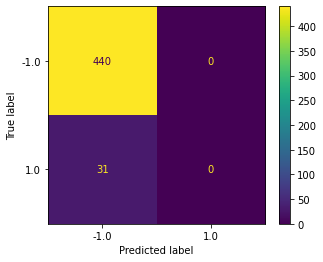

In [268]:
svc3 = SVC(C=0.001, gamma=1, kernel='linear', random_state=42, probability=True)

show_mertics(svc3, Xx_train_pca, yy_train_oversampled, Xx_test_pca, yy_test)

Average Balanced Accuracy of model for "train data":-- 96.4%
Balaned Accuracy of model for "test data":----------- 50.0%
True Positive Rate of model for test data:----------- 0.0%
False Positive Rate of model for test data:---------- 0.0%
Accuracy (Overal performance) of model:-------------- 93.4%


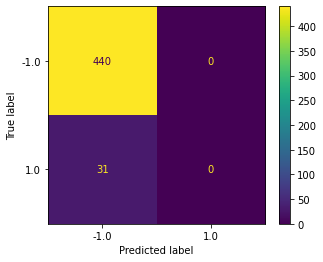

In [269]:
svc4 = SVC(C=0.1, gamma=50, kernel='linear', random_state=42, probability=True)

show_mertics(svc4, Xx_train_pca, yy_train_oversampled, Xx_test_pca, yy_test)

**KNN**

In [270]:
params = {'n_neighbors':[1, 2, 3, 4, 5, 7, 10]}
# params = {'n_neighbors':[15, 20, 25, 30, 40, 50]}

knn_gSearcher = GridSearchCV(knn,params, scoring='recall',cv=10)
knn_gSearcher.fit(Xx_train_rfc, yy_train_oversampled);

In [271]:
opt_hyParam = pd.DataFrame(knn_gSearcher.cv_results_).sort_values('mean_test_score', ascending=False)[['params', 'mean_test_score', 'rank_test_score']].head()
opt_hyParam

params  mean_test_score  rank_test_score
6  {'n_neighbors': 10}         0.933333                1
4   {'n_neighbors': 5}         0.931373                2
5   {'n_neighbors': 7}         0.931373                2
0   {'n_neighbors': 1}         0.930392                4
1   {'n_neighbors': 2}         0.930392                4

Average Balanced Accuracy of model for "train data":-- 95.7%
Balaned Accuracy of model for "test data":----------- 51.0%
True Positive Rate of model for test data:----------- 3.2%
False Positive Rate of model for test data:---------- 1.1%
Accuracy (Overal performance) of model:-------------- 92.6%


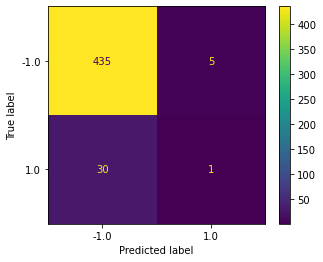

In [272]:
knn1 = KNeighborsClassifier(n_neighbors=10)

show_mertics(knn1, Xx_train_rfc, yy_train_oversampled, Xx_test_rfc, yy_test)

Average Balanced Accuracy of model for "train data":-- 95.6%
Balaned Accuracy of model for "test data":----------- 51.2%
True Positive Rate of model for test data:----------- 3.2%
False Positive Rate of model for test data:---------- 0.9%
Accuracy (Overal performance) of model:-------------- 92.8%


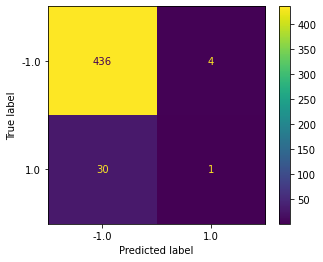

In [274]:
knn2 = KNeighborsClassifier(n_neighbors=7)

show_mertics(knn2, Xx_train_rfc, yy_train_oversampled, Xx_test_rfc, yy_test)

In [275]:
knn_gSearcher.fit(Xx_train_pca, yy_train_oversampled);

In [276]:
opt_hyParam = pd.DataFrame(knn_gSearcher.cv_results_).sort_values('mean_test_score', ascending=False)[['params', 'mean_test_score', 'rank_test_score']].head()
opt_hyParam

params  mean_test_score  rank_test_score
5   {'n_neighbors': 7}         0.929412                1
6  {'n_neighbors': 10}         0.929412                1
0   {'n_neighbors': 1}         0.928431                3
1   {'n_neighbors': 2}         0.928431                3
2   {'n_neighbors': 3}         0.928431                3

Average Balanced Accuracy of model for "train data":-- 96.4%
Balaned Accuracy of model for "test data":----------- 50.0%
True Positive Rate of model for test data:----------- 0.0%
False Positive Rate of model for test data:---------- 0.0%
Accuracy (Overal performance) of model:-------------- 93.4%


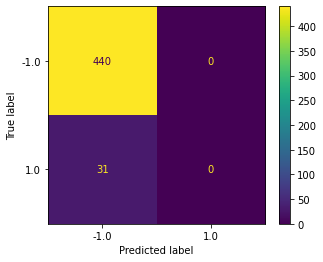

In [277]:
knn3 = KNeighborsClassifier(n_neighbors=7)
show_mertics(knn3, Xx_train_pca, yy_train_oversampled, Xx_test_pca, yy_test)

Average Balanced Accuracy of model for "train data":-- 96.4%
Balaned Accuracy of model for "test data":----------- 50.0%
True Positive Rate of model for test data:----------- 0.0%
False Positive Rate of model for test data:---------- 0.0%
Accuracy (Overal performance) of model:-------------- 93.4%


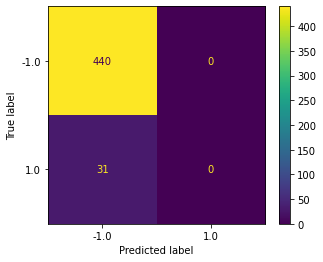

In [278]:
knn4 = KNeighborsClassifier(n_neighbors=10)
show_mertics(knn4, Xx_train_pca, yy_train_oversampled, Xx_test_pca, yy_test)

**Logistic Regression**

In [279]:
params = {'C':[0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1]}

In [280]:
lr_gSearcher = GridSearchCV(lr, params, scoring='recall',cv=10, n_jobs=-1)
lr_gSearcher.fit(Xx_train_rfc, yy_train_oversampled);


In [281]:
pd.DataFrame(lr_gSearcher.cv_results_).sort_values('mean_test_score', ascending=False)[['params', 'mean_test_score', 'rank_test_score']].head()

params  mean_test_score  rank_test_score
0  {'C': 0.001}         0.936275                1
1  {'C': 0.005}         0.933333                2
2   {'C': 0.01}         0.933333                2
3   {'C': 0.05}         0.933333                2
4    {'C': 0.1}         0.932353                5

Average Balanced Accuracy of model for "train data":-- 94.2%
Balaned Accuracy of model for "test data":----------- 52.8%
True Positive Rate of model for test data:----------- 9.7%
False Positive Rate of model for test data:---------- 4.1%
Accuracy (Overal performance) of model:-------------- 90.2%


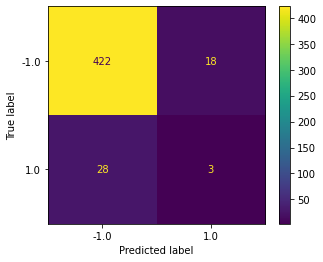

In [282]:
lr1 = LogisticRegression(C=0.001, max_iter=400, random_state=42)

show_mertics(lr1, Xx_train_rfc, yy_train_oversampled, Xx_test_rfc, yy_test)

Average Balanced Accuracy of model for "train data":-- 94.1%
Balaned Accuracy of model for "test data":----------- 52.7%
True Positive Rate of model for test data:----------- 9.7%
False Positive Rate of model for test data:---------- 4.3%
Accuracy (Overal performance) of model:-------------- 90.0%


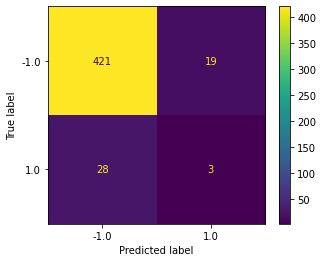

In [283]:
lr2 = LogisticRegression(C=0.005, max_iter=400, random_state=42)

show_mertics(lr2, Xx_train_rfc, yy_train_oversampled, Xx_test_rfc, yy_test)

In [284]:
lr_gSearcher.fit(Xx_train_pca, yy_train_oversampled);


In [285]:
pd.DataFrame(lr_gSearcher.cv_results_).sort_values('mean_test_score', ascending=False)[['params', 'mean_test_score', 'rank_test_score']].head()

params  mean_test_score  rank_test_score
0  {'C': 0.001}         0.928431                1
1  {'C': 0.005}         0.928431                1
2   {'C': 0.01}         0.928431                1
3   {'C': 0.05}         0.928431                1
4    {'C': 0.1}         0.928431                1

Average Balanced Accuracy of model for "train data":-- 96.4%
Balaned Accuracy of model for "test data":----------- 50.0%
True Positive Rate of model for test data:----------- 0.0%
False Positive Rate of model for test data:---------- 0.0%
Accuracy (Overal performance) of model:-------------- 93.4%


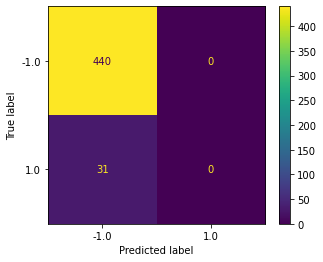

In [286]:
lr3 = LogisticRegression(C=0.001, max_iter=400, random_state=42)

show_mertics(lr3, Xx_train_pca, yy_train_oversampled, Xx_test_pca, yy_test)

Average Balanced Accuracy of model for "train data":-- 96.4%
Balaned Accuracy of model for "test data":----------- 50.0%
True Positive Rate of model for test data:----------- 0.0%
False Positive Rate of model for test data:---------- 0.0%
Accuracy (Overal performance) of model:-------------- 93.4%


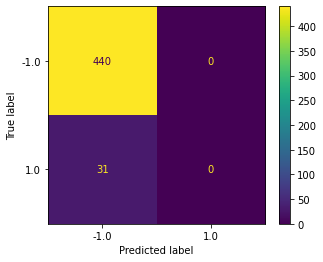

In [287]:
lr4 = LogisticRegression(C=0.005, max_iter=400, random_state=42)

show_mertics(lr4, Xx_train_pca, yy_train_oversampled, Xx_test_pca, yy_test)

**Gradient Boosting**

In [288]:
gbc = GradientBoostingClassifier(random_state=42)

params = {
          'learning_rate': [0.001, 0.01, 0.1, 0.99],    
          'n_estimators': [5, 10, 50, 100]    
         }

In [289]:
gbc_gSearcher = GridSearchCV(gbc, params, scoring='recall', cv=10, n_jobs=-1)

gbc_gSearcher.fit(Xx_train_rfc, yy_train_oversampled);


In [290]:
pd.DataFrame(gbc_gSearcher.cv_results_).sort_values('mean_test_score', ascending=False)[['params', 'mean_test_score', 'rank_test_score']].head()

params  mean_test_score  \
13   {'learning_rate': 0.99, 'n_estimators': 10}         0.931373   
12    {'learning_rate': 0.99, 'n_estimators': 5}         0.930392   
14   {'learning_rate': 0.99, 'n_estimators': 50}         0.930392   
15  {'learning_rate': 0.99, 'n_estimators': 100}         0.930392   
6    {'learning_rate': 0.01, 'n_estimators': 50}         0.929412   

    rank_test_score  
13                1  
12                2  
14                2  
15                2  
6                 5

Average Balanced Accuracy of model for "train data":-- 94.3%
Balaned Accuracy of model for "test data":----------- 53.0%
True Positive Rate of model for test data:----------- 9.7%
False Positive Rate of model for test data:---------- 3.6%
Accuracy (Overal performance) of model:-------------- 90.7%


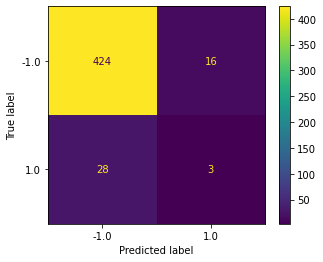

In [291]:
gbc1 = GradientBoostingClassifier(learning_rate=0.99, n_estimators=10, random_state=42)

show_mertics(gbc1, Xx_train_rfc, yy_train_oversampled, Xx_test_rfc, yy_test)

Average Balanced Accuracy of model for "train data":-- 94.4%
Balaned Accuracy of model for "test data":----------- 51.7%
True Positive Rate of model for test data:----------- 6.5%
False Positive Rate of model for test data:---------- 3.0%
Accuracy (Overal performance) of model:-------------- 91.1%


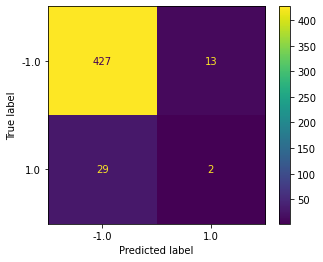

In [292]:
gbc2 = GradientBoostingClassifier(learning_rate=0.99, n_estimators=5, random_state=42)

show_mertics(gbc2, Xx_train_rfc, yy_train_oversampled, Xx_test_rfc, yy_test)

Average Balanced Accuracy of model for "train data":-- 94.2%
Balaned Accuracy of model for "test data":----------- 53.5%
True Positive Rate of model for test data:----------- 12.9%
False Positive Rate of model for test data:---------- 5.9%
Accuracy (Overal performance) of model:-------------- 88.7%


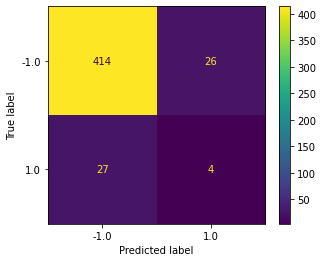

In [300]:
gbc3 = GradientBoostingClassifier(learning_rate=0.99, n_estimators=50, random_state=42)

show_mertics(gbc3, Xx_train_rfc, yy_train_oversampled, Xx_test_rfc, yy_test)

Average Balanced Accuracy of model for "train data":-- 94.6%
Balaned Accuracy of model for "test data":----------- 51.9%
True Positive Rate of model for test data:----------- 9.7%
False Positive Rate of model for test data:---------- 5.9%
Accuracy (Overal performance) of model:-------------- 88.5%


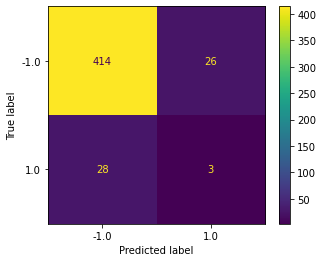

In [295]:
gbc4 = GradientBoostingClassifier(learning_rate=0.99, n_estimators=100, random_state=42)

show_mertics(gbc4, Xx_train_rfc, yy_train_oversampled, Xx_test_rfc, yy_test)

In [297]:
gbc_gSearcher.fit(Xx_train_pca, yy_train_oversampled);


In [298]:
pd.DataFrame(gbc_gSearcher.cv_results_).sort_values('mean_test_score', ascending=False)[['params', 'mean_test_score', 'rank_test_score']].head()

params  mean_test_score  \
0    {'learning_rate': 0.001, 'n_estimators': 5}         0.928431   
1   {'learning_rate': 0.001, 'n_estimators': 10}         0.928431   
2   {'learning_rate': 0.001, 'n_estimators': 50}         0.928431   
3  {'learning_rate': 0.001, 'n_estimators': 100}         0.928431   
4     {'learning_rate': 0.01, 'n_estimators': 5}         0.928431   

   rank_test_score  
0                1  
1                1  
2                1  
3                1  
4                1

Average Balanced Accuracy of model for "train data":-- 96.2%
Balaned Accuracy of model for "test data":----------- 50.0%
True Positive Rate of model for test data:----------- 0.0%
False Positive Rate of model for test data:---------- 0.0%
Accuracy (Overal performance) of model:-------------- 93.4%


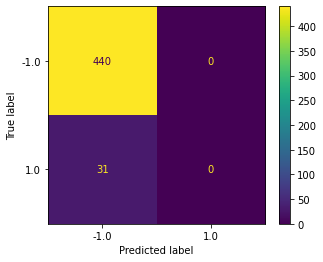

In [302]:
gbc5 = GradientBoostingClassifier(learning_rate=0.001, n_estimators=5, random_state=42)

show_mertics(gbc5, Xx_train_pca, yy_train_oversampled, Xx_test_pca, yy_test)

Average Balanced Accuracy of model for "train data":-- 96.1%
Balaned Accuracy of model for "test data":----------- 50.0%
True Positive Rate of model for test data:----------- 0.0%
False Positive Rate of model for test data:---------- 0.0%
Accuracy (Overal performance) of model:-------------- 93.4%


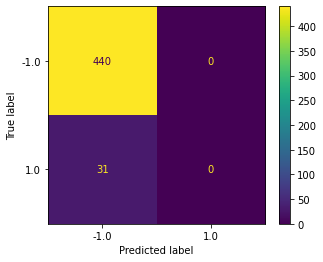

In [304]:
gbc6 = GradientBoostingClassifier(learning_rate=0.001, n_estimators=10, random_state=42)

show_mertics(gbc6, Xx_train_pca, yy_train_oversampled, Xx_test_pca, yy_test)

## Final Evaluation

I have trained different models with 2 Types of data first with data that I dropped the missing value and also with data that I replaced missing values with median, one time with data created by feature selection method and on time with data created by PCA method. <br>

***Data set with dropping missing values***
in this Iteration the performance of data that was created by **PCA** was better than data created by **RFC**:<br>

Regard to type of data, I think that the best metrics that show the performance of model are:<br>
1. Balanced accuracy
2. True positive Rate
3. False Positive Rate
4. Overal accuracy

Also this model in this Iteration are the best:<br>

### In Iteration 1 (drop Na)

**dt4** (criterion='entropy', max_depth=2, min_samples_leaf=1)<br>

Average Balanced Accuracy of model for "train data":-- 94.5%<br>
Balaned Accuracy of model for "test data":----------- 50.6%<br>
True Positive Rate of model for test data:----------- 8.3%<br>
False Positive Rate of model for test data:---------- 7.1%<br>
Accuracy (Overal performance) of model:-------------- 85.6%<br>

**knn3** (n_neighbors=1)<br>

Average Balanced Accuracy of model for "train data":-- 93.8% <br>
Balaned Accuracy of model for "test data":----------- 51.8% <br>
True Positive Rate of model for test data:----------- 8.3% <br>
False Positive Rate of model for test data:---------- 4.7% <br>
Accuracy (Overal performance) of model:-------------- 87.8% <br>

**lr3** (C=0.05, max_iter=400, random_state=42) <br>
Average Balanced Accuracy of model for "train data":-- 93.6% <br>
Balaned Accuracy of model for "test data":----------- 52.6% <br>
True Positive Rate of model for test data:----------- 8.3% <br>
False Positive Rate of model for test data:---------- 3.1% <br>
Accuracy (Overal performance) of model:-------------- 89.2% <br>

and the best model is **lr3** with biggest **TPR** and smallest **FPR** and **PCA** Dataset had better performance.

### in Iteration 2 (handeling missing values):

**gbc3** (learning_rate=0.99, n_estimators=50, random_state=42)<br>

Average Balanced Accuracy of model for "train data":-- 94.2% <br>
Balaned Accuracy of model for "test data":----------- 53.5% <br>
True Positive Rate of model for test data:----------- 12.9% <br>
False Positive Rate of model for test data:---------- 5.9% <br>
Accuracy (Overal performance) of model:-------------- 88.7% <br>

**gbc** (learning_rate=0.01, n_estimators=10, random_state=42) <br>

Average Balanced Accuracy of model for "train data":-- 95.1% <br>
Balaned Accuracy of model for "test data":----------- 53.8% <br>
True Positive Rate of model for test data:----------- 9.7% <br>
False Positive Rate of model for test data:---------- 2.0% <br>
Accuracy (Overal performance) of model:-------------- 92.1% <br>

**knn** (n_neighbors=50) <br>

Average Balanced Accuracy of model for "train data":-- 95.3% <br>
Balaned Accuracy of model for "test data":----------- 53.7% <br>
True Positive Rate of model for test data:----------- 9.7% <br>
False Positive Rate of model for test data:---------- 2.3% <br>
Accuracy (Overal performance) of model:-------------- 91.9% <br>

and the best model is **gbc** with biggest **Overal accuracy and Balanced accuracy** and smallest **FPR** and **PCA** Dataset had better performance. <br>

**gbc** also is the best model that I achieved throught ***handling with missing values*** and ***feature selection*** method.



###  Accuracy Paradox